# Credit Card Fraud Detection Capstone Project

### Contributed By :  Anshul Sarswat


## Data Understanding :

### Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

The data set that you will be working on during this project was obtained from Kaggle. It contains thousands of individual transactions that took place over a course of two days and their respective labels.

As you saw, the data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for just 0.172% of the total transactions. The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others.

The distribution plots of the variables were Gaussian, which might indicate the effects of transformations that had already occurred on the data set.

In [ ]:
# Importing python libraries :

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.7 MB/s eta 0:00:00


## EDA and Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Corrected path to your Google Drive folder
df = pd.read_csv('/content/drive/MyDrive/PGDDS-Capstone-Project-main/PGDDS-Capstone-Project-main/creditcard_data/creditcard.csv')

# Display the first few rows
df.head()



Mounted at /content/drive


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
# Examining the dataset imported:
df.shape

(284807, 31)

In [ ]:
# Lets check the numeric distribution of the data:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [ ]:
#Examining the data frame for the shape, datatypes, NUlls etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Check the fraud/Non_Fraud related records
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
#find % values of class
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [ ]:
#check if any null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#observe the different feature type present in the data
#lets check data types of the features
df.dtypes


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# Finding the initial full correlation in the dataset:

# correlation matrix
cor = df.corr()
cor

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

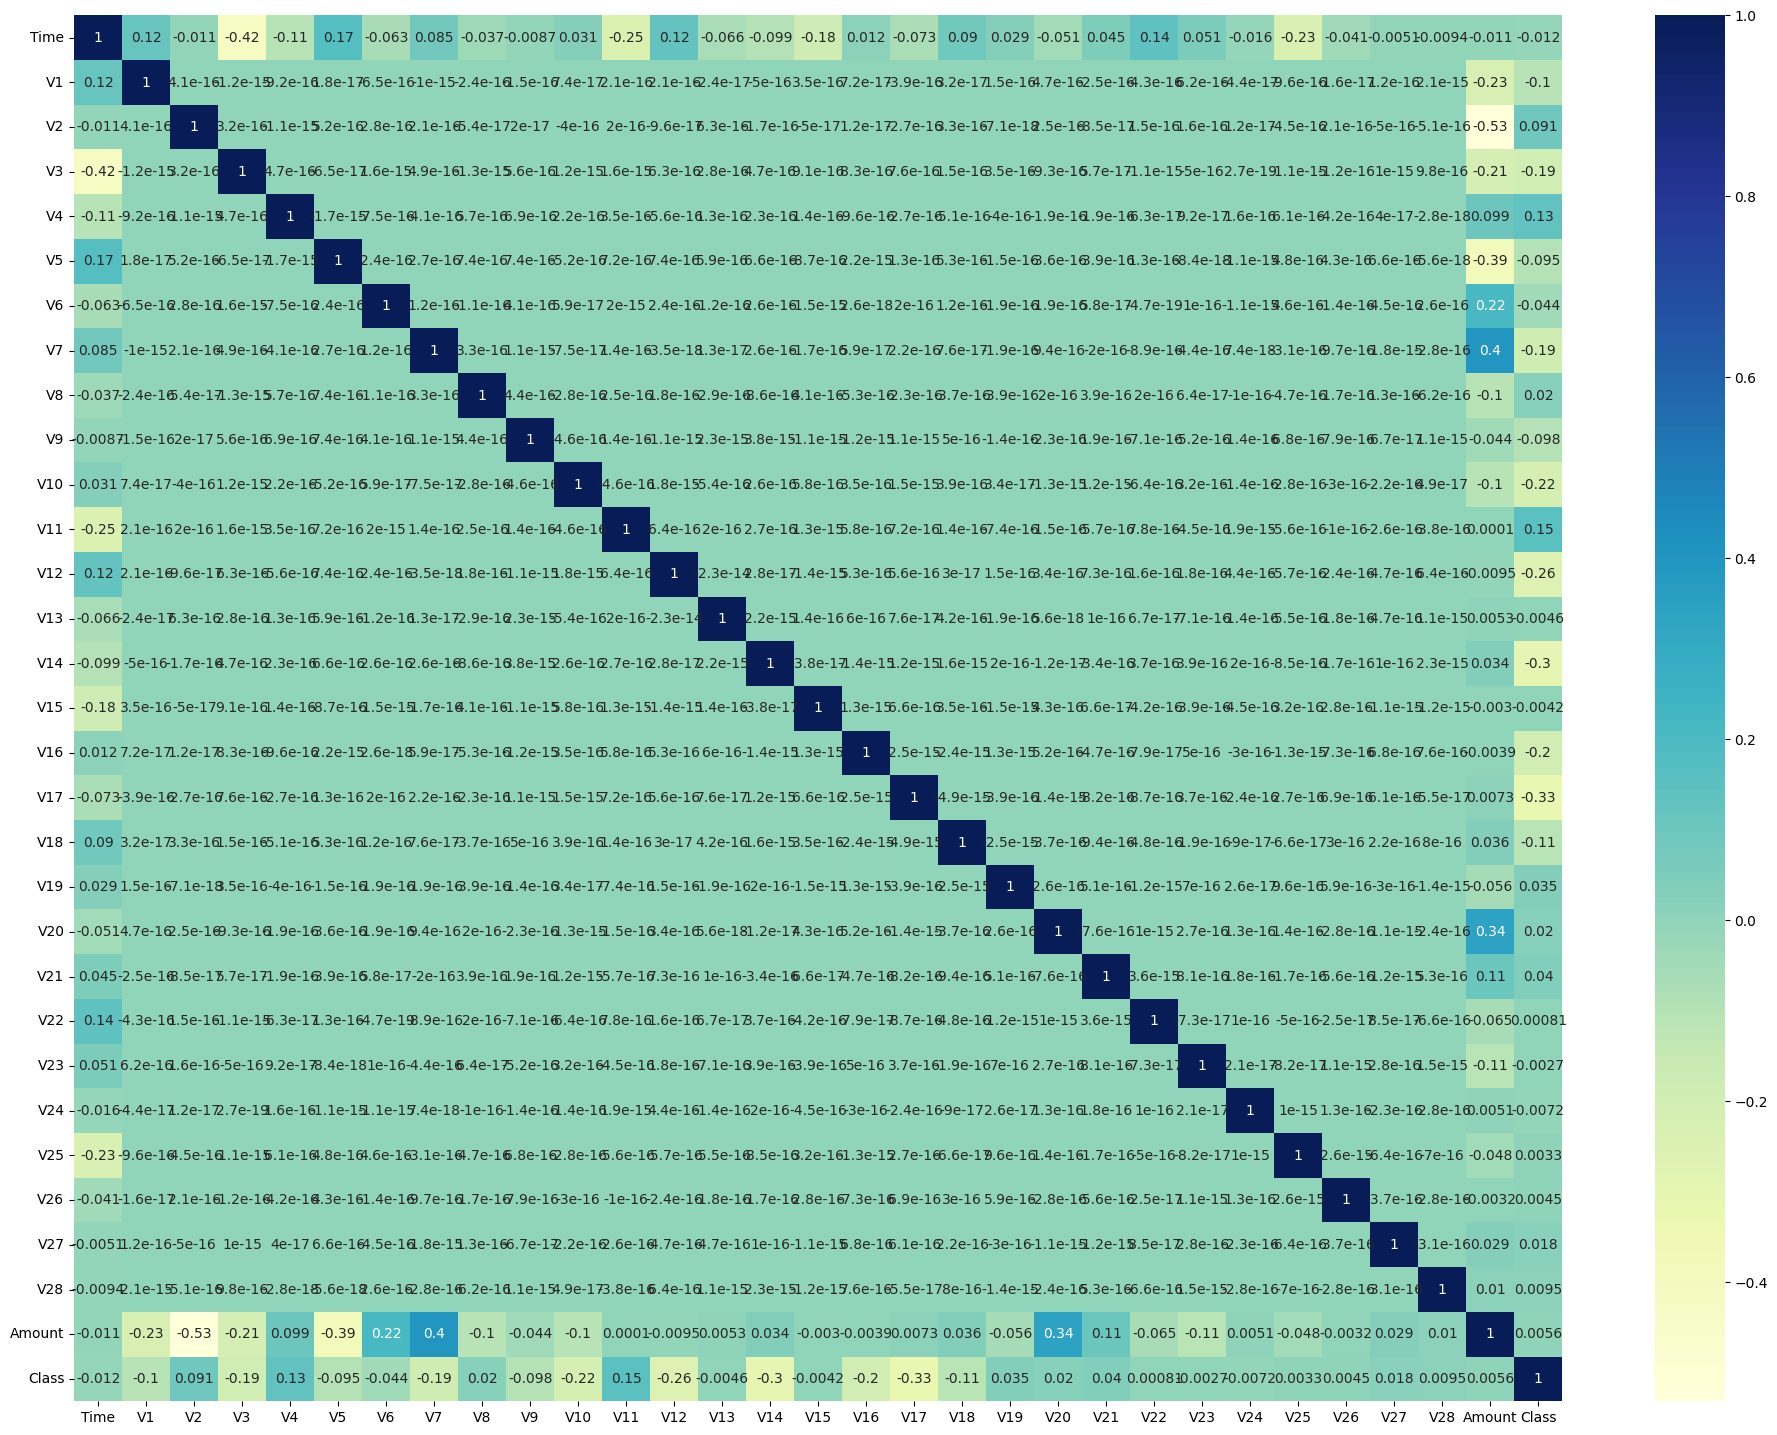

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

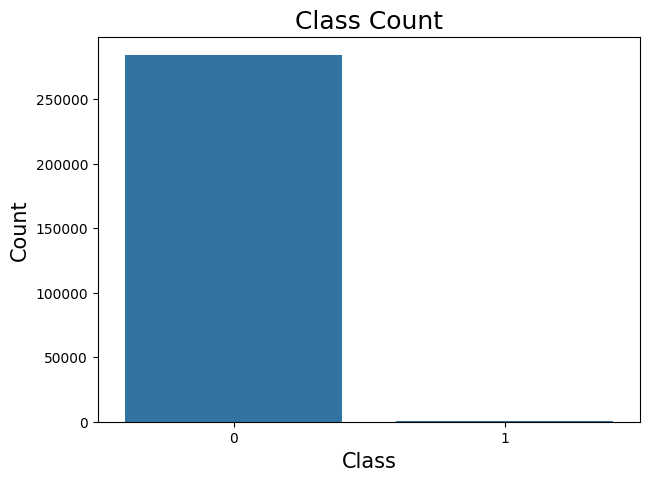

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))

# Use value_counts to display actual counts on x-tick labels if desired
sns.countplot(x='Class', data=df)
plt.title("Class Count", fontsize=18)
plt.xlabel("Class", fontsize=15)        # Just label as 'Class' (category on x-axis)
plt.ylabel("Count", fontsize=15)
plt.show()


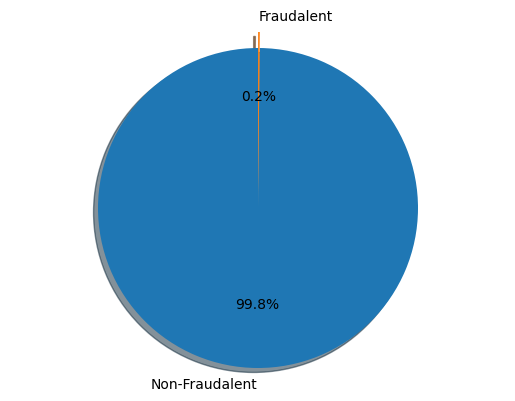

In [ ]:
#plt.title('Dsitribution of the Fraudalent vs Non-fraudalent transaction in Percentages')
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


### So we have 492 fraudalent transactions out of 284807 total credit card transactions.

Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example.
To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
#As time is given in relative fashion, we will need to use pandas.Timedelta which Represents a duration, the difference between two dates or times.

Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)



Text(0.5, 1.05, 'Time vs Class Distribution')

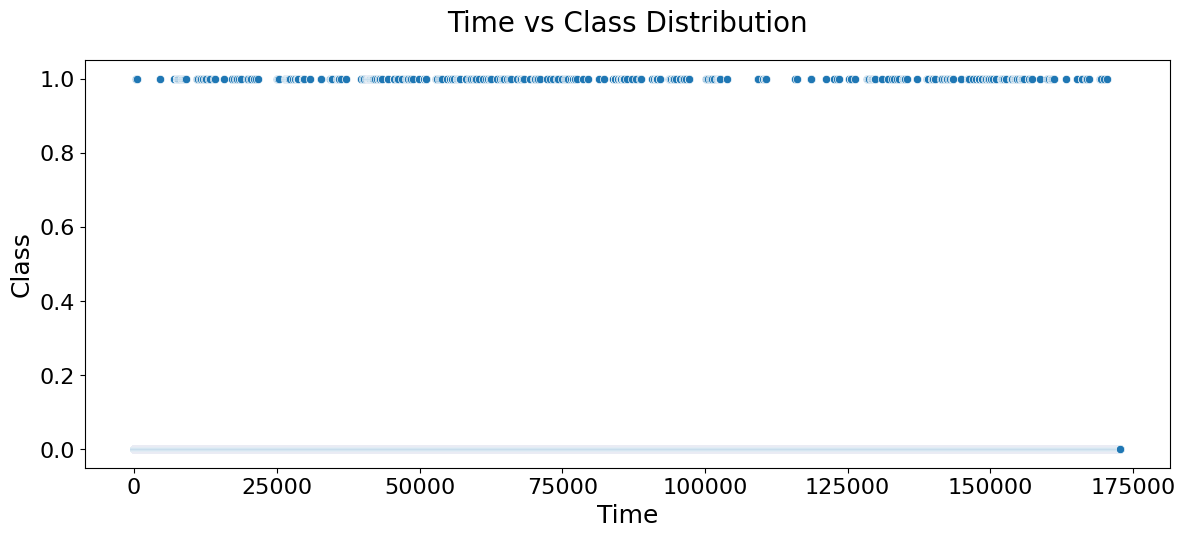

In [ ]:
# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with time

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.title('Time vs Class Distribution', size=20, y=1.05)


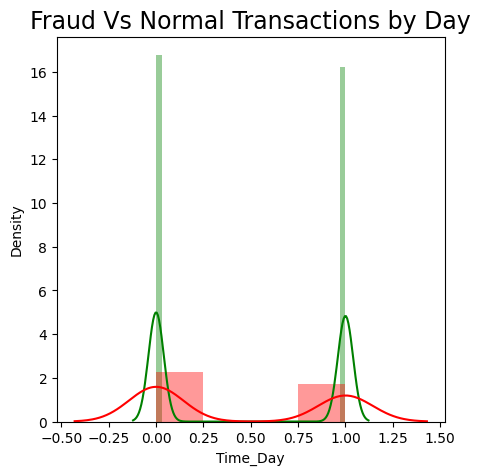

In [ ]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

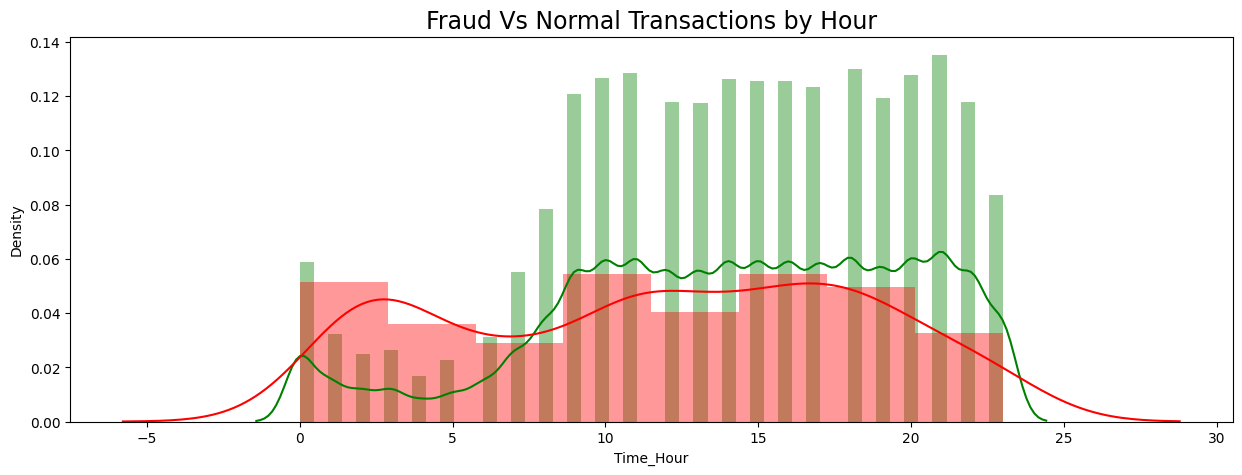

In [ ]:
#The fraus Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

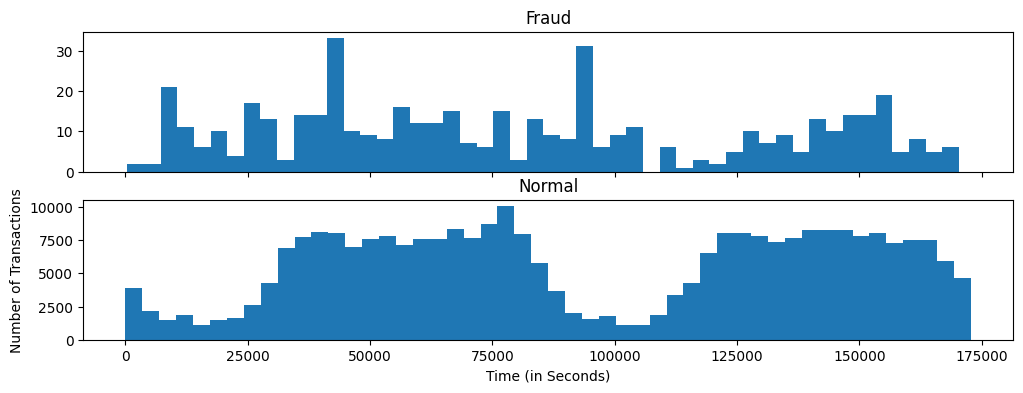

In [ ]:
import matplotlib.pyplot as plt

# Set up two subplots, sharing the x-axis
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))

bins = 50

# Plot histogram for fraudulent transactions
ax1.hist(df.Time[df.Class == 1], bins=bins)
ax1.set_title('Fraud')

# Plot histogram for normal transactions
ax2.hist(df.Time[df.Class == 0], bins=bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()


In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
#To clearly the data of frauds and no frauds
df_Fraud = df[df['Class'] == 1]
df_Regular = df[df['Class'] == 0]

# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [ ]:
#Regular Transaction Amount Statistics
print(df_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

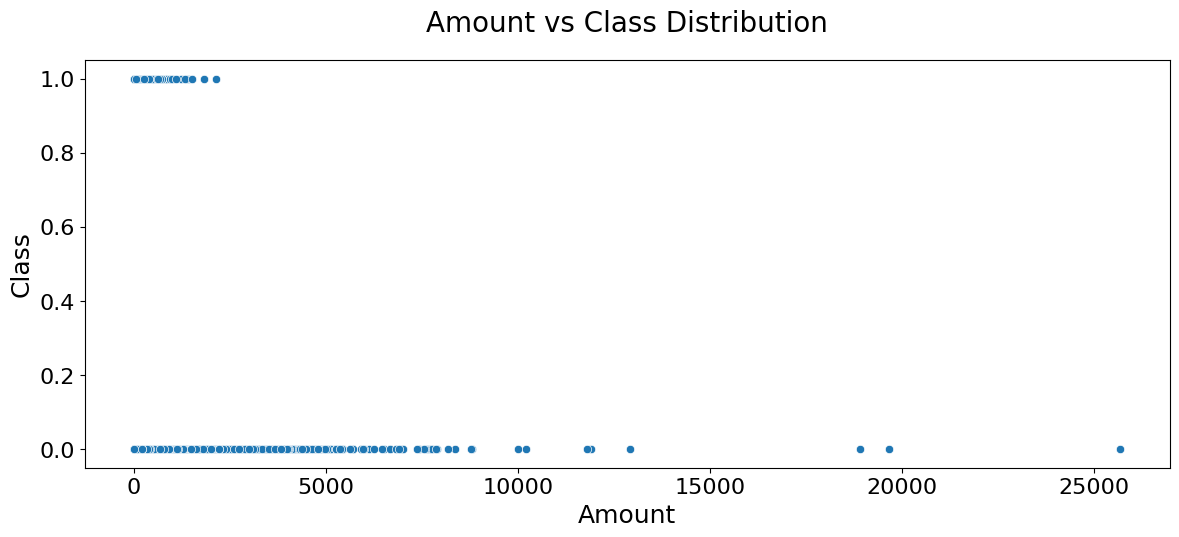

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount

# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with Amount


fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.title('Amount vs Class Distribution', size=20, y=1.05)


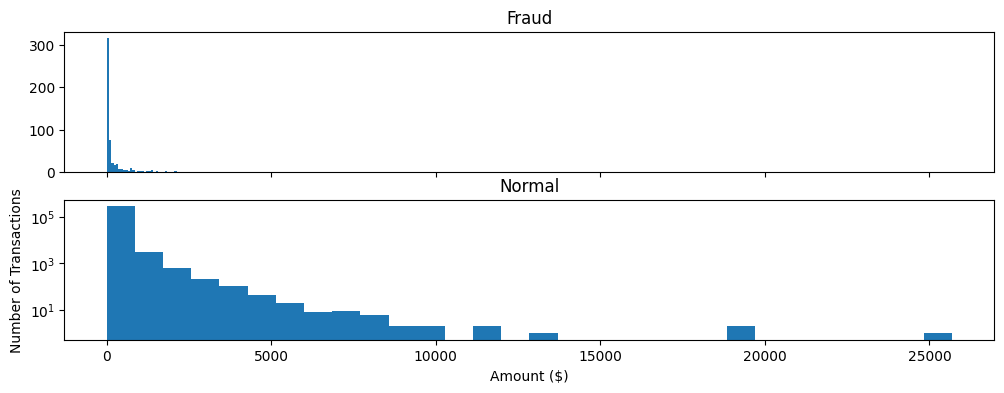

In [ ]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))

bins = 30

# Histogram for fraudulent transactions
ax1.hist(df.Amount[df.Class == 1], bins=bins)
ax1.set_title('Fraud')

# Histogram for normal transactions
ax2.hist(df.Amount[df.Class == 0], bins=bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()


In [ ]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413

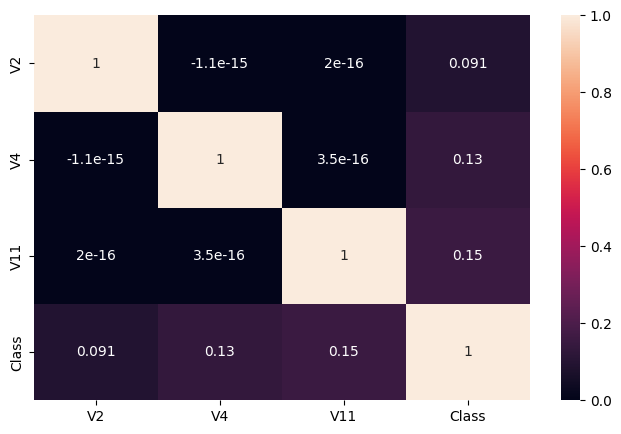

In [ ]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

### Plotting the distribution of a variable

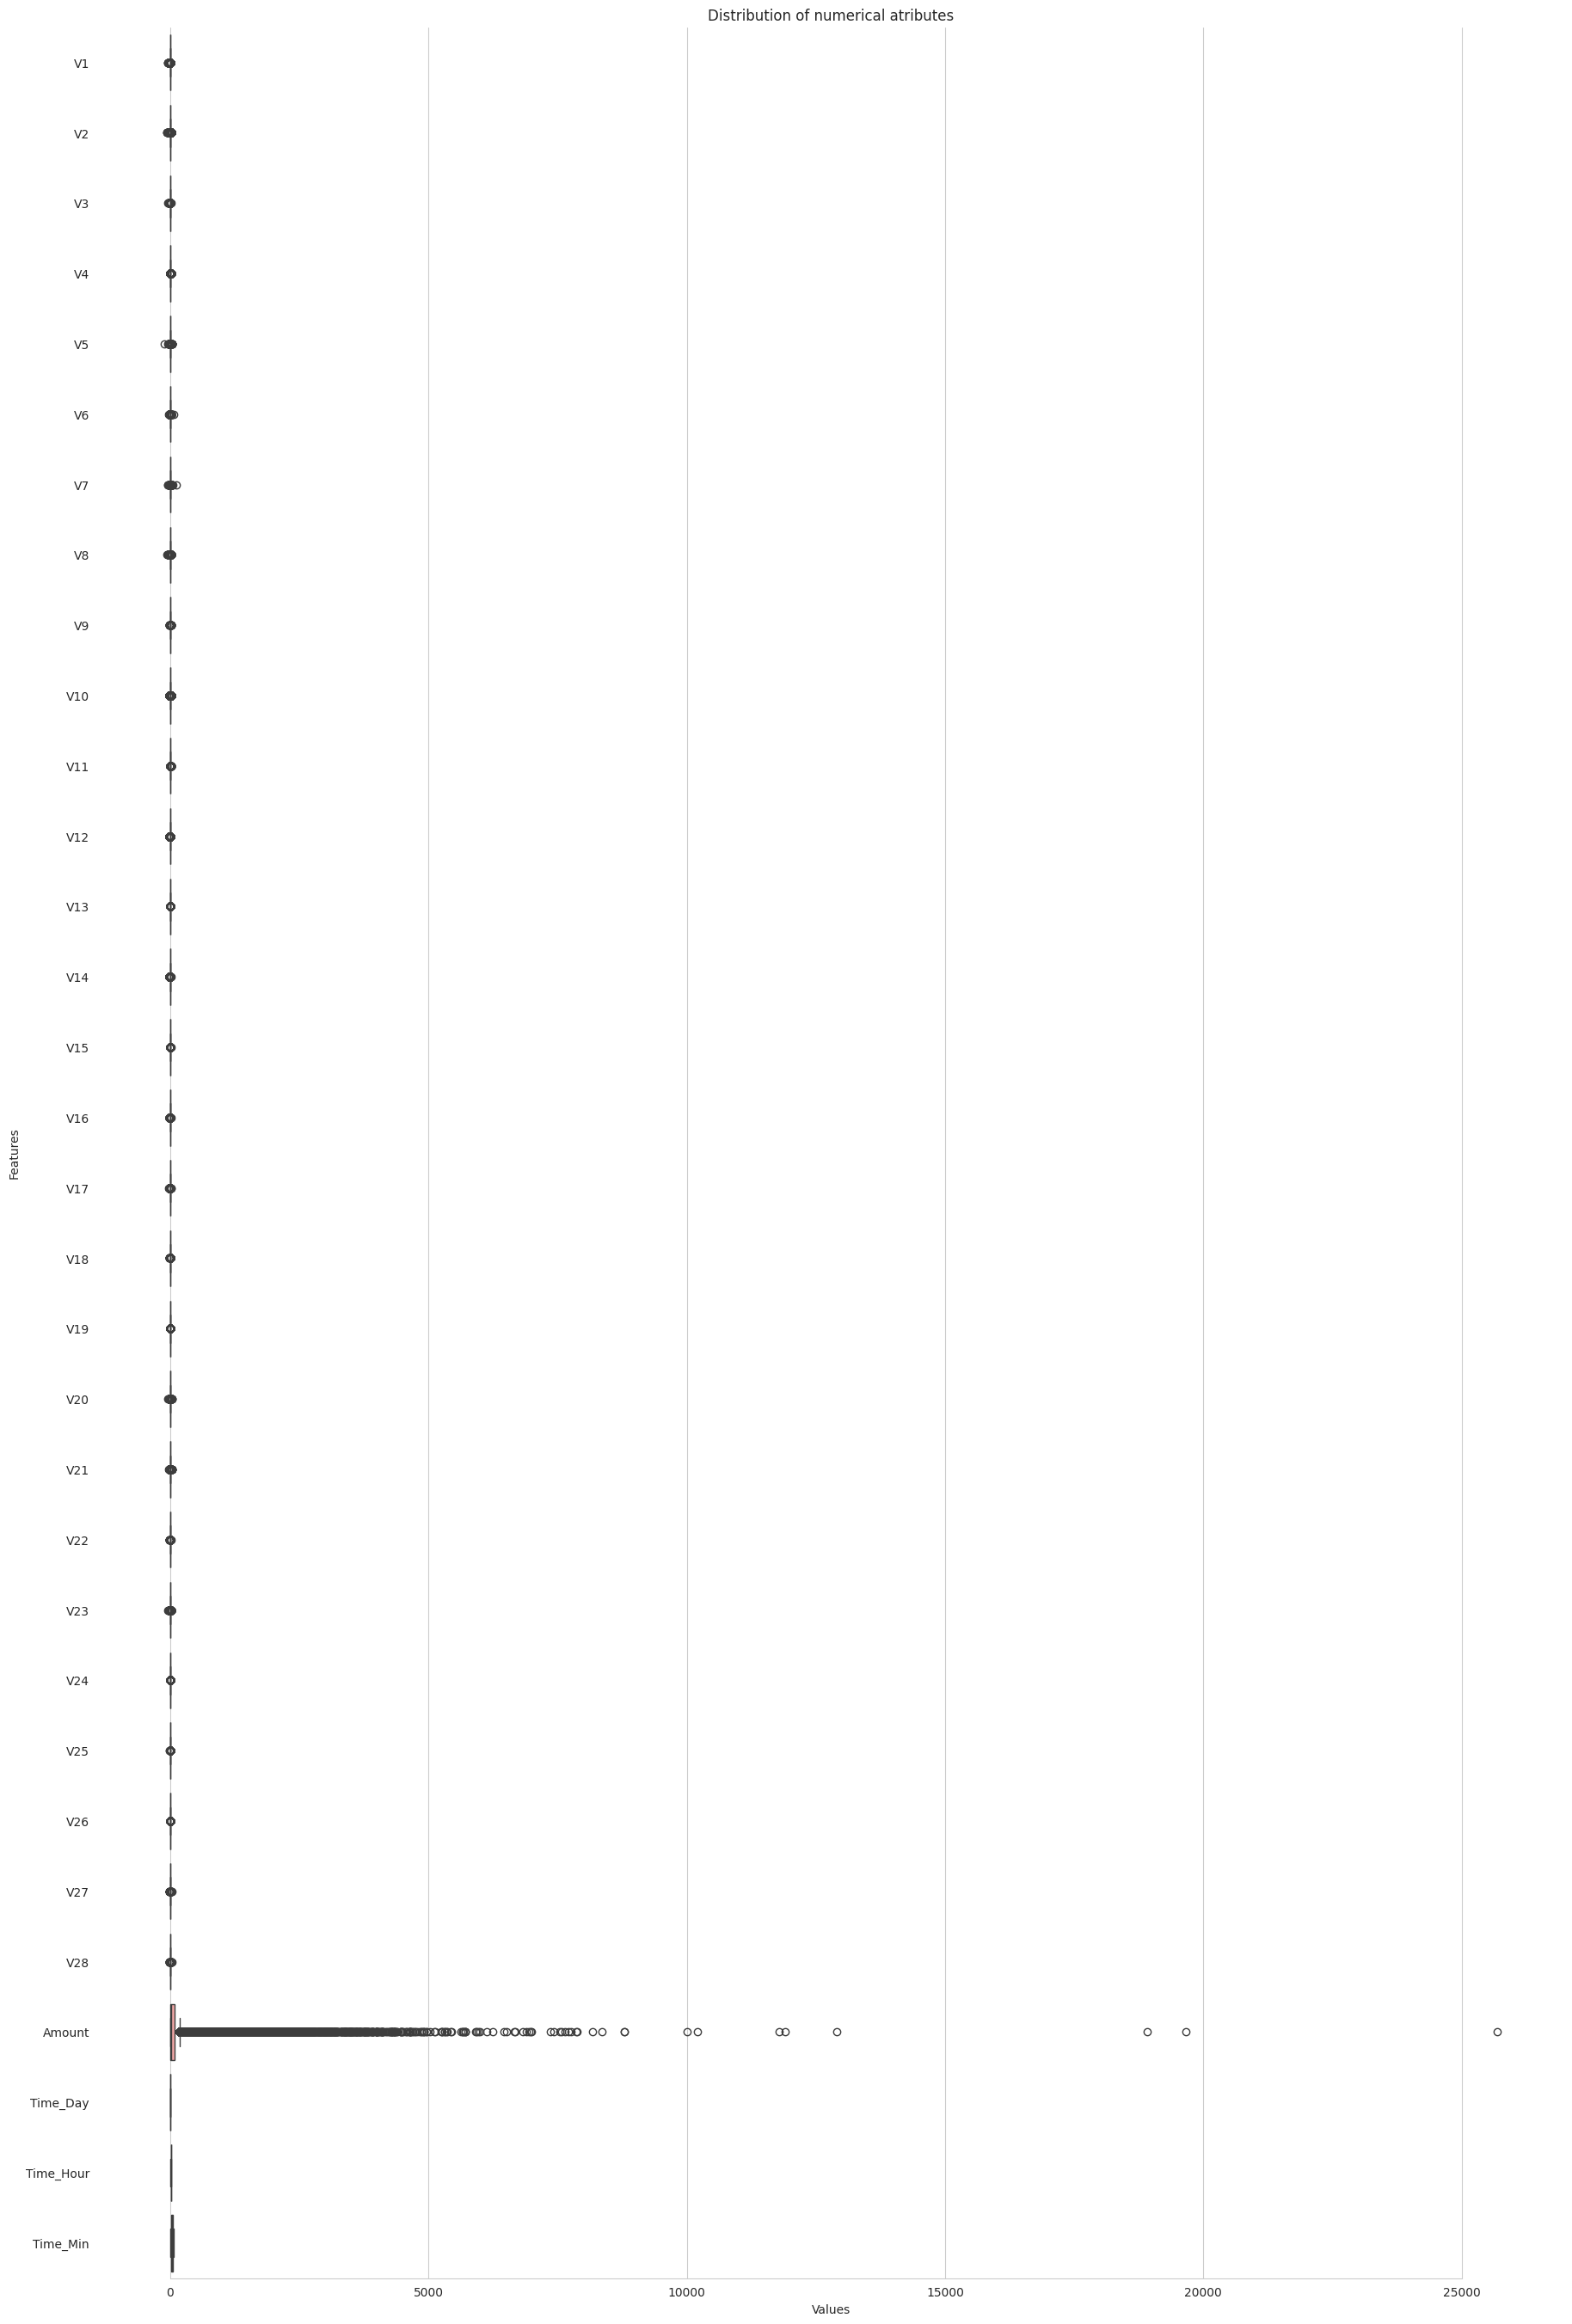

In [ ]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation :
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

In [ ]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

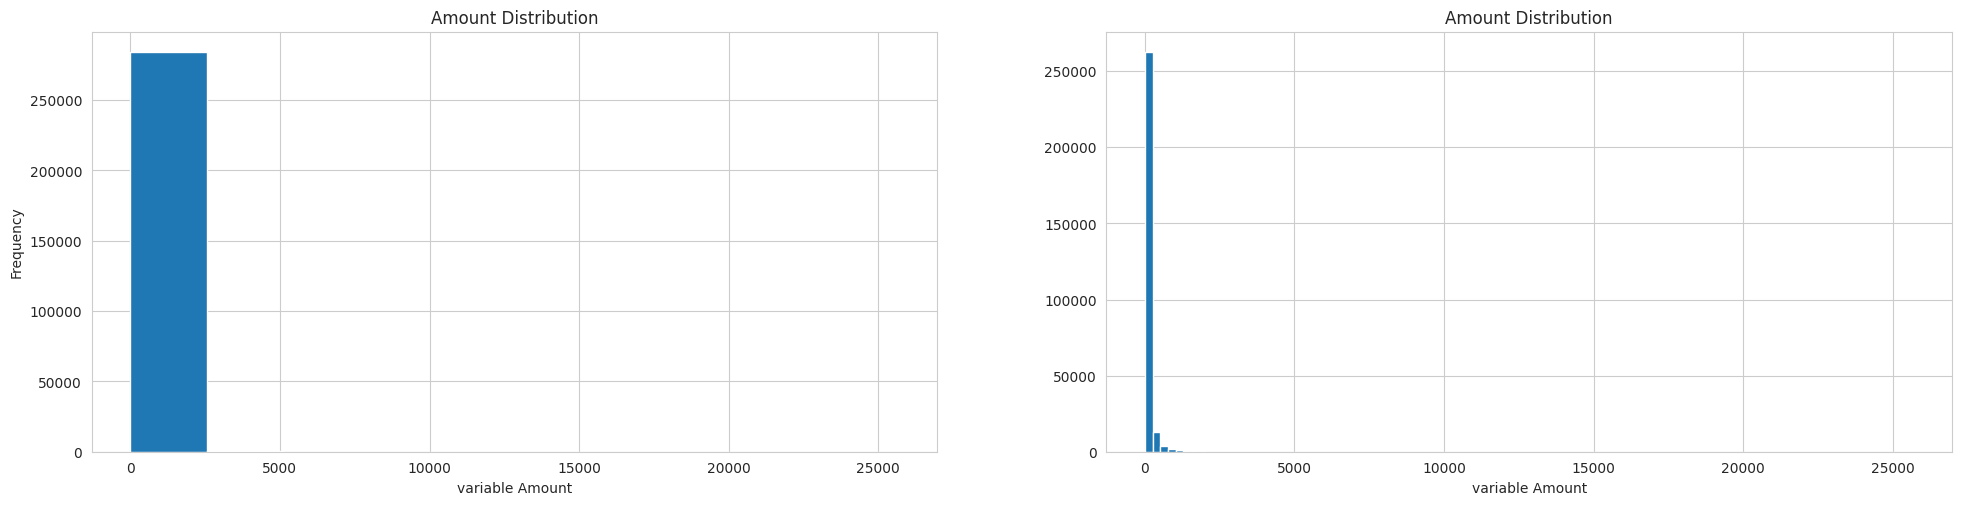

In [ ]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()


### Splitting the data into train & test data

*   List item
*   List item



In [ ]:
#Create X and y dataset for independent and dependent data
y= df['Class']
X = df.drop(['Class'], axis=1)
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Time_Hour  
0  0.128539 -0.189115  0.133558 -0.021053  149.62          0  
1  0.167170  0.125895 -0.008983  0.014724    2.69          0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66          0  
3  0.647376 -0.221929  0.062723  0.061458  123.50          0  
4 -0.206010  0.502292  0.219422  0.215153   69.99          0  

[5 rows x 30 columns]

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

In [ ]:
cols = list(X.columns.values)

In [ ]:
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

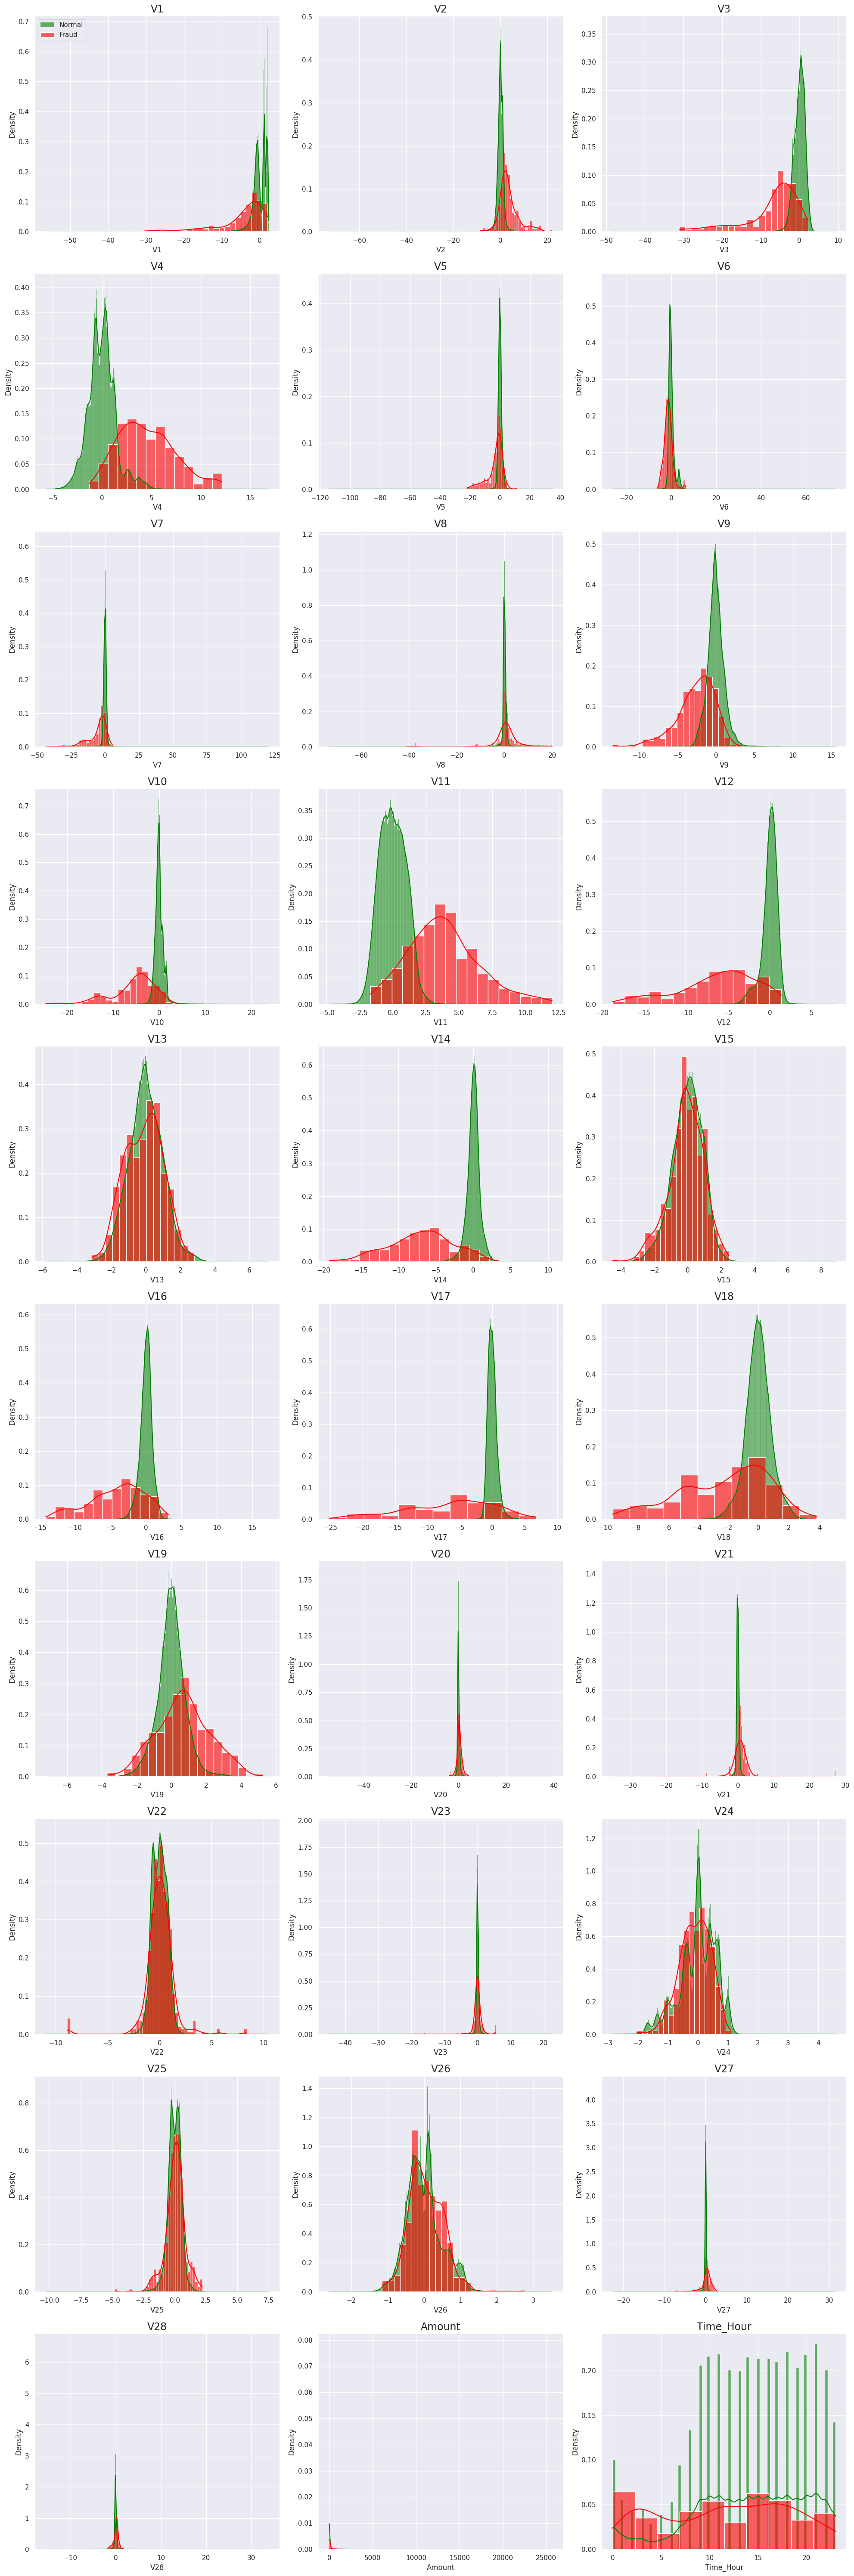

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10, 3, n + 1)
    sns.histplot(X[col][normal_records], color='green', kde=True, stat="density", label='Normal', alpha=0.6)
    sns.histplot(X[col][fraud_records], color='red', kde=True, stat="density", label='Fraud', alpha=0.6)
    plt.title(col, fontsize=17)
    if n == 0:    # Add legend only to first subplot
        plt.legend()
plt.tight_layout()
plt.show()


#Create model functions for Logistic Regress, KNN, SVM, Decision Tree, Random Forest, XGBoost

In [ ]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])


In [ ]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]

  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [ ]:
def buildAndRunLogisticModels(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    import numpy as np
    import pandas as pd
    from sklearn import linear_model, metrics
    from sklearn.model_selection import KFold
    from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
    import matplotlib.pyplot as plt

    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    # L2 regularization (Ridge)
    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C, penalty='l2', scoring='roc_auc', cv=cv_num,
        random_state=42, max_iter=10000, fit_intercept=True,
        solver='newton-cg', tol=10
    )

    # L1 regularization (Lasso)
    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C, penalty='l1', scoring='roc_auc', cv=cv_num,
        random_state=42, max_iter=10000, fit_intercept=True,
        solver='liblinear', tol=10
    )

    # Fit models
    searchCV_l2.fit(X_train, y_train)
    searchCV_l1.fit(X_train, y_train)

    # Predictions and probabilities
    for model, label in [(searchCV_l2, 'L2'), (searchCV_l1, 'L1')]:
        y_pred = model.predict(X_test)
        y_pred_probs = model.predict_proba(X_test)[:, 1]

        accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
        auc_roc = roc_auc_score(y_test, y_pred_probs)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
        optimal_idx = np.argmax(tpr - fpr)
        threshold = thresholds[optimal_idx]

        print(f'Accuracy of Logistic model with {label} regularisation: {accuracy:.4f}')
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.show()
        print(classification_report(y_test, y_pred))
        print(f'{label} roc_value: {auc_roc:.4f}')
        print(f'{label} threshold: {threshold:.4f}')
        roc_auc_val = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Test, auc={roc_auc_val:.2f}')
        plt.legend(loc=4)
        plt.show()

        # Use pd.concat for row appending
        new_row = pd.DataFrame({
            'Data_Imbalance_Handiling': [DataImbalance],
            'Model': [f'Logistic Regression with {label} Regularisation'],
            'Accuracy': [accuracy],
            'roc_value': [auc_roc],
            'threshold': [threshold]
        })
        df_Results = pd.concat([df_Results, new_row], ignore_index=True)

    return df_Results


In [ ]:
def buildAndRunKNNModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test):
    import numpy as np
    import pandas as pd
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn import metrics
    import matplotlib.pyplot as plt
    from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay

    # Fit KNN model
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    knn_probs = knn.predict_proba(X_test)[:, 1]

    # Accuracy and AUC
    accuracy = metrics.accuracy_score(y_test, y_pred)
    roc_value = roc_auc_score(y_test, knn_probs)
    fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
    optimal_idx = np.argmax(tpr - fpr)
    threshold = thresholds[optimal_idx]

    print(f"KNN Accuracy: {accuracy:.4f}")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()
    print(classification_report(y_test, y_pred))
    print(f"KNN ROC AUC: {roc_value:.4f}")
    print(f"KNN optimal threshold: {threshold:.4f}")

    roc_auc_val = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Test, auc={roc_auc_val:.2f}")
    plt.legend(loc=4)
    plt.show()

    # Appending results (modern pandas)
    new_row = pd.DataFrame({
        'Data_Imbalance_Handiling': [DataImabalance],
        'Model': ['KNN'],
        'Accuracy': [accuracy],
        'roc_value': [roc_value],
        'threshold': [threshold]
    })
    df_Results = pd.concat([df_Results, new_row], ignore_index=True)

    return df_Results


In [ ]:
def buildAndRunSVMModels(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    import numpy as np
    import pandas as pd
    from sklearn.svm import SVC
    from sklearn import metrics
    import matplotlib.pyplot as plt
    from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay

    # Train SVM with sigmoid kernel and probability estimation
    svm = SVC(kernel='sigmoid', probability=True, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    svm_probs = svm.predict_proba(X_test)[:, 1]

    # Accuracy and classification report
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"accuracy_score: {accuracy:.4f}")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()
    print(classification_report(y_test, y_pred))

    # ROC and thresholds
    roc_value = roc_auc_score(y_test, svm_probs)
    fpr, tpr, thresholds = roc_curve(y_test, svm_probs)
    optimal_idx = np.argmax(tpr - fpr)
    threshold = thresholds[optimal_idx]
    roc_auc_val = auc(fpr, tpr)
    print(f"SVM roc_value: {roc_value:.4f}")
    print(f"SVM threshold: {threshold:.4f}")
    print(f"ROC for the test dataset {roc_auc_val:.1%}")
    plt.plot(fpr, tpr, label=f"Test, auc={roc_auc_val:.2f}")
    plt.legend(loc=4)
    plt.show()

    # Append results (modern pandas)
    new_row = pd.DataFrame({
        'Data_Imbalance_Handiling': [DataImbalance],
        'Model': ['SVM'],
        'Accuracy': [accuracy],
        'roc_value': [roc_value],
        'threshold': [threshold]
    })
    df_Results = pd.concat([df_Results, new_row], ignore_index=True)

    return df_Results


In [ ]:
def buildAndRunTreeModels(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    import numpy as np
    import pandas as pd
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import metrics
    from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt

    criteria = ['gini', 'entropy']
    for c in criteria:
        dt = DecisionTreeClassifier(criterion=c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)

        print(f"{c} score: {test_score:.4f}")
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.show()
        print(classification_report(y_test, y_pred))
        print(f"{c} tree_roc_value: {tree_roc_value:.4f}")

        fpr, tpr, thresholds = roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr - fpr)]
        print(f"Tree threshold: {threshold:.4f}")
        roc_auc_val = auc(fpr, tpr)
        print(f"ROC for the test dataset {roc_auc_val:.1%}")
        plt.plot(fpr, tpr, label=f"Test, auc={roc_auc_val:.2f}")
        plt.legend(loc=4)
        plt.show()

        new_row = pd.DataFrame({
            'Data_Imbalance_Handiling': [DataImbalance],
            'Model': [f'Tree Model with {c} criteria'],
            'Accuracy': [test_score],
            'roc_value': [tree_roc_value],
            'threshold': [threshold]
        })
        df_Results = pd.concat([df_Results, new_row], ignore_index=True)

    return df_Results


In [ ]:
def buildAndRunRandomForestModels(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics
    from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt

    # Create and fit the model
    RF_model = RandomForestClassifier(
        n_estimators=100, bootstrap=True,
        max_features='sqrt', random_state=42
    )
    RF_model.fit(X_train, y_train)

    # Predictions and accuracy
    rf_predictions = RF_model.predict(X_test)
    RF_test_score = RF_model.score(X_test, y_test)

    print(f'Model Accuracy: {RF_test_score:.4f}')
    ConfusionMatrixDisplay.from_predictions(y_test, rf_predictions)
    plt.show()
    print(classification_report(y_test, rf_predictions))

    # Probabilities and ROC metrics
    rf_probs = RF_model.predict_proba(X_test)[:, 1]
    roc_value = roc_auc_score(y_test, rf_probs)
    fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    roc_auc_val = auc(fpr, tpr)
    print(f"Random Forest roc_value: {roc_value:.4f}")
    print(f"Random Forest threshold: {threshold:.4f}")
    print(f"ROC for the test dataset {roc_auc_val:.1%}")
    plt.plot(fpr, tpr, label=f"Test, auc={roc_auc_val:.2f}")
    plt.legend(loc=4)
    plt.show()

    # Append results using pd.concat for pandas compatibility
    new_row = pd.DataFrame({
        'Data_Imbalance_Handiling': [DataImbalance],
        'Model': ['Random Forest'],
        'Accuracy': [RF_test_score],
        'roc_value': [roc_value],
        'threshold': [threshold]
    })
    df_Results = pd.concat([df_Results, new_row], ignore_index=True)

    return df_Results


In [ ]:
def buildAndRunXGBoostModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test):
    import numpy as np
    import pandas as pd
    from xgboost import XGBClassifier
    from sklearn import metrics
    from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt

    # Fit XGBoost model
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)

    # Accuracy
    XGB_test_score = XGBmodel.score(X_test, y_test)
    print(f'Model Accuracy: {XGB_test_score:.4f}')

    # Confusion Matrix and Classification Report
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()
    print(classification_report(y_test, y_pred))

    # Probabilities and ROC Metrics
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)
    fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    roc_auc_val = auc(fpr, tpr)
    print(f"XGBoost roc_value: {XGB_roc_value:.4f}")
    print(f"XGBoost threshold: {threshold:.4f}")
    print(f"ROC for the test dataset {roc_auc_val:.1%}")
    plt.plot(fpr, tpr, label=f"Test, auc={roc_auc_val:.2f}")
    plt.legend(loc=4)
    plt.show()

    # Add results row (modern pandas)
    new_row = pd.DataFrame({
        'Data_Imbalance_Handiling': [DataImabalance],
        'Model': ['XGBoost'],
        'Accuracy': [XGB_test_score],
        'roc_value': [XGB_roc_value],
        'threshold': [threshold]
    })
    df_Results = pd.concat([df_Results, new_row], ignore_index=True)

    return df_Results


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)


In [ ]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

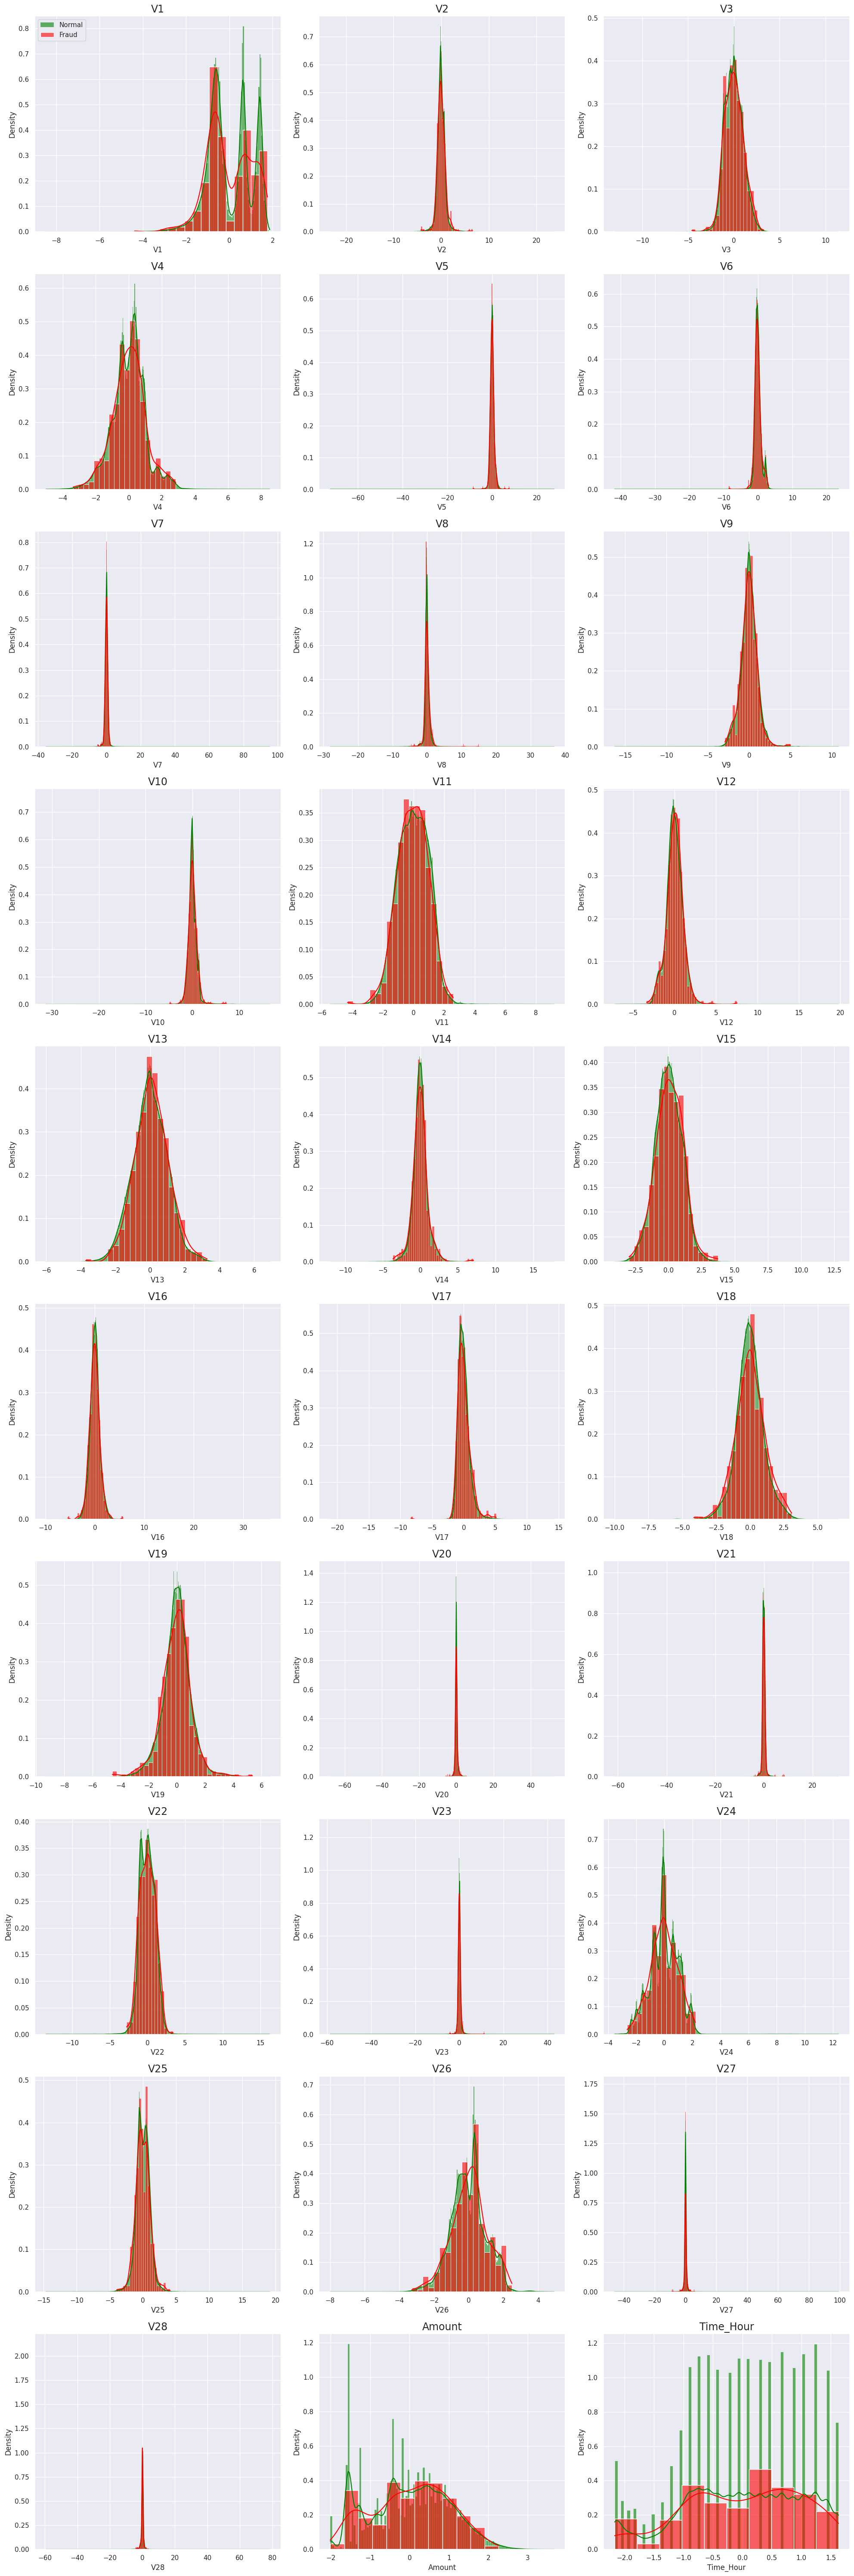

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10, 3, n + 1)
    sns.histplot(X_train_pt_df[col][normal_records], color='green', kde=True, stat="density", label='Normal', alpha=0.6)
    sns.histplot(X_train_pt_df[col][fraud_records], color='red', kde=True, stat="density", label='Fraud', alpha=0.6)
    plt.title(col, fontsize=17)
    if n == 0:
        plt.legend()
plt.tight_layout()
plt.show()


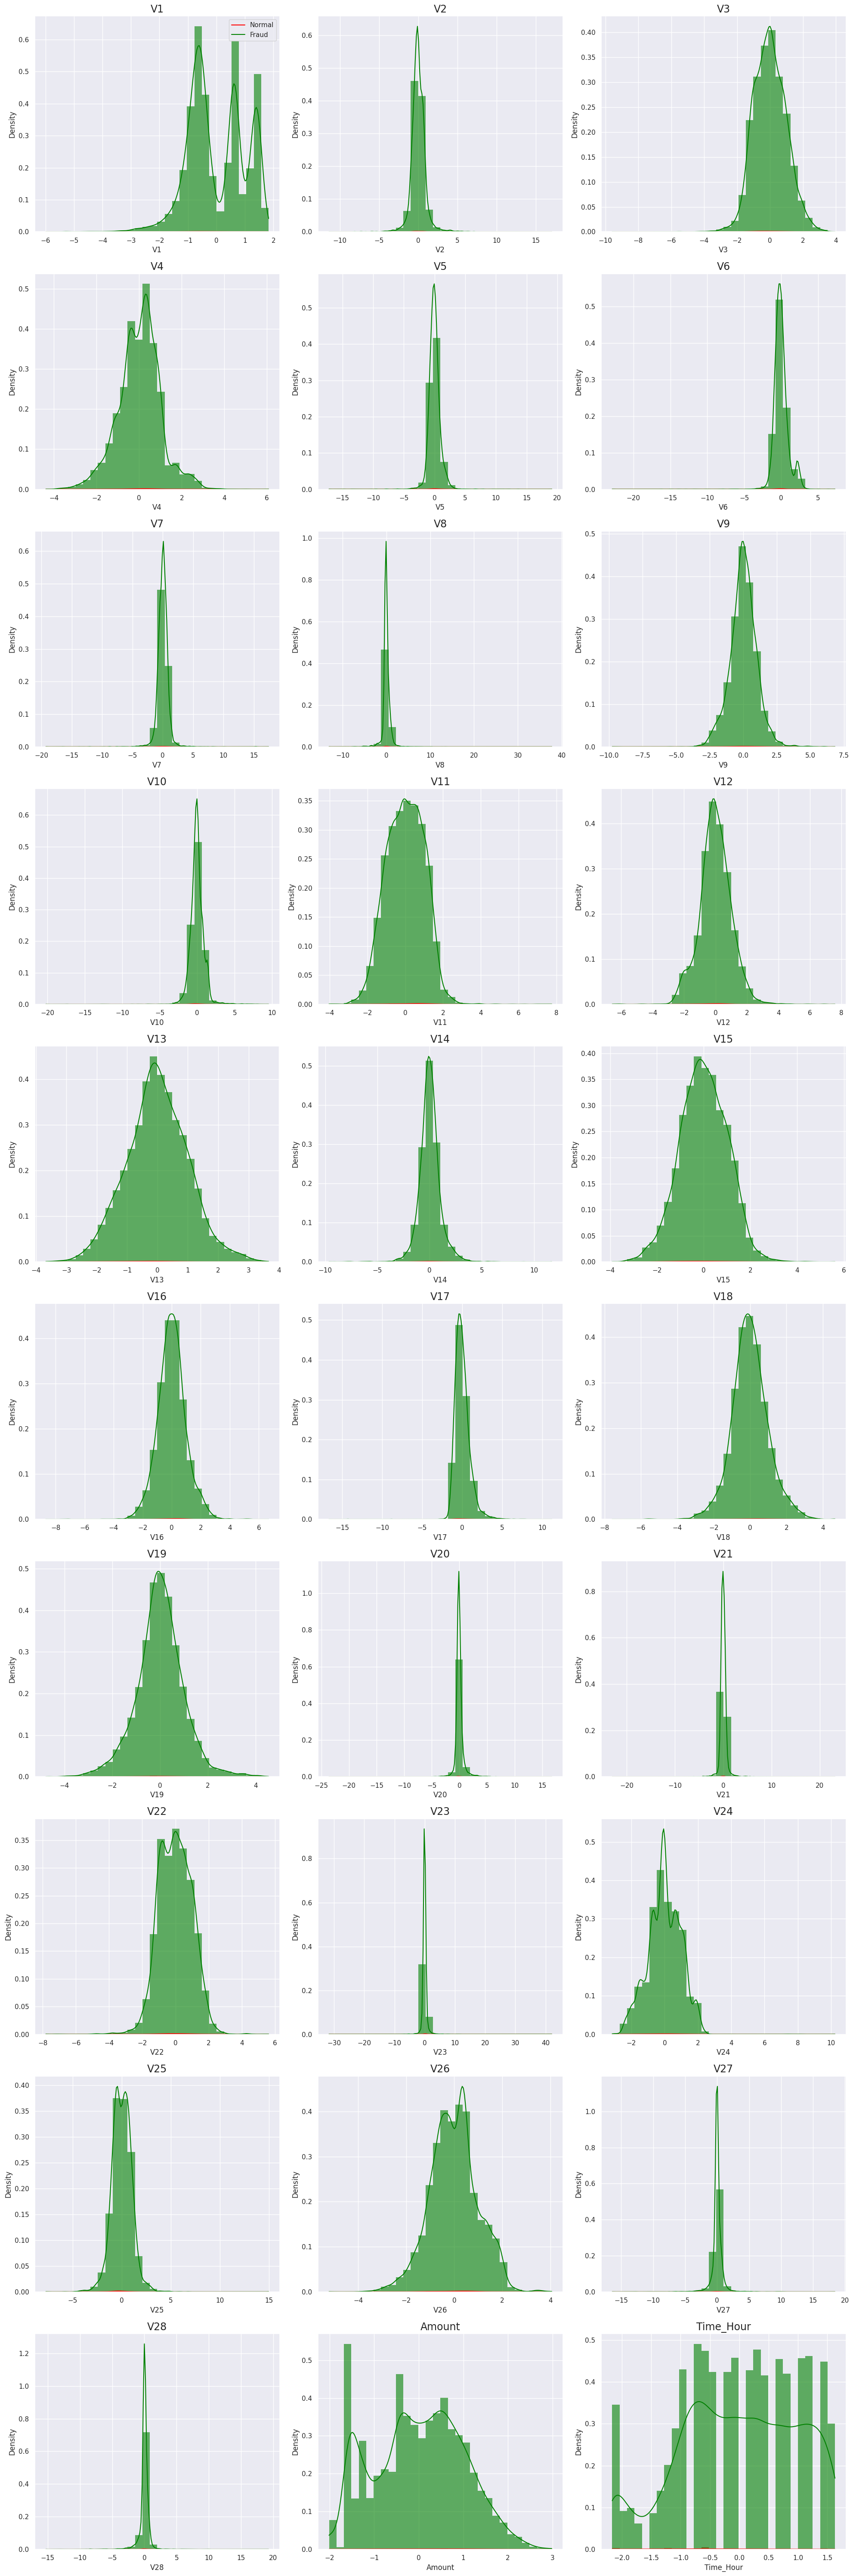

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure boolean masks are pandas Series aligned with your test set
normal_records = y_test == 0
fraud_records = y_test == 1

# Optionally, choose a smaller subset for better speed (e.g., first 9 features):
# cols = cols[:9]

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10, 3, n + 1)
    # Use one histplot with hue for efficiency and clarity
    plot_df = X_test_pt_df.assign(Class=y_test)
    sns.histplot(
        data=plot_df,
        x=col,
        hue='Class',
        bins=30,
        kde=True,
        stat='density',
        palette={0: 'green', 1: 'red'},
        alpha=0.6,
        linewidth=0
    )
    plt.title(col, fontsize=17)
    # Add legend only to the first subplot
    if n == 0:
        plt.legend(['Normal', 'Fraud'])
    else:
        plt.legend().set_visible(False)
plt.tight_layout()
plt.show()


## Model Building
- Build different models on the imbalanced dataset and see the result

Starting parallel model execution...

Logistic_L2 Results:
Accuracy: 0.9990
ROC AUC: 0.9673
Optimal threshold: 0.0022
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.79      0.55      0.65        96

    accuracy                           1.00     56962
   macro avg       0.90      0.78      0.82     56962
weighted avg       1.00      1.00      1.00     56962



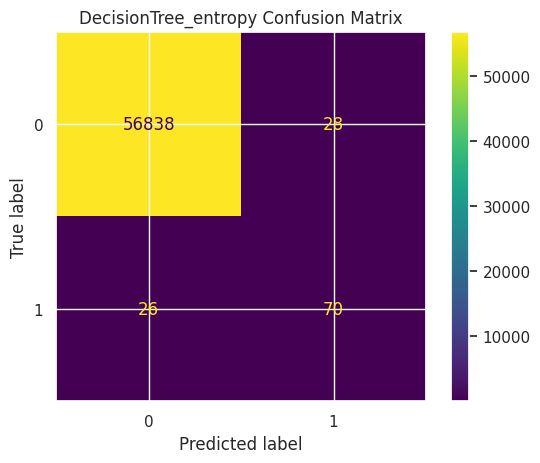

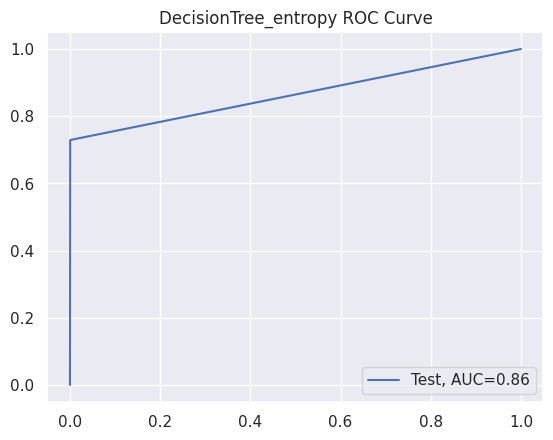


DecisionTree_entropy Results:
Accuracy: 0.9991
ROC AUC: 0.8643
Optimal threshold: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962


DecisionTree_gini Results:
Accuracy: 0.9988
ROC AUC: 0.8590
Optimal threshold: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962



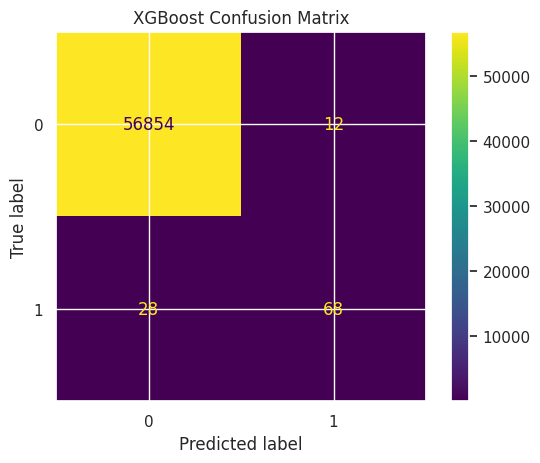

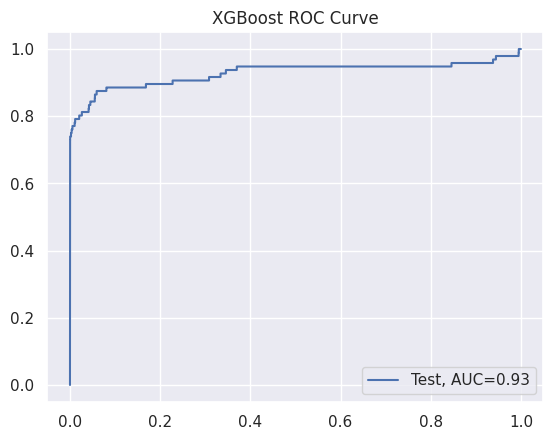


XGBoost Results:
Accuracy: 0.9993
ROC AUC: 0.9278
Optimal threshold: 0.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.85      0.71      0.77        96

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



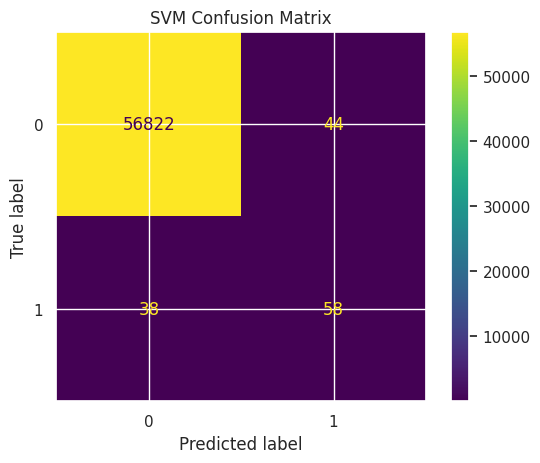

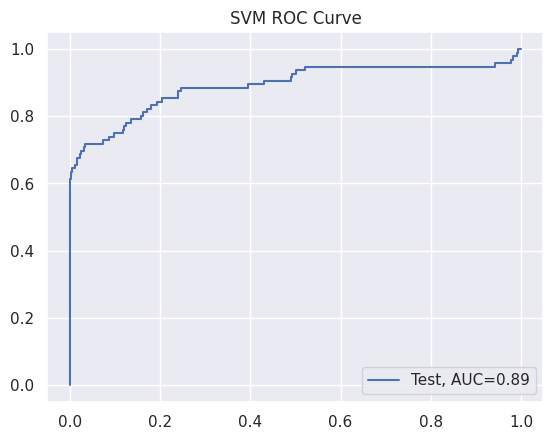


SVM Results:
Accuracy: 0.9986
ROC AUC: 0.8913
Optimal threshold: 0.0013
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962


Logistic_L1 Results:
Accuracy: 0.9990
ROC AUC: 0.9658
Optimal threshold: 0.0012
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



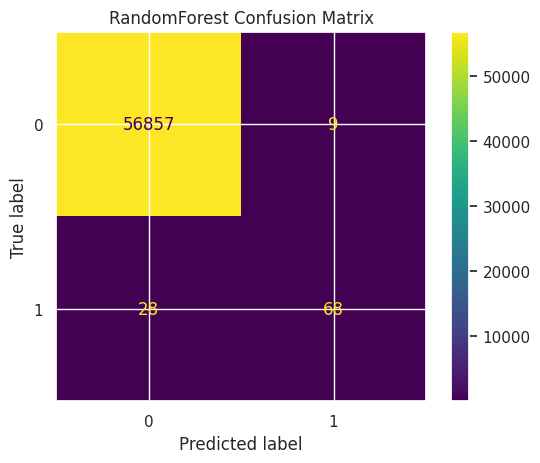

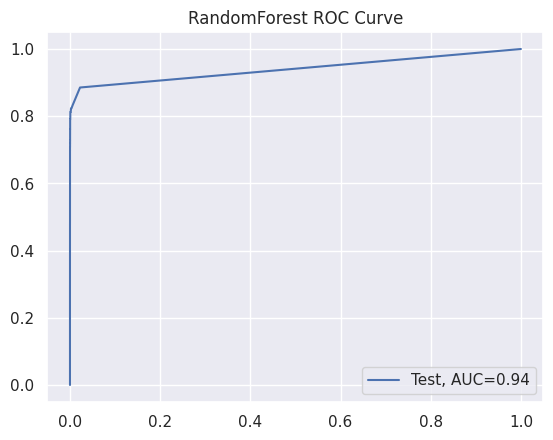


RandomForest Results:
Accuracy: 0.9994
ROC AUC: 0.9406
Optimal threshold: 0.0100
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962


KNN Results:
Accuracy: 0.9993
ROC AUC: 0.9009
Optimal threshold: 0.2000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962


Total execution time: 787.01 seconds

Final Results:
  Data_Imbalance_Handiling                 Model  Accuracy  roc_value  \
0        Power Transformer           Logistic_L2  0.998999   0.9

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor
from functools import partial
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                           classification_report, accuracy_score,
                           roc_auc_score, roc_curve, auc)

# Utility function to reduce redundancy in plotting
def plot_model_results(y_test, y_pred, y_pred_proba, model_name):
    """Utility function to plot confusion matrix and ROC curve"""
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_value = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    threshold = thresholds[np.argmax(tpr - fpr)]
    roc_auc_val = auc(fpr, tpr)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"Test, AUC={roc_auc_val:.2f}")
    plt.legend(loc=4)
    plt.title(f'{model_name} ROC Curve')
    plt.show()

    return accuracy, roc_value, threshold

def run_model_with_metrics(model, X_train, y_train, X_test, y_test, model_name):
    """Generic function to run model and compute metrics"""
    # Fit model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Get metrics and plots
    accuracy, roc_value, threshold = plot_model_results(
        y_test, y_pred, y_pred_proba, model_name
    )

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_value:.4f}")
    print(f"Optimal threshold: {threshold:.4f}")
    print(classification_report(y_test, y_pred))

    return accuracy, roc_value, threshold

def parallel_model_execution(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    """Execute all models in parallel"""
    from sklearn.linear_model import LogisticRegressionCV
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier
    from sklearn.svm import SVC

    # Define models
    models = {
        'Logistic_L2': LogisticRegressionCV(
            Cs=np.power(10.0, np.arange(-10, 10)),
            penalty='l2',
            scoring='roc_auc',
            cv=5,
            n_jobs=-1,
            max_iter=10000
        ),
        'Logistic_L1': LogisticRegressionCV(
            Cs=np.power(10.0, np.arange(-10, 10)),
            penalty='l1',
            scoring='roc_auc',
            cv=5,
            solver='liblinear',
            max_iter=10000
        ),
        'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
        'DecisionTree_gini': DecisionTreeClassifier(criterion='gini', random_state=42),
        'DecisionTree_entropy': DecisionTreeClassifier(criterion='entropy', random_state=42),
        'RandomForest': RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
        'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, n_jobs=-1),
        'SVM': SVC(kernel='sigmoid', probability=True, random_state=42)
    }

    results = []

    # Run models in parallel
    with ProcessPoolExecutor(max_workers=4) as executor:
        future_to_model = {
            executor.submit(
                run_model_with_metrics,
                model,
                X_train,
                y_train,
                X_test,
                y_test,
                name
            ): name for name, model in models.items()
        }

        for future in future_to_model:
            name = future_to_model[future]
            try:
                accuracy, roc_value, threshold = future.result()
                results.append({
                    'Data_Imbalance_Handiling': DataImbalance,
                    'Model': name,
                    'Accuracy': accuracy,
                    'roc_value': roc_value,
                    'threshold': threshold
                })
            except Exception as e:
                print(f'{name} generated an exception: {str(e)}')

    # Update results DataFrame
    return pd.concat([df_Results, pd.DataFrame(results)], ignore_index=True)

# Main execution
if __name__ == '__main__':
    import gc

    # Initialize results DataFrame
    df_Results = pd.DataFrame(columns=[
        'Data_Imbalance_Handiling',
        'Model',
        'Accuracy',
        'roc_value',
        'threshold'
    ])

    # Optional: Convert data to float32 for better memory usage
    X_train_pt_df = X_train_pt_df.astype(np.float32)
    X_test_pt_df = X_test_pt_df.astype(np.float32)

    try:
        # Clear memory
        gc.collect()

        # Run all models in parallel
        print("Starting parallel model execution...")
        start_time = time.time()

        df_Results = parallel_model_execution(
            df_Results,
            "Power Transformer",
            X_train_pt_df,
            y_train,
            X_test_pt_df,
            y_test
        )

        print(f"\nTotal execution time: {time.time() - start_time:.2f} seconds")

        # Display results
        print("\nFinal Results:")
        print(df_Results.sort_values('roc_value', ascending=False))

    except Exception as e:
        print(f"Error in execution: {str(e)}")

    finally:
        # Clean up
        gc.collect()
        plt.close('all')


In [ ]:
df_Results.head()

Data_Imbalance_Handiling                 Model  Accuracy  roc_value  \
0        Power Transformer           Logistic_L2  0.998999   0.967255   
1        Power Transformer           Logistic_L1  0.998982   0.965776   
2        Power Transformer                   KNN  0.999298   0.900851   
3        Power Transformer     DecisionTree_gini  0.998806   0.859015   
4        Power Transformer  DecisionTree_entropy  0.999052   0.864337   

   threshold  
0   0.002177  
1   0.001248  
2   0.200000  
3   1.000000  
4   1.000000

# Perform cross validation with RepeatedKFold



In [ ]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [     0      1      3 ... 284801 284802 284806] TEST: [     2      7     23 ... 284803 284804 284805]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1     11     18 ... 284793 284797 284801]
TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0      8      9 ... 284786 284794 284802]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3      5     35 ... 284780 284781 284782]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     4      6     10 ... 284796 284798 284806]
TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2      4      5 ... 284732 284738 284780]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     7      8      9 ... 284792 284797 284805]
TRAIN: [     0      2      3 ... 284803 284805 284806] TEST: [     1      6     16 ... 284799 284802 284804]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3     11     14 ... 284772 284776 284801]
TRAIN: [     1     

Accuracy of Logistic model with L2 regularisation: 0.9985


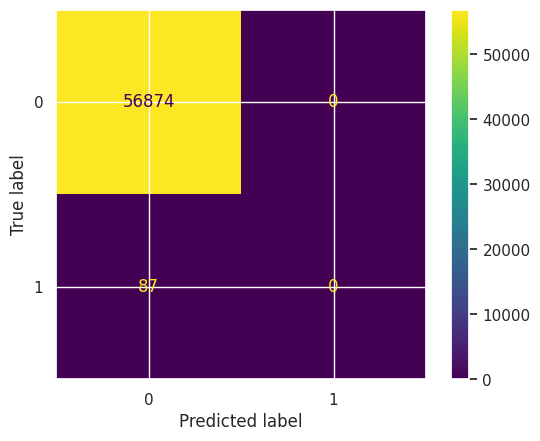

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.00      0.00      0.00        87

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

L2 roc_value: 0.5411
L2 threshold: 0.4993


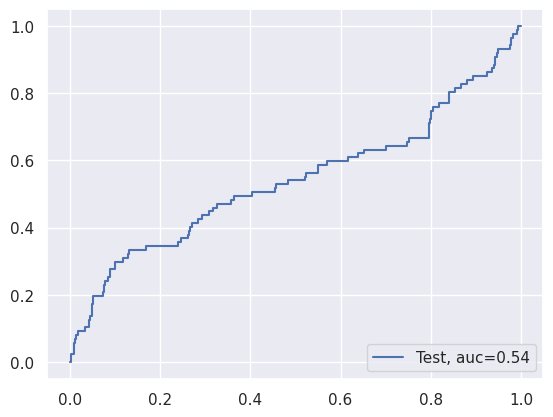

Accuracy of Logistic model with L1 regularisation: 0.9991


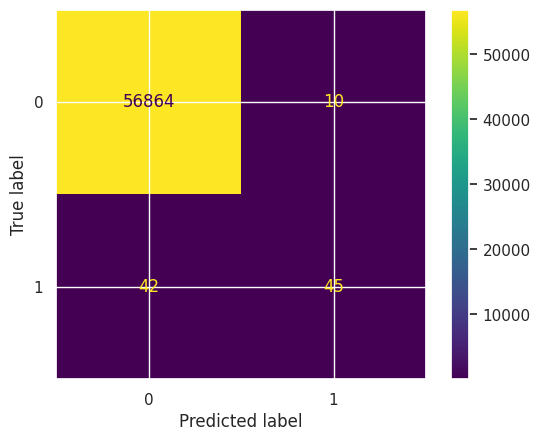

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.82      0.52      0.63        87

    accuracy                           1.00     56961
   macro avg       0.91      0.76      0.82     56961
weighted avg       1.00      1.00      1.00     56961

L1 roc_value: 0.8559
L1 threshold: 0.0534


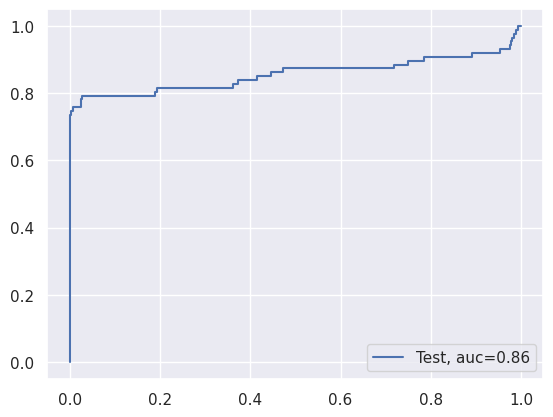

Logistic Regression with L1 And L2 Regularisation completed in 212.25 seconds
gini score: 0.9991


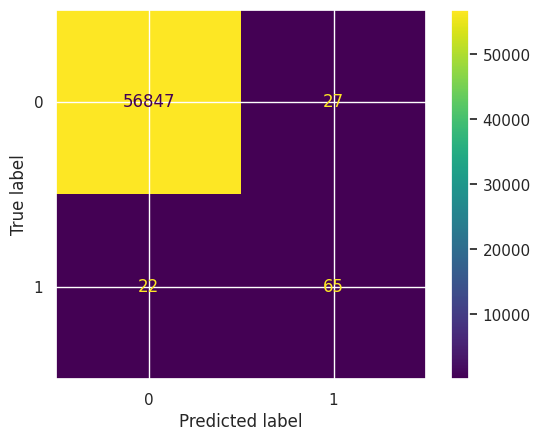

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.71      0.75      0.73        87

    accuracy                           1.00     56961
   macro avg       0.85      0.87      0.86     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8733
Tree threshold: 1.0000
ROC for the test dataset 87.3%


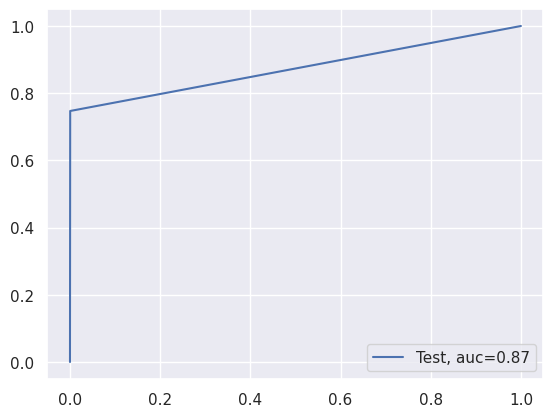

entropy score: 0.9993


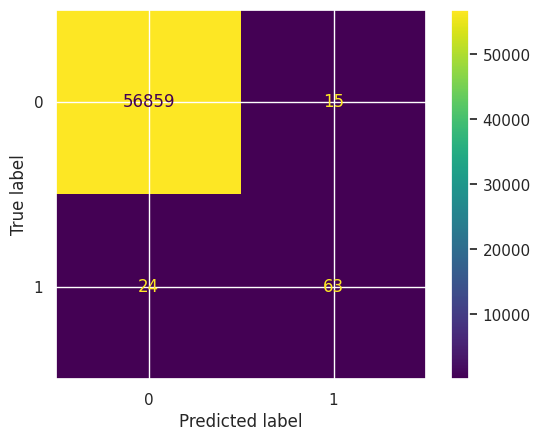

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.81      0.72      0.76        87

    accuracy                           1.00     56961
   macro avg       0.90      0.86      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8619
Tree threshold: 1.0000
ROC for the test dataset 86.2%


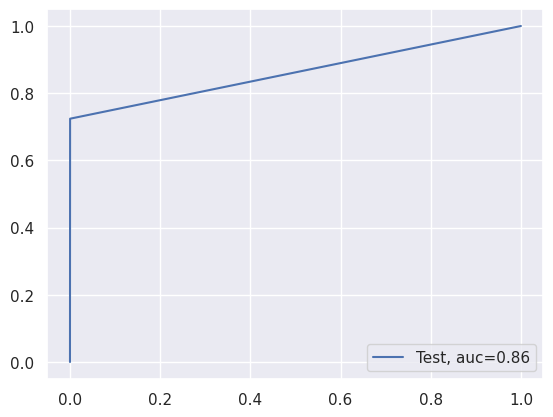

Decision Tree Models with 'gini' & 'entropy' criteria completed in 72.68 seconds
KNN Accuracy: 0.9994


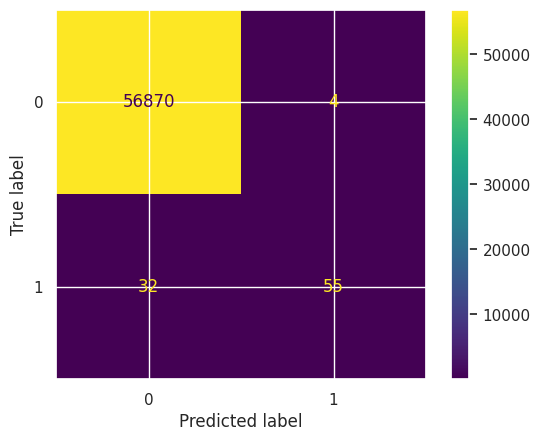

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.93      0.63      0.75        87

    accuracy                           1.00     56961
   macro avg       0.97      0.82      0.88     56961
weighted avg       1.00      1.00      1.00     56961

KNN ROC AUC: 0.8734
KNN optimal threshold: 0.2000


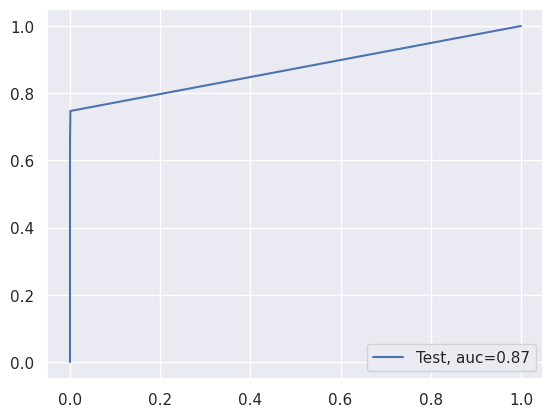

KNN Model completed in 382.69 seconds
Model Accuracy: 0.9996


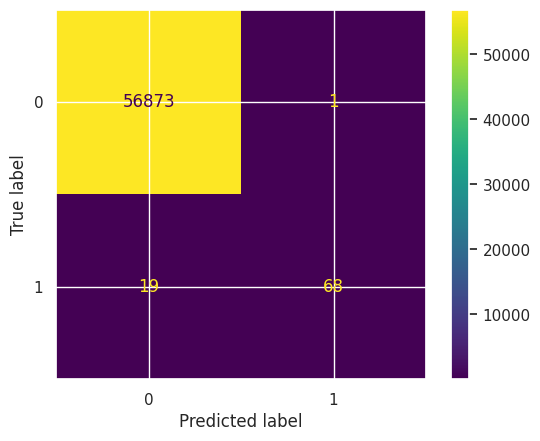

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.99      0.78      0.87        87

    accuracy                           1.00     56961
   macro avg       0.99      0.89      0.94     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9442
XGBoost threshold: 0.0000
ROC for the test dataset 94.4%


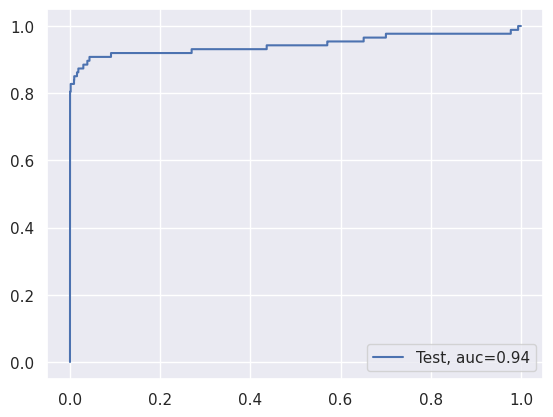

XGBoost Model completed in 10.57 seconds
Model Accuracy: 0.9996


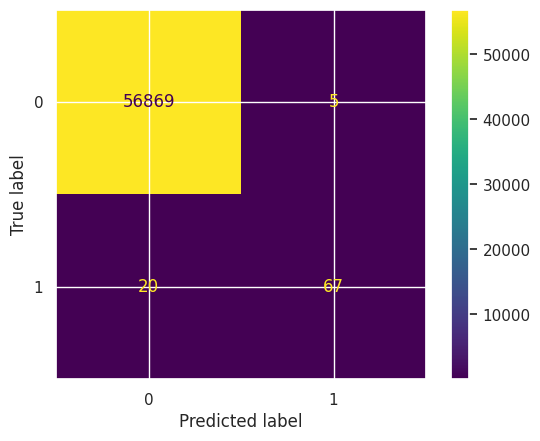

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.93      0.77      0.84        87

    accuracy                           1.00     56961
   macro avg       0.97      0.89      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9349
Random Forest threshold: 0.0100
ROC for the test dataset 93.5%


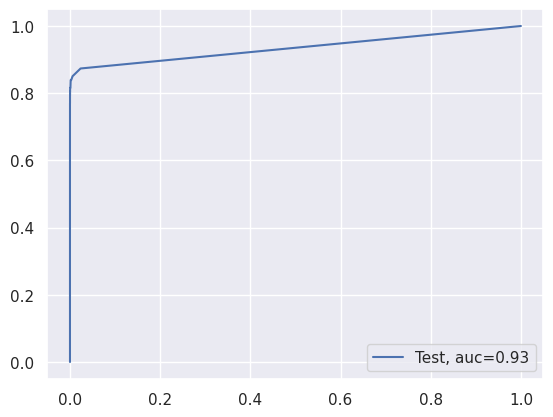

Random Forest Model completed in 523.28 seconds
accuracy_score: 0.9985


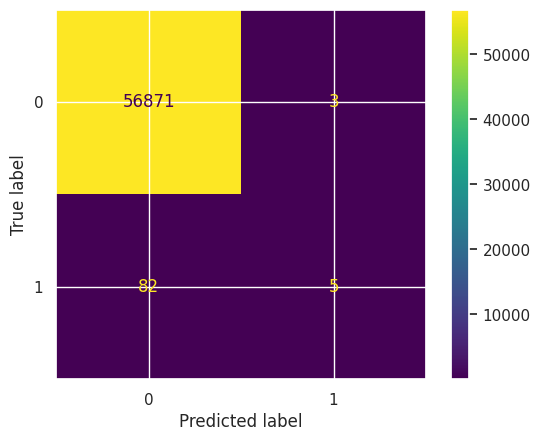

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.62      0.06      0.11        87

    accuracy                           1.00     56961
   macro avg       0.81      0.53      0.55     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.5044
SVM threshold: 0.0019
ROC for the test dataset 50.4%


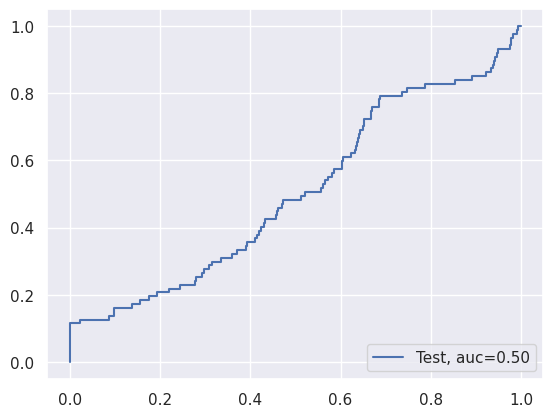

SVM Model with Sigmoid Kernel completed in 747.51 seconds

All models completed in 1143.66 seconds

Final Results:
         Data_Imbalance_Handiling                                       Model  \
0  RepeatedKFold Cross Validation  Logistic Regression with L2 Regularisation   
1  RepeatedKFold Cross Validation  Logistic Regression with L1 Regularisation   
0  RepeatedKFold Cross Validation               Tree Model with gini criteria   
1  RepeatedKFold Cross Validation            Tree Model with entropy criteria   
0  RepeatedKFold Cross Validation                                         KNN   
0  RepeatedKFold Cross Validation                                     XGBoost   
0  RepeatedKFold Cross Validation                               Random Forest   
0  RepeatedKFold Cross Validation                                         SVM   

   Accuracy  roc_value  threshold  
0  0.998473   0.541106   0.499288  
1  0.999087   0.855867   0.053377  
0  0.999140   0.873326   1.000000  
1  0.999315

In [ ]:
import time
import concurrent.futures
import pandas as pd
import numpy as np
from functools import partial

def run_model(model_func, df_Results, data_handling, X_train, y_train, X_test, y_test):
    """Helper function to run individual models"""
    start_time = time.time()
    result = model_func(df_Results, data_handling, X_train, y_train, X_test, y_test)
    duration = time.time() - start_time
    return result, duration

def run_all_models_parallel(X_train_cv, y_train_cv, X_test_cv, y_test_cv):
    """Run all models in parallel"""

    # Initialize results DataFrame if not exists
    if 'df_Results' not in locals():
        df_Results = pd.DataFrame()

    data_handling = "RepeatedKFold Cross Validation"

    # Define model configurations
    model_configs = [
        ("Logistic Regression with L1 And L2 Regularisation", buildAndRunLogisticModels),
        ("KNN Model", buildAndRunKNNModels),
        ("Decision Tree Models with 'gini' & 'entropy' criteria", buildAndRunTreeModels),
        ("Random Forest Model", buildAndRunRandomForestModels),
        ("XGBoost Model", buildAndRunXGBoostModels),
        ("SVM Model with Sigmoid Kernel", buildAndRunSVMModels)
    ]

    # Prepare partial function with fixed arguments
    partial_run = partial(
        run_model,
        df_Results=df_Results,
        data_handling=data_handling,
        X_train=X_train_cv,
        y_train=y_train_cv,
        X_test=X_test_cv,
        y_test=y_test_cv
    )

    results = []

    # Use ProcessPoolExecutor for CPU-bound tasks
    with concurrent.futures.ProcessPoolExecutor() as executor:
        # Submit all jobs
        future_to_model = {executor.submit(partial_run, model_func): model_name
                           for model_name, model_func in model_configs}

        # Get results as they complete
        for future in concurrent.futures.as_completed(future_to_model):
            model_name = future_to_model[future]
            try:
                df_result, duration = future.result()
                results.append((model_name, df_result, duration))
                print(f"{model_name} completed in {duration:.2f} seconds")
            except Exception as e:
                print(f"{model_name} generated an exception: {e}")

    # Combine all results
    final_df_Results = pd.concat([result[1] for result in results])

    return final_df_Results

# Run all models in parallel
if __name__ == "__main__":
    # Convert data to numpy arrays for better performance
    X_train_cv = X_train_cv.to_numpy()
    y_train_cv = y_train_cv.to_numpy()
    X_test_cv = X_test_cv.to_numpy()
    y_test_cv = y_test_cv.to_numpy()

    start_time = time.time()
    df_Results = run_all_models_parallel(X_train_cv, y_train_cv, X_test_cv, y_test_cv)
    total_time = time.time() - start_time

    print(f"\nAll models completed in {total_time:.2f} seconds")
    print("\nFinal Results:")
    print(df_Results)


## It seems XGBOost with Repeated KFold cross validation has provided us wih best results with ROC_Value of 0.984352

> Add blockquote



In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']


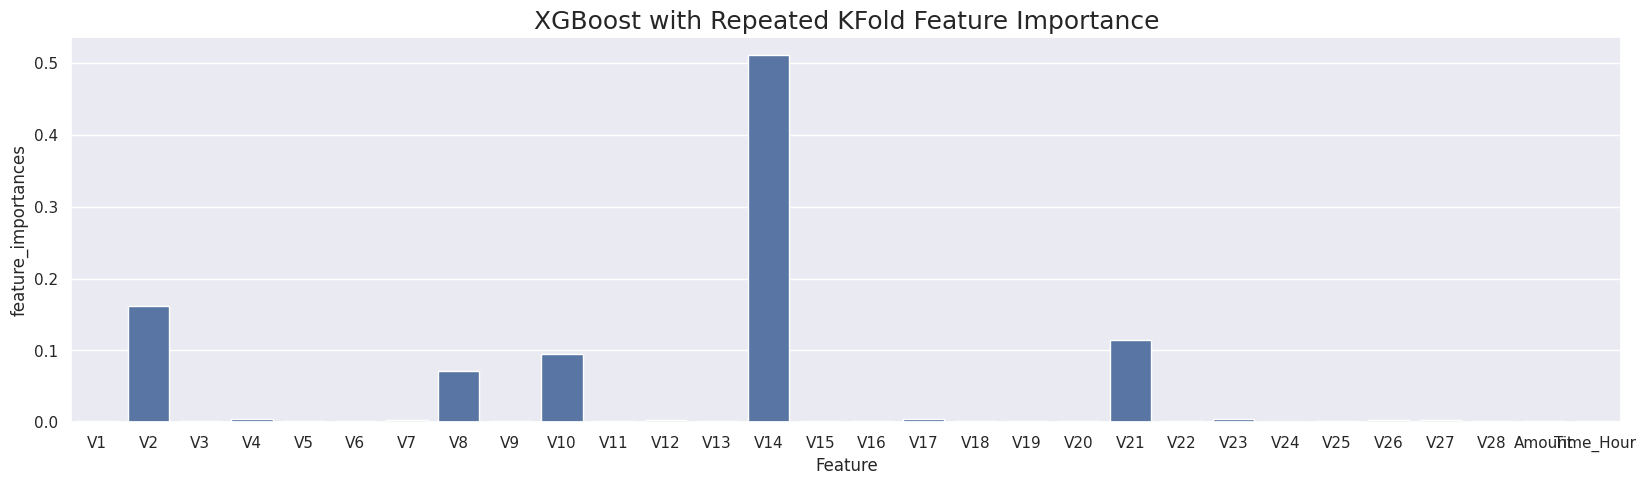

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

# Perform cross validation with StratifiedKFold

In [ ]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

Models completed:   0%|          | 0/3 [00:00<?, ?it/s]


Starting Logistic Regression (L1 & L2)...

Starting KNN...

Starting Decision Tree...
gini score: 0.9988


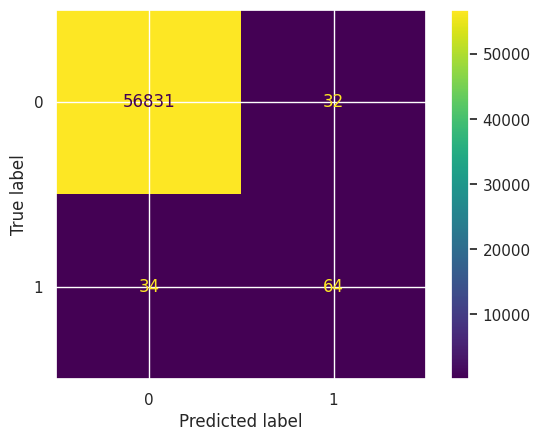

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262
Tree threshold: 1.0000
ROC for the test dataset 82.6%


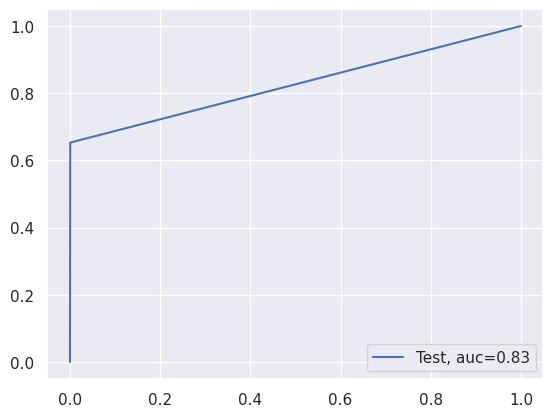

entropy score: 0.9990


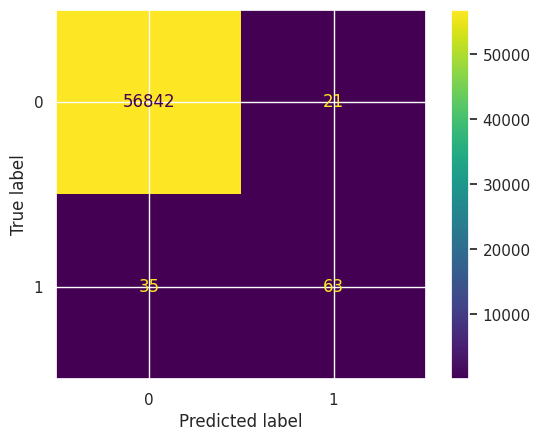

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212
Tree threshold: 1.0000
ROC for the test dataset 82.1%


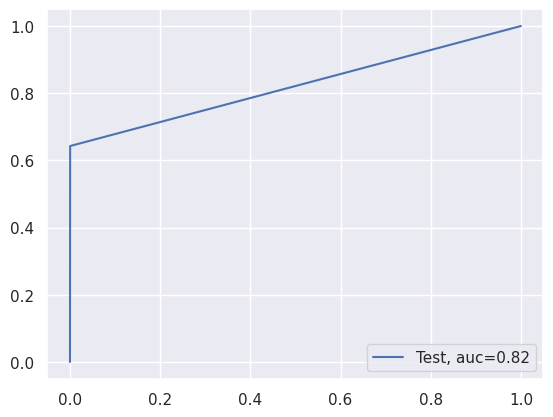

Decision Tree completed in 129.65 seconds
--------------------------------------------------------------------------------


Models completed:  33%|███▎      | 1/3 [02:12<04:24, 132.16s/it]

Accuracy of Logistic model with L2 regularisation: 0.9983


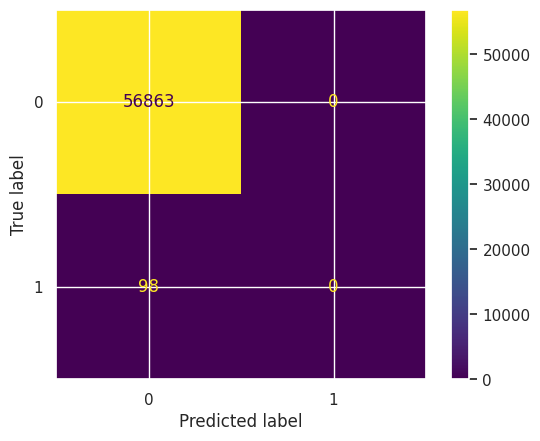

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

L2 roc_value: 0.6112
L2 threshold: 0.4994


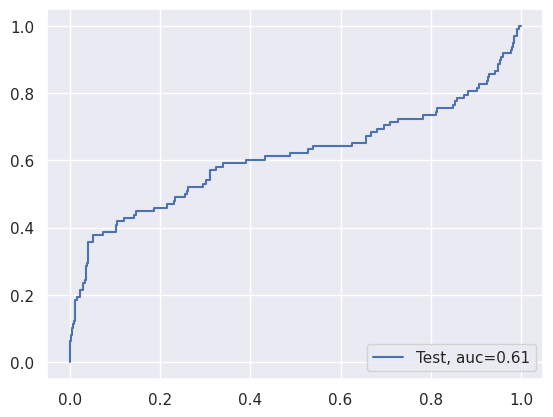

Accuracy of Logistic model with L1 regularisation: 0.9988


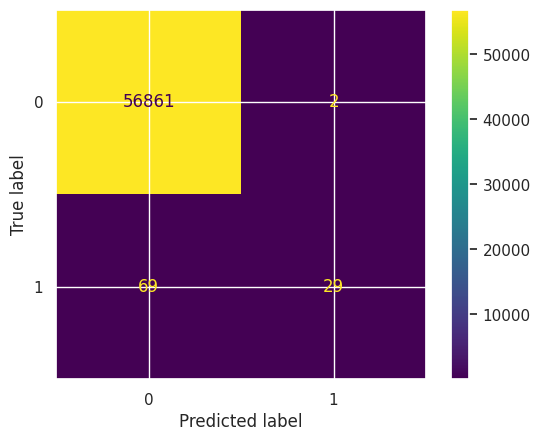

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

L1 roc_value: 0.8891
L1 threshold: 0.0211


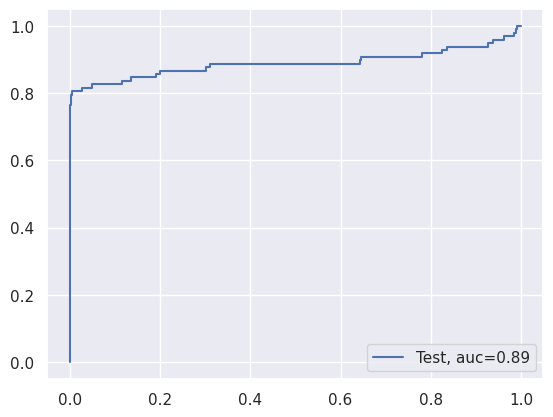

Logistic Regression (L1 & L2) completed in 248.08 seconds
--------------------------------------------------------------------------------


Models completed:  67%|██████▋   | 2/3 [04:08<02:02, 122.90s/it]

KNN Accuracy: 0.9992


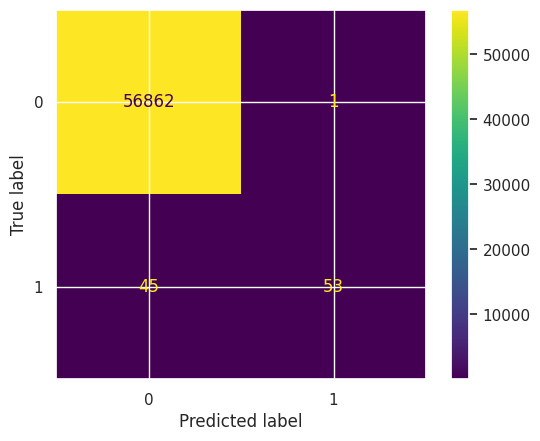

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN ROC AUC: 0.8057
KNN optimal threshold: 0.2000


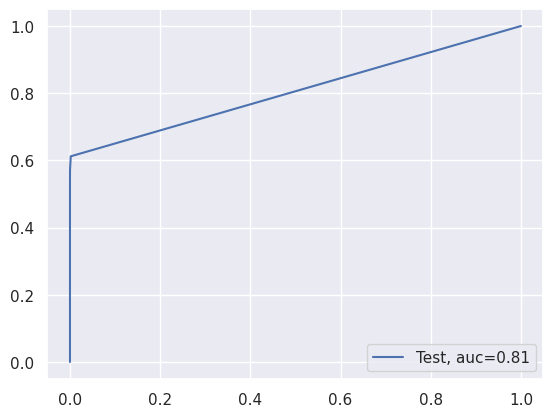

KNN completed in 341.63 seconds
--------------------------------------------------------------------------------


Models completed: 100%|██████████| 3/3 [05:43<00:00, 114.42s/it]



Total execution time: 343.51 seconds

Final Results:
            Data_Imbalance_Handiling  \
5     RepeatedKFold Cross Validation   
6     RepeatedKFold Cross Validation   
11  StratifiedKFold Cross Validation   
4     RepeatedKFold Cross Validation   
2     RepeatedKFold Cross Validation   
3     RepeatedKFold Cross Validation   
1     RepeatedKFold Cross Validation   
8   StratifiedKFold Cross Validation   
9   StratifiedKFold Cross Validation   
12  StratifiedKFold Cross Validation   
10  StratifiedKFold Cross Validation   
0     RepeatedKFold Cross Validation   
7     RepeatedKFold Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
5                                      XGBoost  0.999649   0.944161   0.000048  
6                                Random Forest  0.999561   0.934876   0.010000  
11  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
4                                          KNN  0.999368   0.

In [ ]:
import time
import concurrent.futures
import numpy as np
import pandas as pd
from tqdm import tqdm  # install with: pip install tqdm


def run_model_with_timing(model_func, name, df_Results, X_train, y_train, X_test, y_test):
    """Run a single model with timing and error capture."""
    print(f"\nStarting {name}...")
    start_time = time.time()
    try:
        result = model_func(
            df_Results,
            "StratifiedKFold Cross Validation",  # Tag for results DataFrame
            X_train,
            y_train,
            X_test,
            y_test
        )
        duration = time.time() - start_time
        print(f"{name} completed in {duration:.2f} seconds")
        print('-' * 80)
        return result
    except Exception as e:
        print(f"Error in {name}: {str(e)}")
        return None


def run_all_models_parallel(df_Results, X_train, y_train, X_test, y_test,
                            max_workers=3, use_threads=False):
    """Run selected models in parallel (RF, XGBoost, SVM removed)."""

    # Ensure data is float32 for performance
    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)

    # Model list: Only Logistic Regression, KNN, Decision Tree
    model_configs = [
        ("Logistic Regression (L1 & L2)", buildAndRunLogisticModels),
        ("KNN", buildAndRunKNNModels),
        ("Decision Tree", buildAndRunTreeModels)
    ]

    ExecutorClass = concurrent.futures.ThreadPoolExecutor if use_threads else concurrent.futures.ProcessPoolExecutor
    results = []

    with ExecutorClass(max_workers=max_workers) as executor:
        futures = {
            executor.submit(run_model_with_timing, model_func, name,
                            df_Results, X_train, y_train, X_test, y_test): name
            for name, model_func in model_configs
        }

        # Show progress as models complete
        for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc="Models completed"):
            model_name = futures[future]
            try:
                result = future.result()
                if result is not None:
                    results.append(result)
                else:
                    print(f"Warning: {model_name} returned None due to error.")
            except Exception as e:
                print(f"Exception raised from {model_name}: {e}")

    # Combine results if any succeeded
    if results:
        return pd.concat(results).drop_duplicates().reset_index(drop=True)
    else:
        print("No successful model results to combine. Returning original df_Results.")
        return df_Results


if __name__ == "__main__":
    import gc

    gc.collect()
    total_start_time = time.time()

    try:
        df_Results = run_all_models_parallel(
            df_Results,
            X_train_SKF_cv,
            y_train_SKF_cv,
            X_test_SKF_cv,
            y_test_SKF_cv,
            max_workers=3,
            use_threads=False  # Set True to avoid pickling overhead
        )

        total_time = time.time() - total_start_time
        print(f"\nTotal execution time: {total_time:.2f} seconds")

        print("\nFinal Results:")
        print(df_Results.sort_values('roc_value', ascending=False))

    except Exception as e:
        print(f"Error in execution: {str(e)}")

    finally:
        gc.collect()


In [ ]:
df_Results

Data_Imbalance_Handiling  \
0     RepeatedKFold Cross Validation   
1     RepeatedKFold Cross Validation   
2     RepeatedKFold Cross Validation   
3     RepeatedKFold Cross Validation   
4     RepeatedKFold Cross Validation   
5     RepeatedKFold Cross Validation   
6     RepeatedKFold Cross Validation   
7     RepeatedKFold Cross Validation   
8   StratifiedKFold Cross Validation   
9   StratifiedKFold Cross Validation   
10  StratifiedKFold Cross Validation   
11  StratifiedKFold Cross Validation   
12  StratifiedKFold Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998473   0.541106   0.499288  
1   Logistic Regression with L1 Regularisation  0.999087   0.855867   0.053377  
2                Tree Model with gini criteria  0.999140   0.873326   1.000000  
3             Tree Model with entropy criteria  0.999315   0.861937   1.000000  
4                                          KNN  0.999368   0.873381   0.200000  
5                                      XGBoost  0.999649   0.944161   0.000048  
6                                Random Forest  0.999561   0.934876   0.010000  
7                                          SVM  0.998508   0.504413   0.001875  
8                Tree Model with gini criteria  0.998841   0.826249   1.000000  
9             Tree Model with entropy criteria  0.999017   0.821244   1.000000  
10  Logistic Regression with L2 Regularisation  0.998280   0.611162   0.499392  
11  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
12                                         KNN  0.999192   0.805746   0.200000

**As the results show Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results**



#### Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
  # Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_)
print(searchCV_l2.scores_)


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1]


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))




Max auc_roc for l2: 0.5584887728914751
Parameters for l2 regularisations
[[-1.29662947e-07  1.26071386e-07 -2.12587293e-07  1.35971299e-07
  -8.07897562e-08 -3.70679101e-08 -1.51986313e-07  1.80344353e-08
  -5.83081382e-08 -1.47617741e-07  1.06204874e-07 -1.56442005e-07
  -3.91596568e-09 -1.89123035e-07 -3.71365329e-10 -1.14504233e-07
  -1.70320303e-07 -6.26041863e-08  2.33948624e-08  7.95499273e-09
   3.01771913e-08  3.94716503e-09 -1.94074830e-10 -4.89780428e-09
   4.86784437e-09  4.49203887e-09  5.95832652e-09  4.60363515e-09
  -6.62950400e-04 -1.05203313e-04]]
[-7.48138539e-06]
{np.int64(1): array([[0.56021144, 0.55928832, 0.55737737, 0.55381433, 0.55381433,
        0.55381433, 0.55381433, 0.55381433, 0.55381433, 0.55381433,
        0.55381433, 0.55381433, 0.55381433, 0.55381433, 0.55381433,
        0.55381433, 0.55381433, 0.55381433, 0.55381433, 0.55381433],
       [0.55864254, 0.5575424 , 0.55522446, 0.5518581 , 0.5518581 ,
        0.5518581 , 0.5518581 , 0.5518581 , 0.5518581 , 

In [ ]:
searchCV_l2.coef_

array([[-1.29662947e-07,  1.26071386e-07, -2.12587293e-07,
         1.35971299e-07, -8.07897562e-08, -3.70679101e-08,
        -1.51986313e-07,  1.80344353e-08, -5.83081382e-08,
        -1.47617741e-07,  1.06204874e-07, -1.56442005e-07,
        -3.91596568e-09, -1.89123035e-07, -3.71365329e-10,
        -1.14504233e-07, -1.70320303e-07, -6.26041863e-08,
         2.33948624e-08,  7.95499273e-09,  3.01771913e-08,
         3.94716503e-09, -1.94074830e-10, -4.89780428e-09,
         4.86784437e-09,  4.49203887e-09,  5.95832652e-09,
         4.60363515e-09, -6.62950400e-04, -1.05203313e-04]])

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

In [ ]:
coefficients

Feature  Importance Coefficient
0          V1           -1.296629e-07
1          V2            1.260714e-07
2          V3           -2.125873e-07
3          V4            1.359713e-07
4          V5           -8.078976e-08
5          V6           -3.706791e-08
6          V7           -1.519863e-07
7          V8            1.803444e-08
8          V9           -5.830814e-08
9         V10           -1.476177e-07
10        V11            1.062049e-07
11        V12           -1.564420e-07
12        V13           -3.915966e-09
13        V14           -1.891230e-07
14        V15           -3.713653e-10
15        V16           -1.145042e-07
16        V17           -1.703203e-07
17        V18           -6.260419e-08
18        V19            2.339486e-08
19        V20            7.954993e-09
20        V21            3.017719e-08
21        V22            3.947165e-09
22        V23           -1.940748e-10
23        V24           -4.897804e-09
24        V25            4.867844e-09
25        V26            4.492039e-09
26        V27            5.958327e-09
27        V28            4.603635e-09
28     Amount           -6.629504e-04
29  Time_Hour           -1.052033e-04

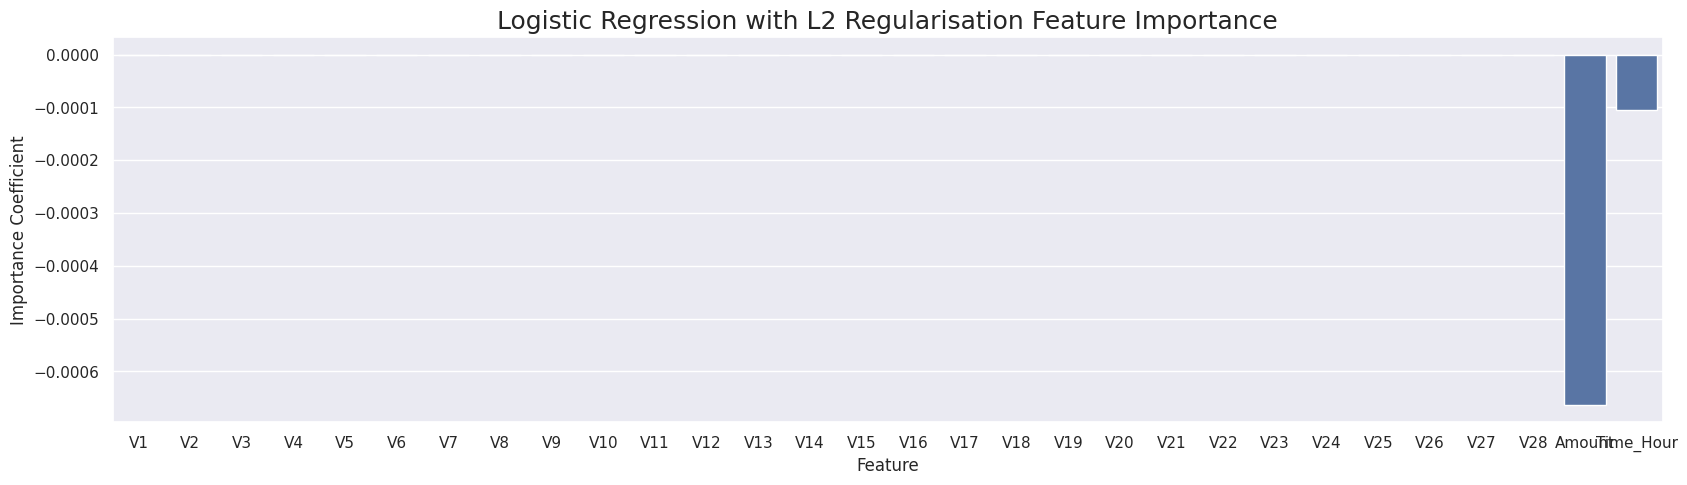

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()



**Its is evident that V4, V11, v5 has + ve imporatnce whereas V14, V12, V10 seems to have -ve impact on the predictaions**

#As the models Oversampling data, take significantly longer time to run.
We will try with undersampling methods

In [ ]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Accuracy of Logistic model with L2 regularisation: 0.9982


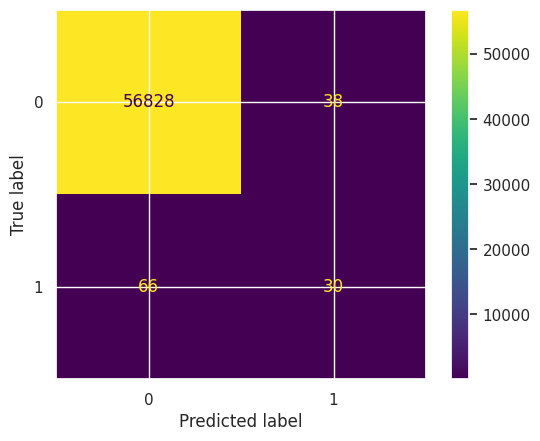

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.44      0.31      0.37        96

    accuracy                           1.00     56962
   macro avg       0.72      0.66      0.68     56962
weighted avg       1.00      1.00      1.00     56962

L2 roc_value: 0.6512
L2 threshold: 0.4992


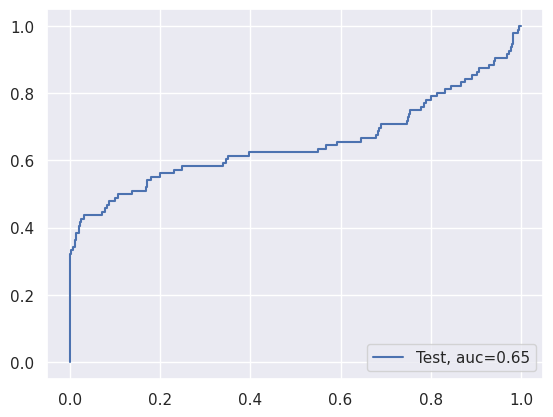

Accuracy of Logistic model with L1 regularisation: 0.9983


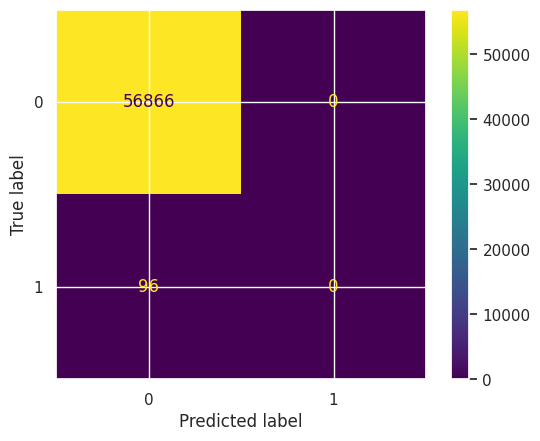

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

L1 roc_value: 0.5000
L1 threshold: inf


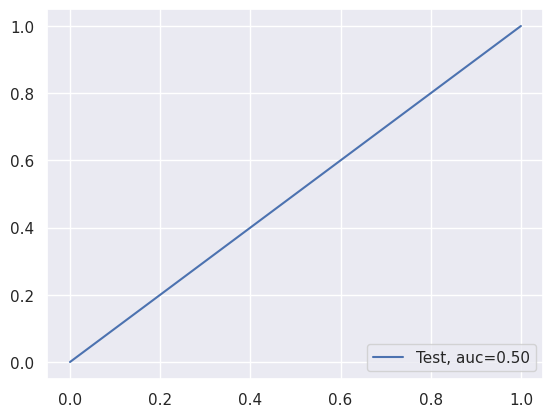

Time Taken by Model: --- 2.29 seconds ---
--------------------------------------------------------------------------------
KNN Model
KNN Accuracy: 0.9747


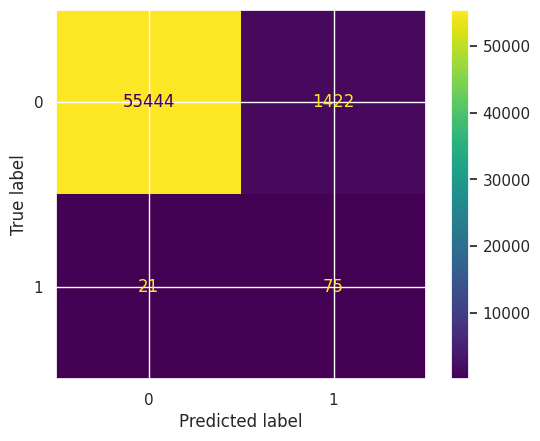

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.05      0.78      0.09        96

    accuracy                           0.97     56962
   macro avg       0.52      0.88      0.54     56962
weighted avg       1.00      0.97      0.99     56962

KNN ROC AUC: 0.9413
KNN optimal threshold: 0.4000


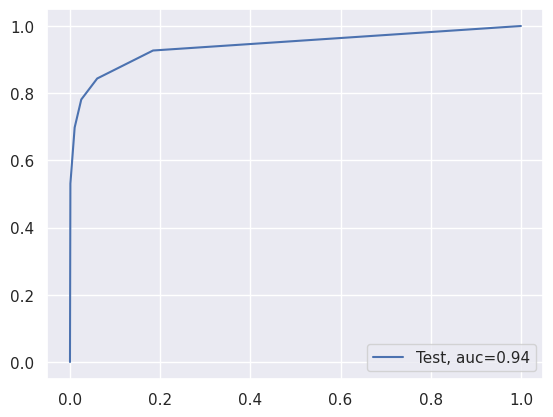

Time Taken by Model: --- 1.40 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9377


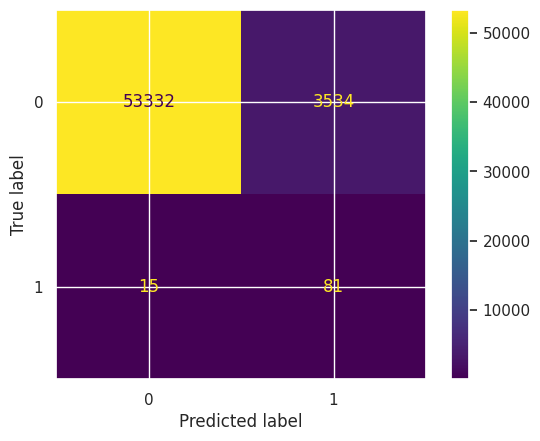

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.02      0.84      0.04        96

    accuracy                           0.94     56962
   macro avg       0.51      0.89      0.51     56962
weighted avg       1.00      0.94      0.97     56962

gini tree_roc_value: 0.8908
Tree threshold: 1.0000
ROC for the test dataset 89.1%


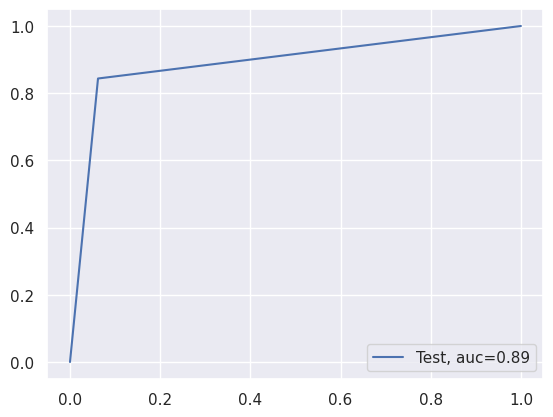

entropy score: 0.9444


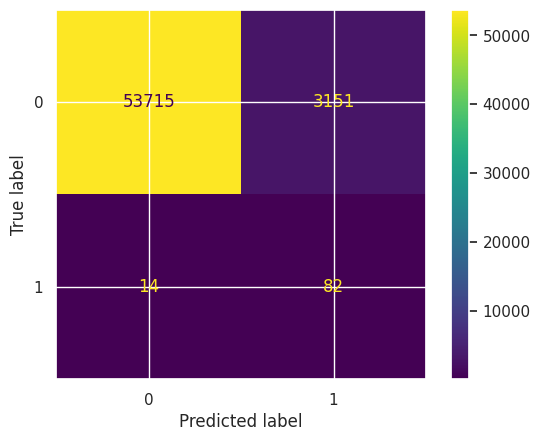

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.03      0.85      0.05        96

    accuracy                           0.94     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.94      0.97     56962

entropy tree_roc_value: 0.8994
Tree threshold: 1.0000
ROC for the test dataset 89.9%


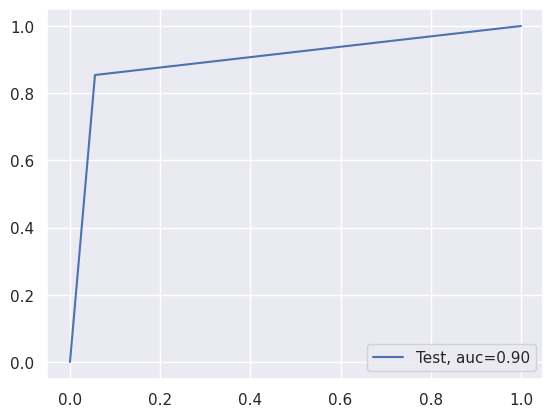

Time Taken by Model: --- 0.79 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9936


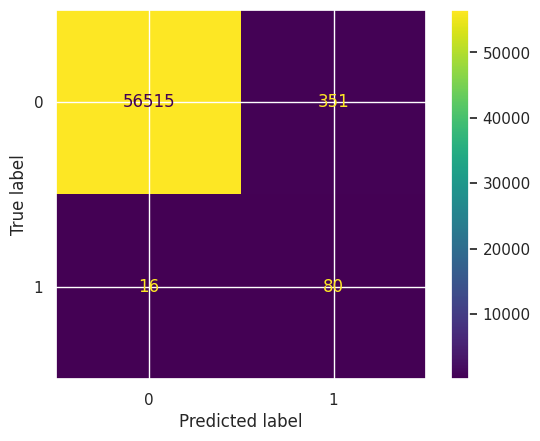

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.19      0.83      0.30        96

    accuracy                           0.99     56962
   macro avg       0.59      0.91      0.65     56962
weighted avg       1.00      0.99      1.00     56962

Random Forest roc_value: 0.9747
Random Forest threshold: 0.3300
ROC for the test dataset 97.5%


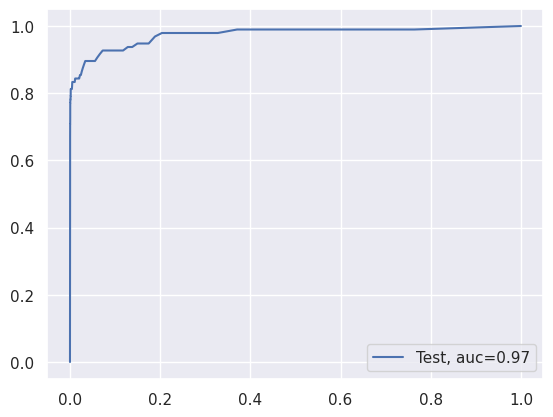

Time Taken by Model: --- 2.16 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9848


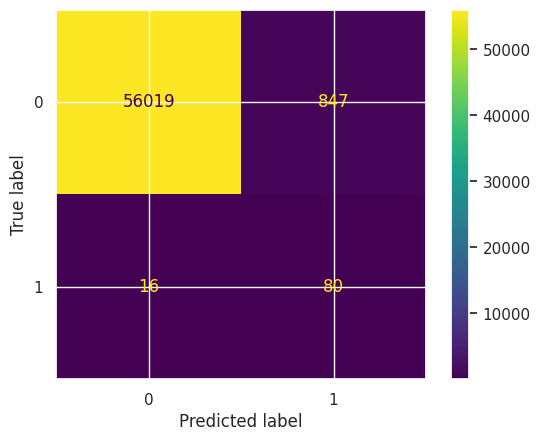

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.09      0.83      0.16        96

    accuracy                           0.98     56962
   macro avg       0.54      0.91      0.57     56962
weighted avg       1.00      0.98      0.99     56962

XGBoost roc_value: 0.9784
XGBoost threshold: 0.0705
ROC for the test dataset 97.8%


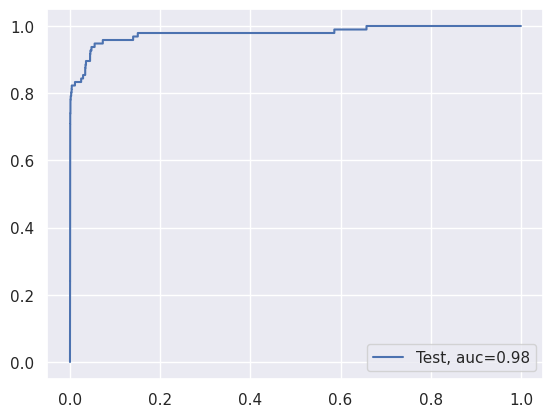

Time Taken by Model: --- 0.83 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score: 0.7534


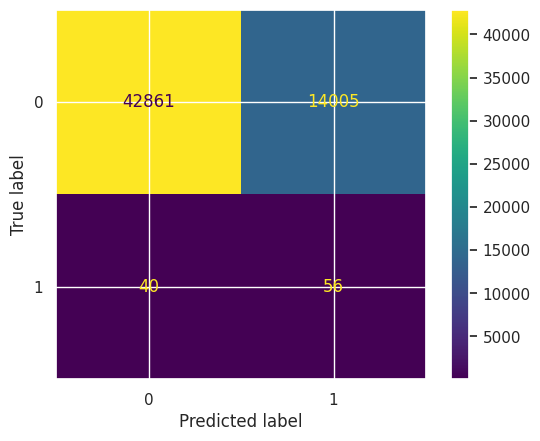

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     56866
           1       0.00      0.58      0.01        96

    accuracy                           0.75     56962
   macro avg       0.50      0.67      0.43     56962
weighted avg       1.00      0.75      0.86     56962

SVM roc_value: 0.6854
SVM threshold: 0.3471
ROC for the test dataset 68.5%


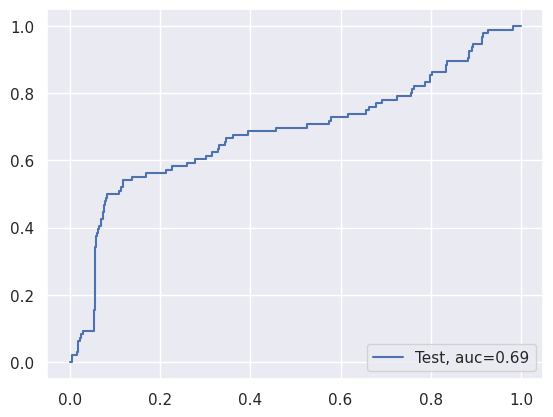

Time Taken by Model: --- 4.08 seconds ---
--------------------------------------------------------------------------------


In [ ]:
import time

def run_and_time_model(df_results, model_name, run_function, method_name, X_train, y_train, X_test, y_test):
    print(f"{model_name}")
    start_time = time.time()
    df_results = run_function(df_results, method_name, X_train, y_train, X_test, y_test)
    elapsed = time.time() - start_time
    print(f"Time Taken by Model: --- {elapsed:.2f} seconds ---")
    print('-'*80)
    return df_results

models_to_run = [
    ("Logistic Regression with L1 And L2 Regularisation", buildAndRunLogisticModels),
    ("KNN Model", buildAndRunKNNModels),
    ("Decision Tree Models with 'gini' & 'entropy' criteria", buildAndRunTreeModels),
    ("Random Forest Model", buildAndRunRandomForestModels),
    ("XGBoost Model", buildAndRunXGBoostModels),
    ("SVM Model with Sigmoid Kernel", buildAndRunSVMModels)
]

for model_name, run_func in models_to_run:
    df_Results = run_and_time_model(df_Results, model_name, run_func, "Random Undersampling", X_Under, y_Under, X_test, y_test)


In [ ]:
df_Results

Data_Imbalance_Handiling  \
0     RepeatedKFold Cross Validation   
1     RepeatedKFold Cross Validation   
2     RepeatedKFold Cross Validation   
3     RepeatedKFold Cross Validation   
4     RepeatedKFold Cross Validation   
5     RepeatedKFold Cross Validation   
6     RepeatedKFold Cross Validation   
7     RepeatedKFold Cross Validation   
8   StratifiedKFold Cross Validation   
9   StratifiedKFold Cross Validation   
10  StratifiedKFold Cross Validation   
11  StratifiedKFold Cross Validation   
12  StratifiedKFold Cross Validation   
13              Random Undersampling   
14              Random Undersampling   
15              Random Undersampling   
16              Random Undersampling   
17              Random Undersampling   
18              Random Undersampling   
19              Random Undersampling   
20              Random Undersampling   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998473   0.541106   0.499288  
1   Logistic Regression with L1 Regularisation  0.999087   0.855867   0.053377  
2                Tree Model with gini criteria  0.999140   0.873326   1.000000  
3             Tree Model with entropy criteria  0.999315   0.861937   1.000000  
4                                          KNN  0.999368   0.873381   0.200000  
5                                      XGBoost  0.999649   0.944161   0.000048  
6                                Random Forest  0.999561   0.934876   0.010000  
7                                          SVM  0.998508   0.504413   0.001875  
8                Tree Model with gini criteria  0.998841   0.826249   1.000000  
9             Tree Model with entropy criteria  0.999017   0.821244   1.000000  
10  Logistic Regression with L2 Regularisation  0.998280   0.611162   0.499392  
11  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
12                                         KNN  0.999192   0.805746   0.200000  
13  Logistic Regression with L2 Regularisation  0.998174   0.651199   0.499176  
14  Logistic Regression with L1 Regularisation  0.998315   0.500000        inf  
15                                         KNN  0.974667   0.941324   0.400000  
16               Tree Model with gini criteria  0.937695   0.890802   1.000000  
17            Tree Model with entropy criteria  0.944437   0.899378   1.000000  
18                               Random Forest  0.993557   0.974739   0.330000  
19                                     XGBoost  0.984850   0.978352   0.070525  
20                                         SVM  0.753432   0.685449   0.347097

**It seems Undersampling has impoved the XGBoost Results**

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

# Oversampling with RandomOverSampler and StratifiedKFold Cross Validation

**We will use Random Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the Random Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the Random oversampling techinique

In [ ]:
"""
from imblearn.over_sampling import RandomOverSampler
#Define Oversampler
ROS = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = ROS.fit_resample(X_train, y_train)
"""

'\nfrom imblearn.over_sampling import RandomOverSampler\n#Define Oversampler\nROS = RandomOverSampler(sampling_strategy=0.5)\n# fit and apply the transform\nX_over, y_over = ROS.fit_resample(X_train, y_train)\n'

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Define StratifiedKFold with shuffle for reproducibility
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cols = X.columns  # assuming X is a DataFrame; otherwise define your feature column names here

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    # Apply RandomOverSampler to training data only
    ros = RandomOverSampler(sampling_strategy=0.5, random_state=42)
    X_over, y_over = ros.fit_resample(X_train, y_train)

    # Convert oversampled arrays back to DataFrame with proper column names
    X_over = pd.DataFrame(data=X_over, columns=cols)

    # Now you can use X_over, y_over for model training for this fold
    # For example:
    # model.fit(X_over, y_over)
    # y_pred = model.predict(X_test)
    # Evaluate metrics...

    print(f"Fold {fold} - Oversampled training set size: {X_over.shape[0]}")


Fold 1 - Oversampled training set size: 341178
Fold 2 - Oversampled training set size: 341178
Fold 3 - Oversampled training set size: 341178
Fold 4 - Oversampled training set size: 341178
Fold 5 - Oversampled training set size: 341178


Logistic Regression with L1 And L2 Regularisation
Accuracy of Logistic model with L2 regularisation: 0.9983


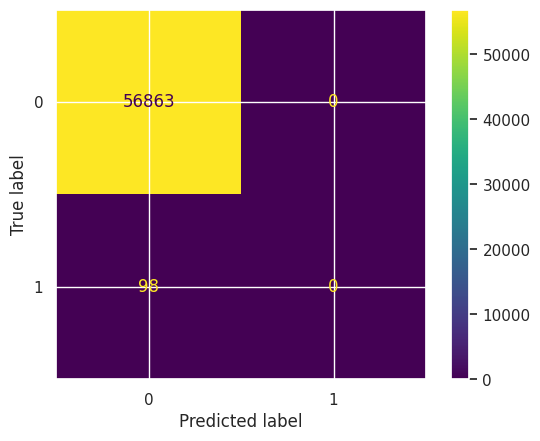

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

L2 roc_value: 0.5000
L2 threshold: inf


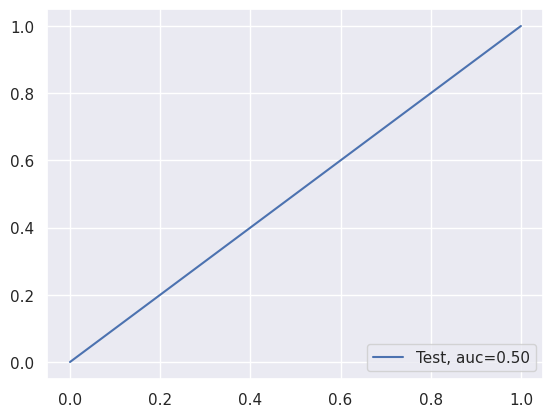

Accuracy of Logistic model with L1 regularisation: 0.9983


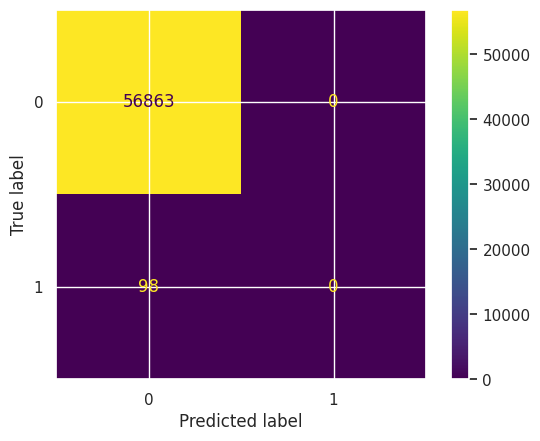

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

L1 roc_value: 0.5000
L1 threshold: inf


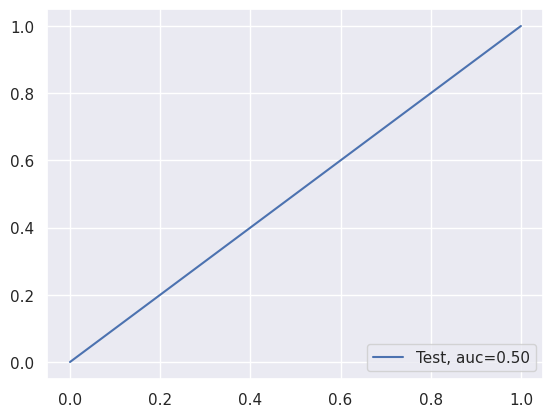

Time Taken by Model: --- 137.19 seconds ---
--------------------------------------------------------------------------------
KNN Model
KNN Accuracy: 0.9990


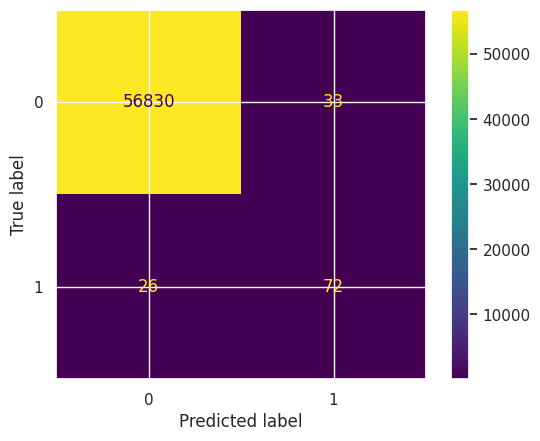

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.69      0.73      0.71        98

    accuracy                           1.00     56961
   macro avg       0.84      0.87      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN ROC AUC: 0.8773
KNN optimal threshold: 0.2000


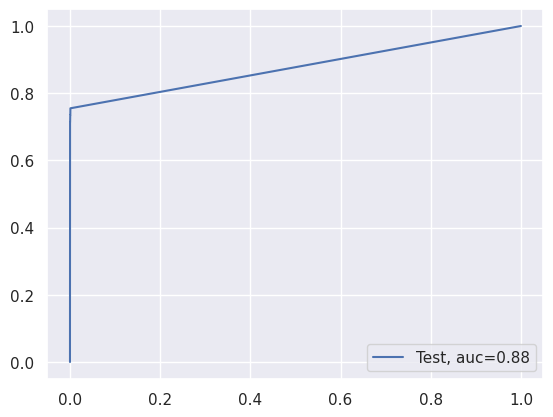

Time Taken by Model: --- 303.05 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9991


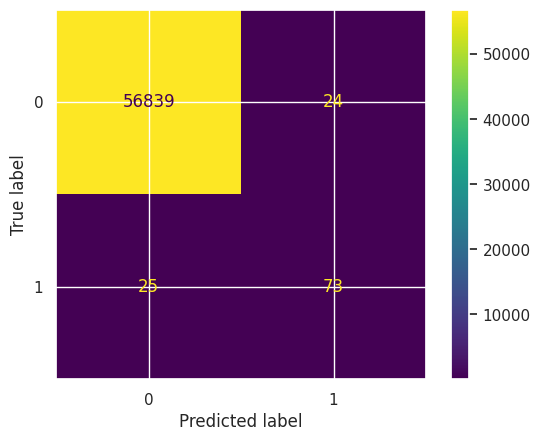

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.74      0.75        98

    accuracy                           1.00     56961
   macro avg       0.88      0.87      0.87     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8722
Tree threshold: 1.0000
ROC for the test dataset 87.2%


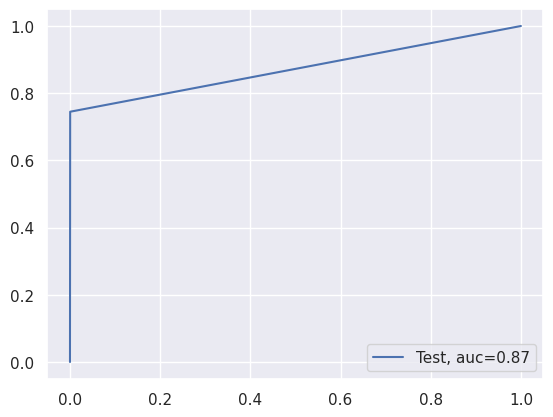

entropy score: 0.9992


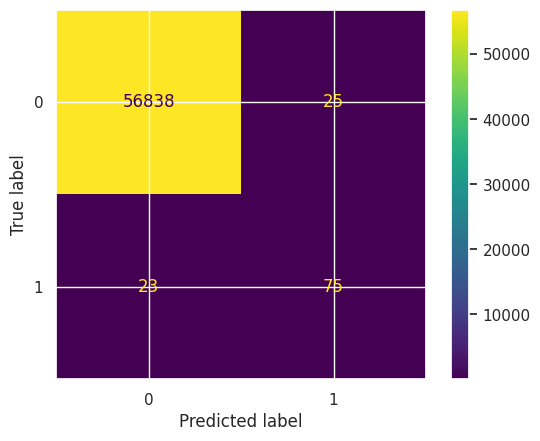

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.77      0.76        98

    accuracy                           1.00     56961
   macro avg       0.87      0.88      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8824
Tree threshold: 1.0000
ROC for the test dataset 88.2%


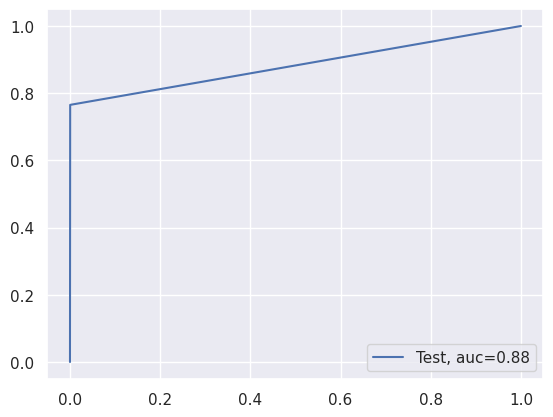

Time Taken by Model: --- 35.97 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995


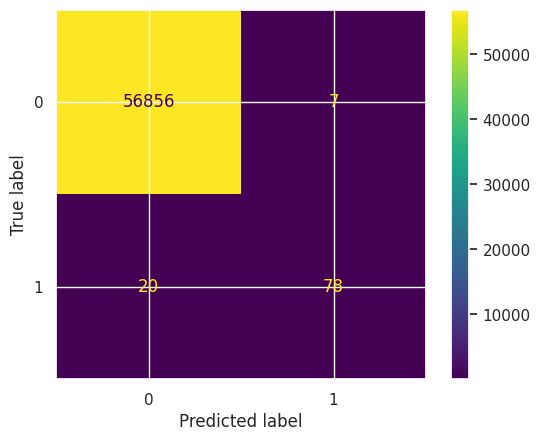

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.80      0.85        98

    accuracy                           1.00     56961
   macro avg       0.96      0.90      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9368
Random Forest threshold: 0.0200
ROC for the test dataset 93.7%


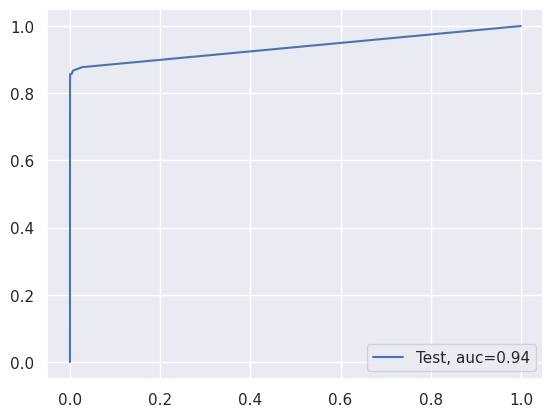

Time Taken by Model: --- 275.07 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9996


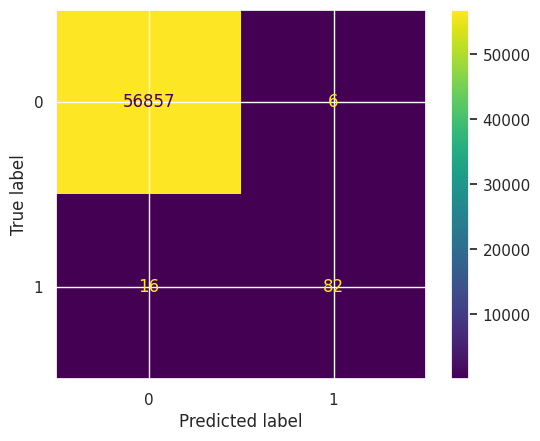

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.84      0.88        98

    accuracy                           1.00     56961
   macro avg       0.97      0.92      0.94     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9757
XGBoost threshold: 0.0002
ROC for the test dataset 97.6%


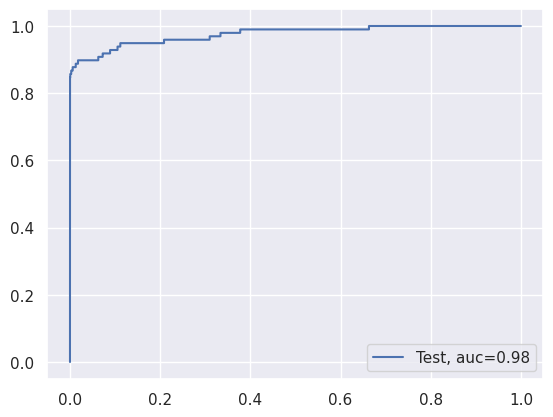

Time Taken by Model: --- 7.12 seconds ---
--------------------------------------------------------------------------------


In [ ]:
import time

def run_model(df_results, method_name, model_func, X_train, y_train, X_test, y_test):
    print(f"{method_name}")
    start_time = time.time()
    df_results = model_func(df_results, "Random Oversampling with StratifiedKFold CV", X_train, y_train, X_test, y_test)
    elapsed = time.time() - start_time
    print(f"Time Taken by Model: --- {elapsed:.2f} seconds ---")
    print('-' * 80)
    return df_results


model_runs = [
    ("Logistic Regression with L1 And L2 Regularisation", buildAndRunLogisticModels),
    ("KNN Model", buildAndRunKNNModels),
    ("Decision Tree Models with 'gini' & 'entropy' criteria", buildAndRunTreeModels),
    ("Random Forest Model", buildAndRunRandomForestModels),
    ("XGBoost Model", buildAndRunXGBoostModels),
    # Uncomment if you want to run SVM:
    # ("SVM Model with Sigmoid Kernel", buildAndRunSVMModels),
]

for model_name, model_func in model_runs:
    df_Results = run_model(df_Results, model_name, model_func, X_over, y_over, X_test, y_test)


In [ ]:
df_Results

Data_Imbalance_Handiling  \
0                RepeatedKFold Cross Validation   
1                RepeatedKFold Cross Validation   
2                RepeatedKFold Cross Validation   
3                RepeatedKFold Cross Validation   
4                RepeatedKFold Cross Validation   
5                RepeatedKFold Cross Validation   
6                RepeatedKFold Cross Validation   
7                RepeatedKFold Cross Validation   
8              StratifiedKFold Cross Validation   
9              StratifiedKFold Cross Validation   
10             StratifiedKFold Cross Validation   
11             StratifiedKFold Cross Validation   
12             StratifiedKFold Cross Validation   
13                         Random Undersampling   
14                         Random Undersampling   
15                         Random Undersampling   
16                         Random Undersampling   
17                         Random Undersampling   
18                         Random Undersampling   
19                         Random Undersampling   
20                         Random Undersampling   
21  Random Oversampling with StratifiedKFold CV   
22  Random Oversampling with StratifiedKFold CV   
23  Random Oversampling with StratifiedKFold CV   
24  Random Oversampling with StratifiedKFold CV   
25  Random Oversampling with StratifiedKFold CV   
26  Random Oversampling with StratifiedKFold CV   
27  Random Oversampling with StratifiedKFold CV   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998473   0.541106   0.499288  
1   Logistic Regression with L1 Regularisation  0.999087   0.855867   0.053377  
2                Tree Model with gini criteria  0.999140   0.873326   1.000000  
3             Tree Model with entropy criteria  0.999315   0.861937   1.000000  
4                                          KNN  0.999368   0.873381   0.200000  
5                                      XGBoost  0.999649   0.944161   0.000048  
6                                Random Forest  0.999561   0.934876   0.010000  
7                                          SVM  0.998508   0.504413   0.001875  
8                Tree Model with gini criteria  0.998841   0.826249   1.000000  
9             Tree Model with entropy criteria  0.999017   0.821244   1.000000  
10  Logistic Regression with L2 Regularisation  0.998280   0.611162   0.499392  
11  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
12                                         KNN  0.999192   0.805746   0.200000  
13  Logistic Regression with L2 Regularisation  0.998174   0.651199   0.499176  
14  Logistic Regression with L1 Regularisation  0.998315   0.500000        inf  
15                                         KNN  0.974667   0.941324   0.400000  
16               Tree Model with gini criteria  0.937695   0.890802   1.000000  
17            Tree Model with entropy criteria  0.944437   0.899378   1.000000  
18                               Random Forest  0.993557   0.974739   0.330000  
19                                     XGBoost  0.984850   0.978352   0.070525  
20                                         SVM  0.753432   0.685449   0.347097  
21  Logistic Regression with L2 Regularisation  0.998280   0.500000        inf  
22  Logistic Regression with L1 Regularisation  0.998280   0.500000        inf  
23                                         KNN  0.998964   0.877341   0.200000  
24               Tree Model with gini criteria  0.999140   0.872238   1.000000  
25            Tree Model with entropy criteria  0.999157   0.882433   1.000000  
26                               Random Forest  0.999526   0.936839   0.020000  
27                                     XGBoost  0.999614   0.975749   0.000168

## Results for Random Oversampling:

**Random Oversampling seems to have +ve change in prediction for XGBoost**
Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# Oversampling with  SMOTE Oversamplng

**We will use SMOTE Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the SMOTE Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the SMOTE oversampling techinique

### Print the class distribution after applying SMOTE

InvalidIndexError: (slice(None, 394, None), 0)

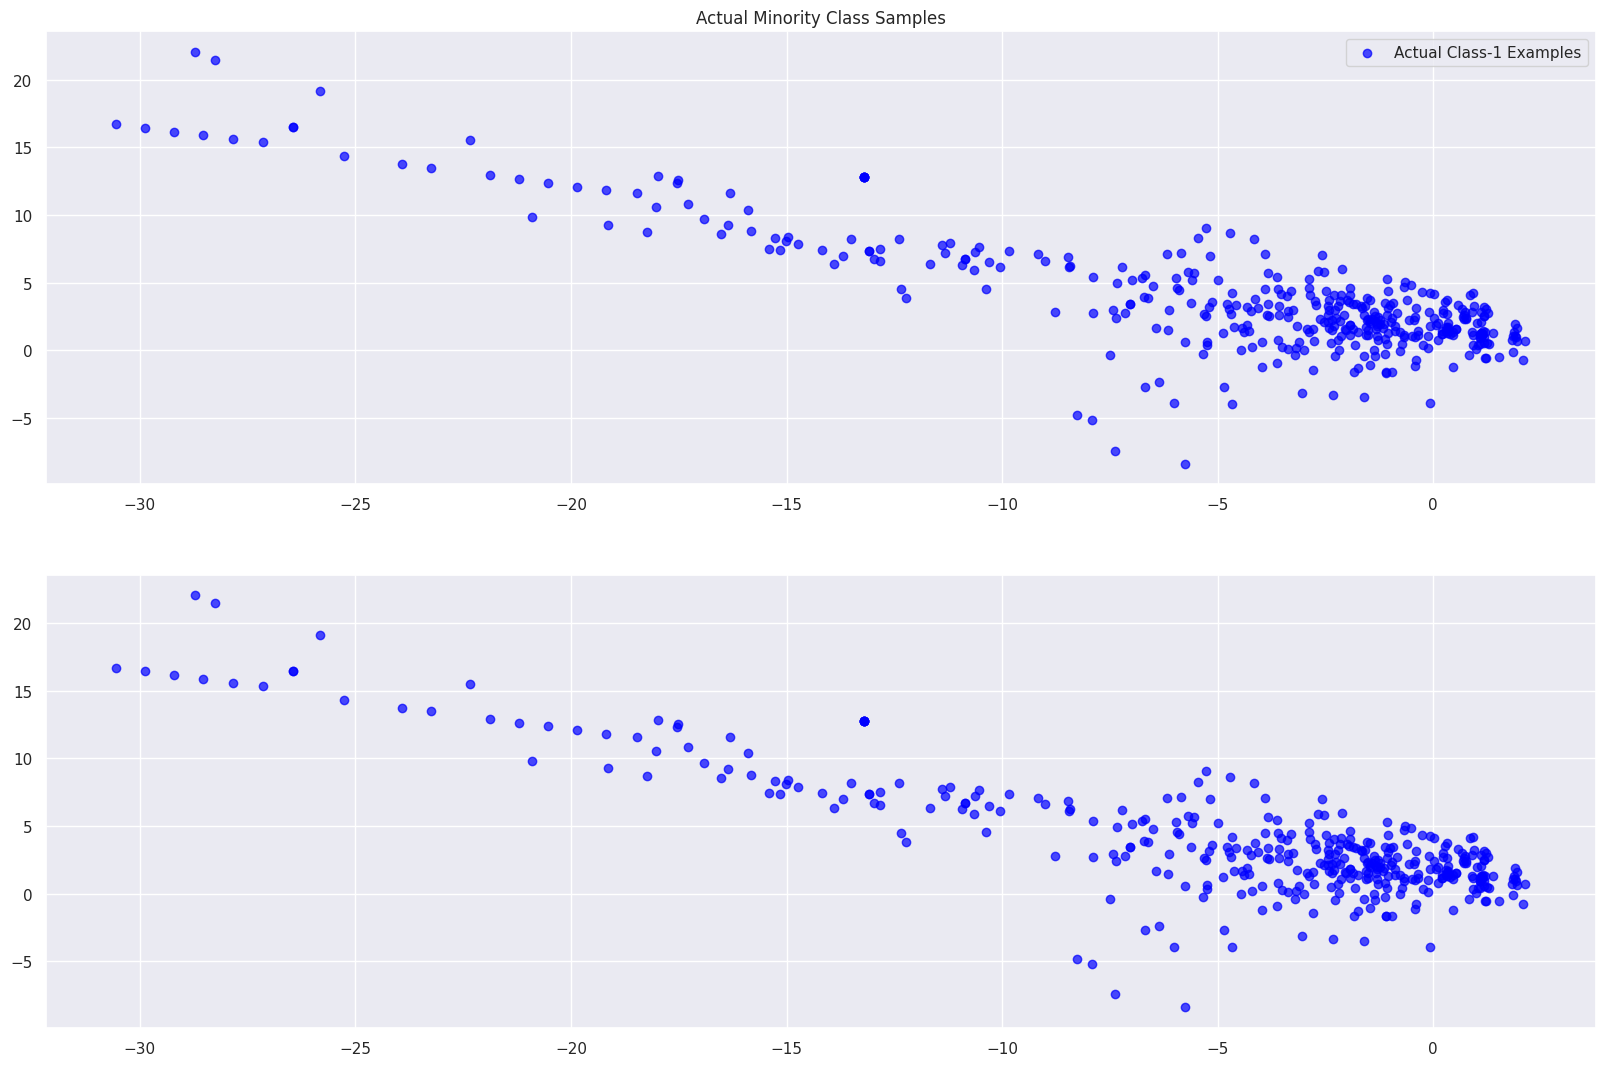

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create SMOTE object with reproducible random state
smote = SMOTE(random_state=0)

# Use updated method fit_resample() instead of deprecated fit_sample()
X_train_Smote, y_train_Smote = smote.fit_resample(X_train, y_train)

# The synthetic minority samples start from the original dataset length onward
X_train_smote_1 = X_train_Smote[len(X_train):]

# Extract actual minority and majority samples from original training set as numpy arrays
X_train_1 = X_train.to_numpy()[np.where(y_train == 1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train == 0.0)]

# Set plot size for visualization
plt.rcParams['figure.figsize'] = [20, 20]

fig = plt.figure()

# Plot 1: Actual minority class examples
plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7, color='blue')
plt.title('Actual Minority Class Samples')
plt.legend()
plt.grid(True)

# Plot 2: Actual + Artificial SMOTE minority samples (plotting equal counts for illustration)
plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7, color='blue')
plt.scatter(X_train_smote_1[:len(X_train_1), 0], X_train_smote_1[:len(X_train_1), 1],
            label='Artificial SMOTE Class-1 Samples', alpha=0.5, color='orange')
plt.title('Actual and Artificial Minority Samples (SMOTE)')
plt.legend()
plt.grid(True)

# Plot 3: Actual minority and majority examples
plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7, color='blue')
plt.scatter(X_train_0[:len(X_train_1), 0], X_train_0[:len(X_train_1), 1],
            label='Actual Class-0 Examples', alpha=0.5, color='green')
plt.title('Actual Minority vs. Majority Class Samples')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Re-create DataFrame for the SMOTE oversampled data for further use
X_train_Smote_df = pd.DataFrame(data=X_train_Smote, columns=cols)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import pandas as pd

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# To store oversampled train data per fold if needed
oversampled_data_per_fold = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use .iloc for positional indexing to ensure indexing works without issue
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    smote = SMOTE(random_state=0)
    X_train_Smote, y_train_Smote = smote.fit_resample(X_train, y_train)

    # Create DataFrame for oversampled X_train per fold
    X_train_Smote_df = pd.DataFrame(data=X_train_Smote, columns=cols)

    # Optionally save or process per fold
    oversampled_data_per_fold.append({
        'fold': fold,
        'X_train_Smote': X_train_Smote_df,
        'y_train_Smote': y_train_Smote,
        'X_test': X_test,
        'y_test': y_test
    })

    print(f"Fold {fold} processed: Oversampled training data with shape {X_train_Smote_df.shape}")


Fold 1 processed: Oversampled training data with shape (454904, 30)
Fold 2 processed: Oversampled training data with shape (454904, 30)
Fold 3 processed: Oversampled training data with shape (454904, 30)
Fold 4 processed: Oversampled training data with shape (454904, 30)
Fold 5 processed: Oversampled training data with shape (454904, 30)


Logistic Regression with L1 and L2 Regularisation
Accuracy of Logistic model with L2 regularisation: 0.9983


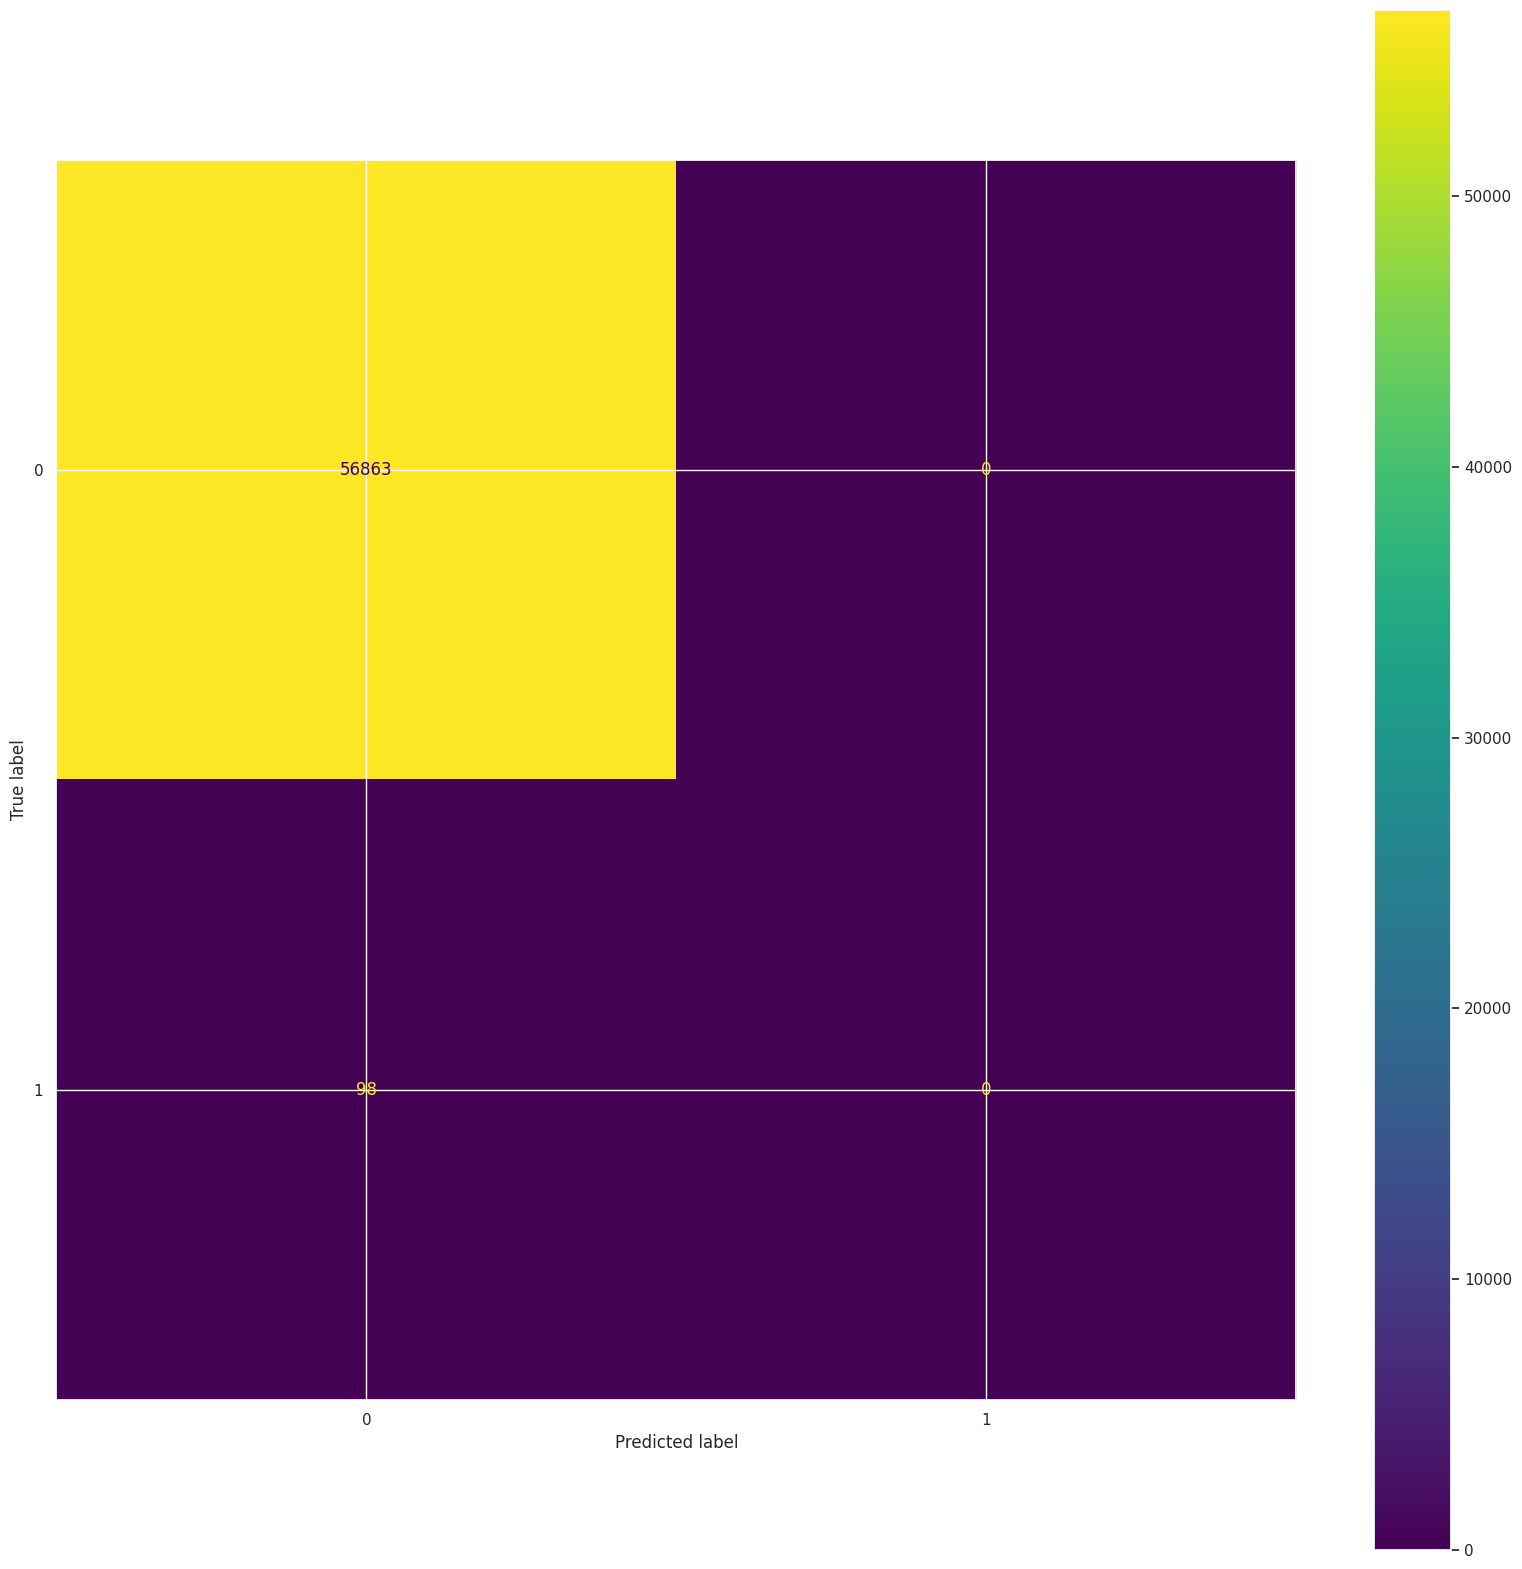

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

L2 roc_value: 0.5000
L2 threshold: inf


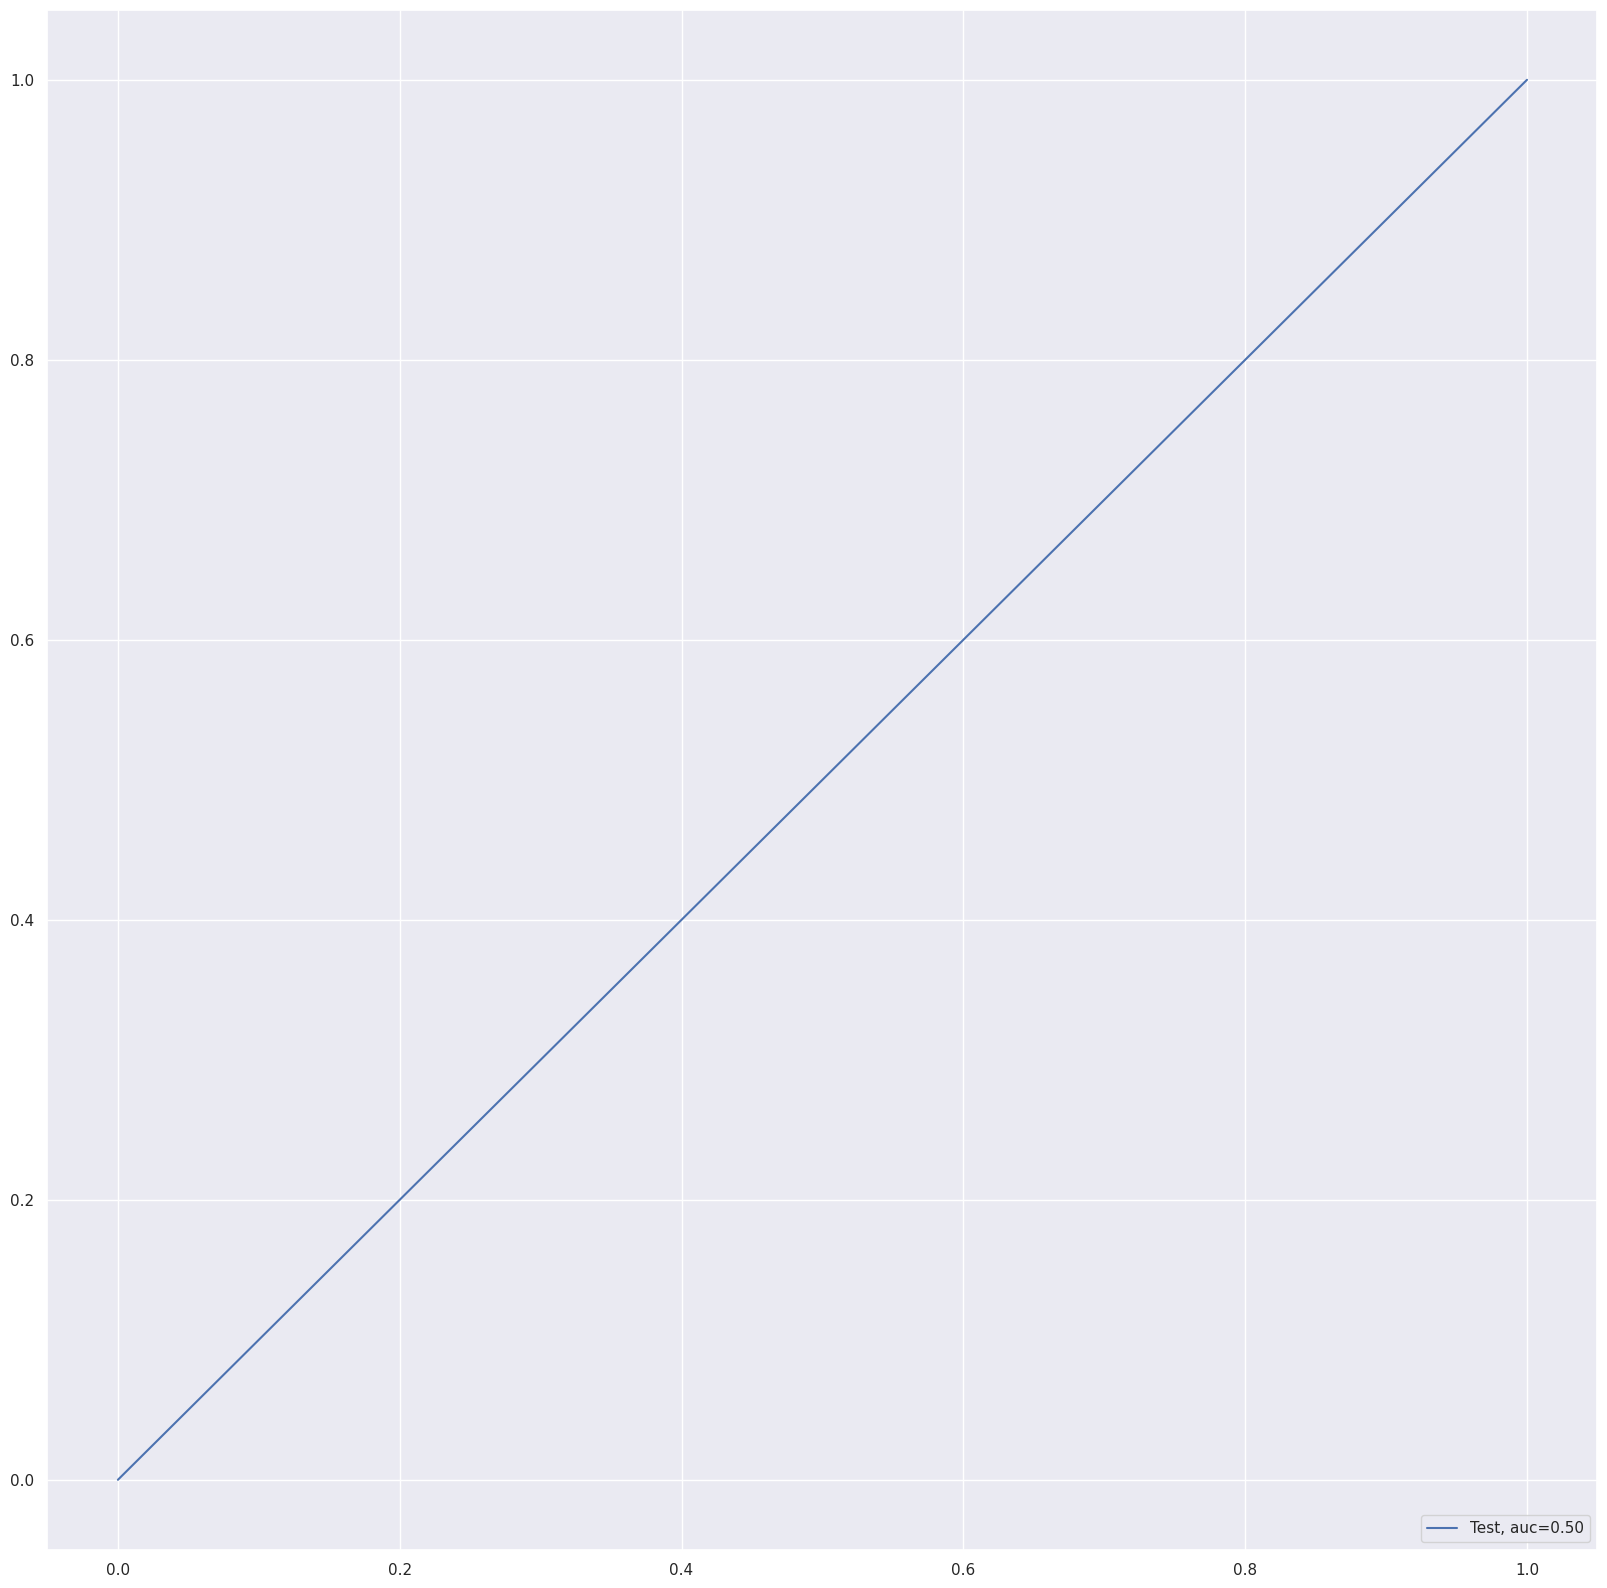

Accuracy of Logistic model with L1 regularisation: 0.9983


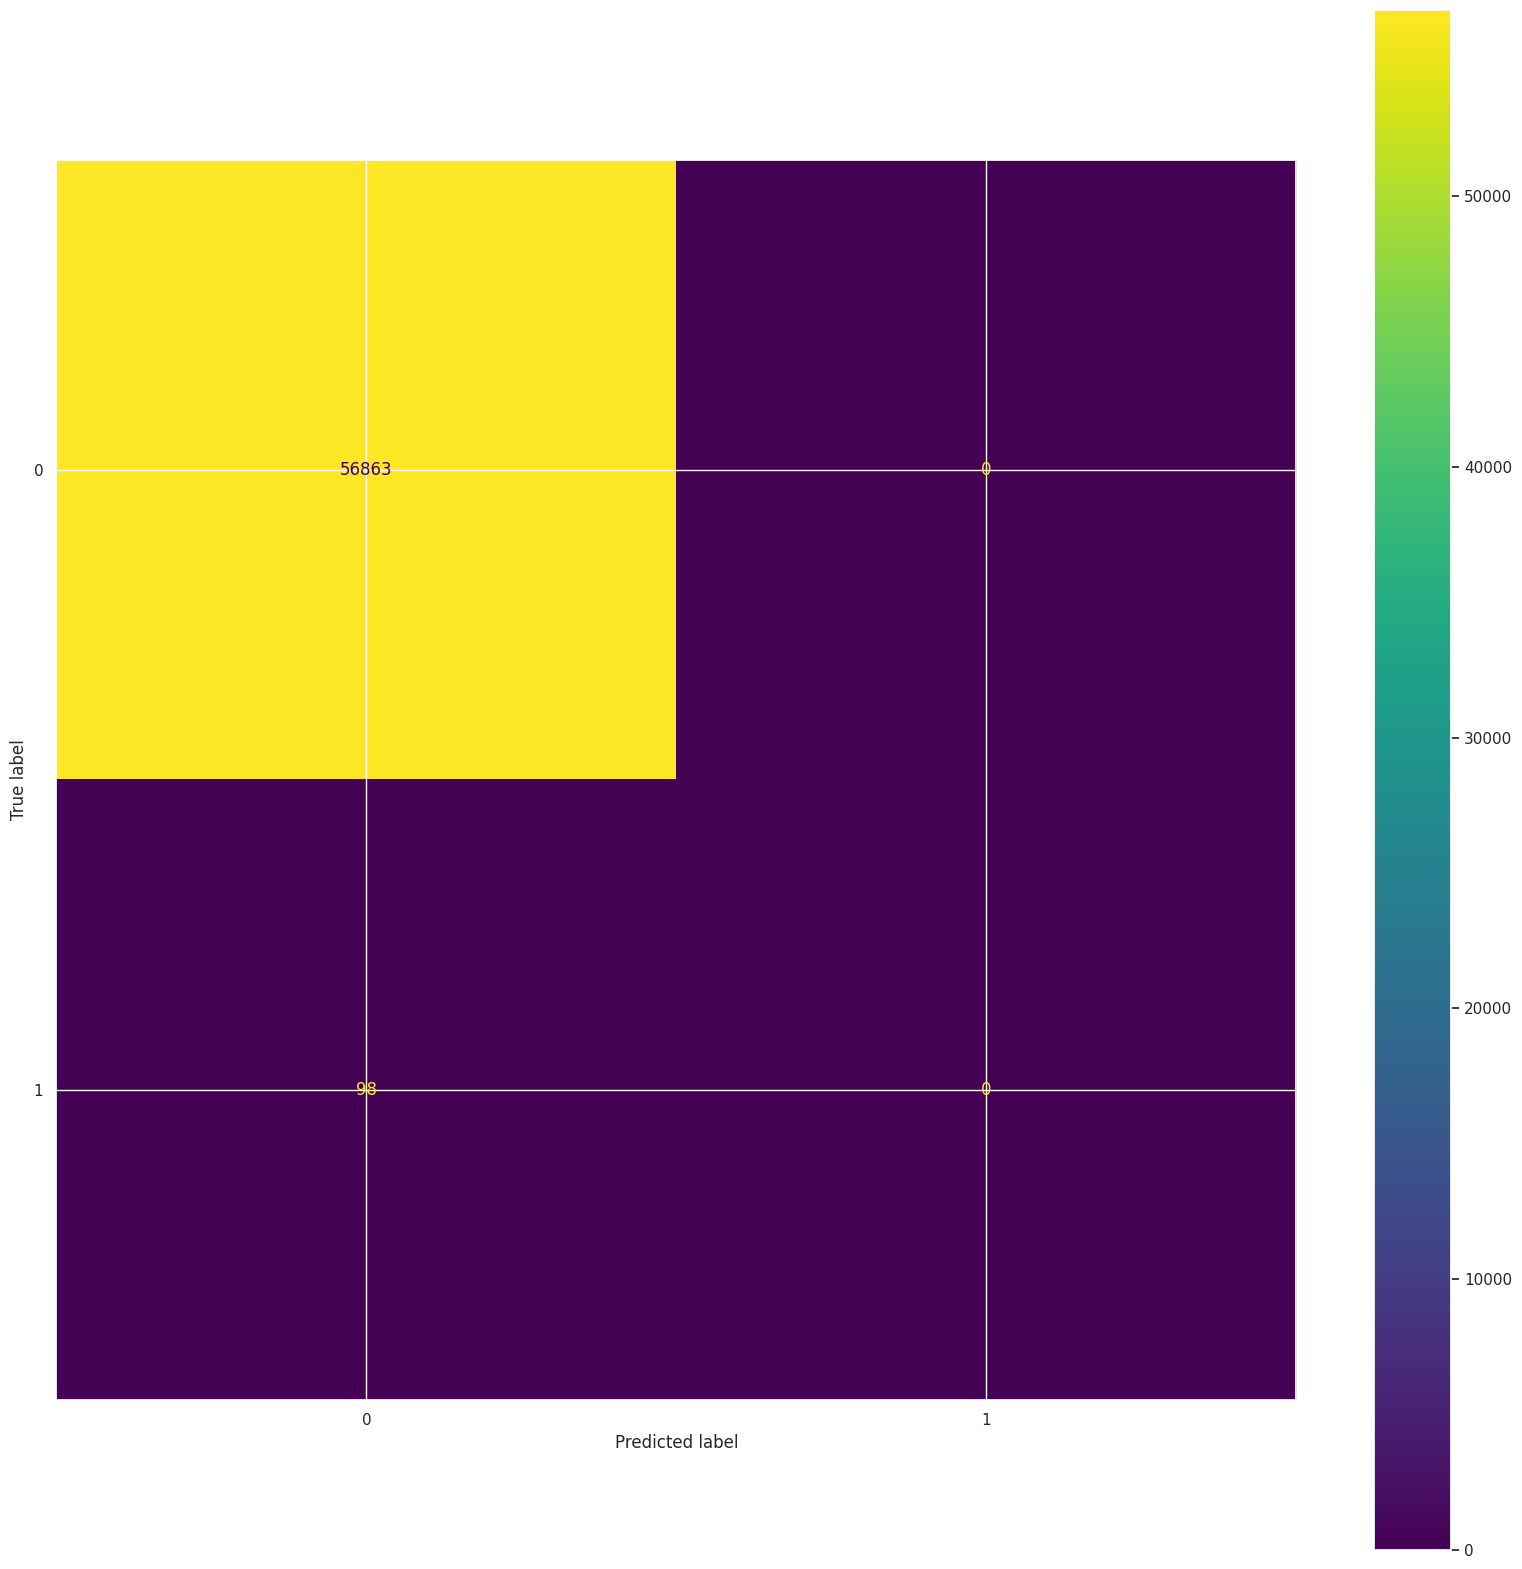

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

L1 roc_value: 0.5000
L1 threshold: inf


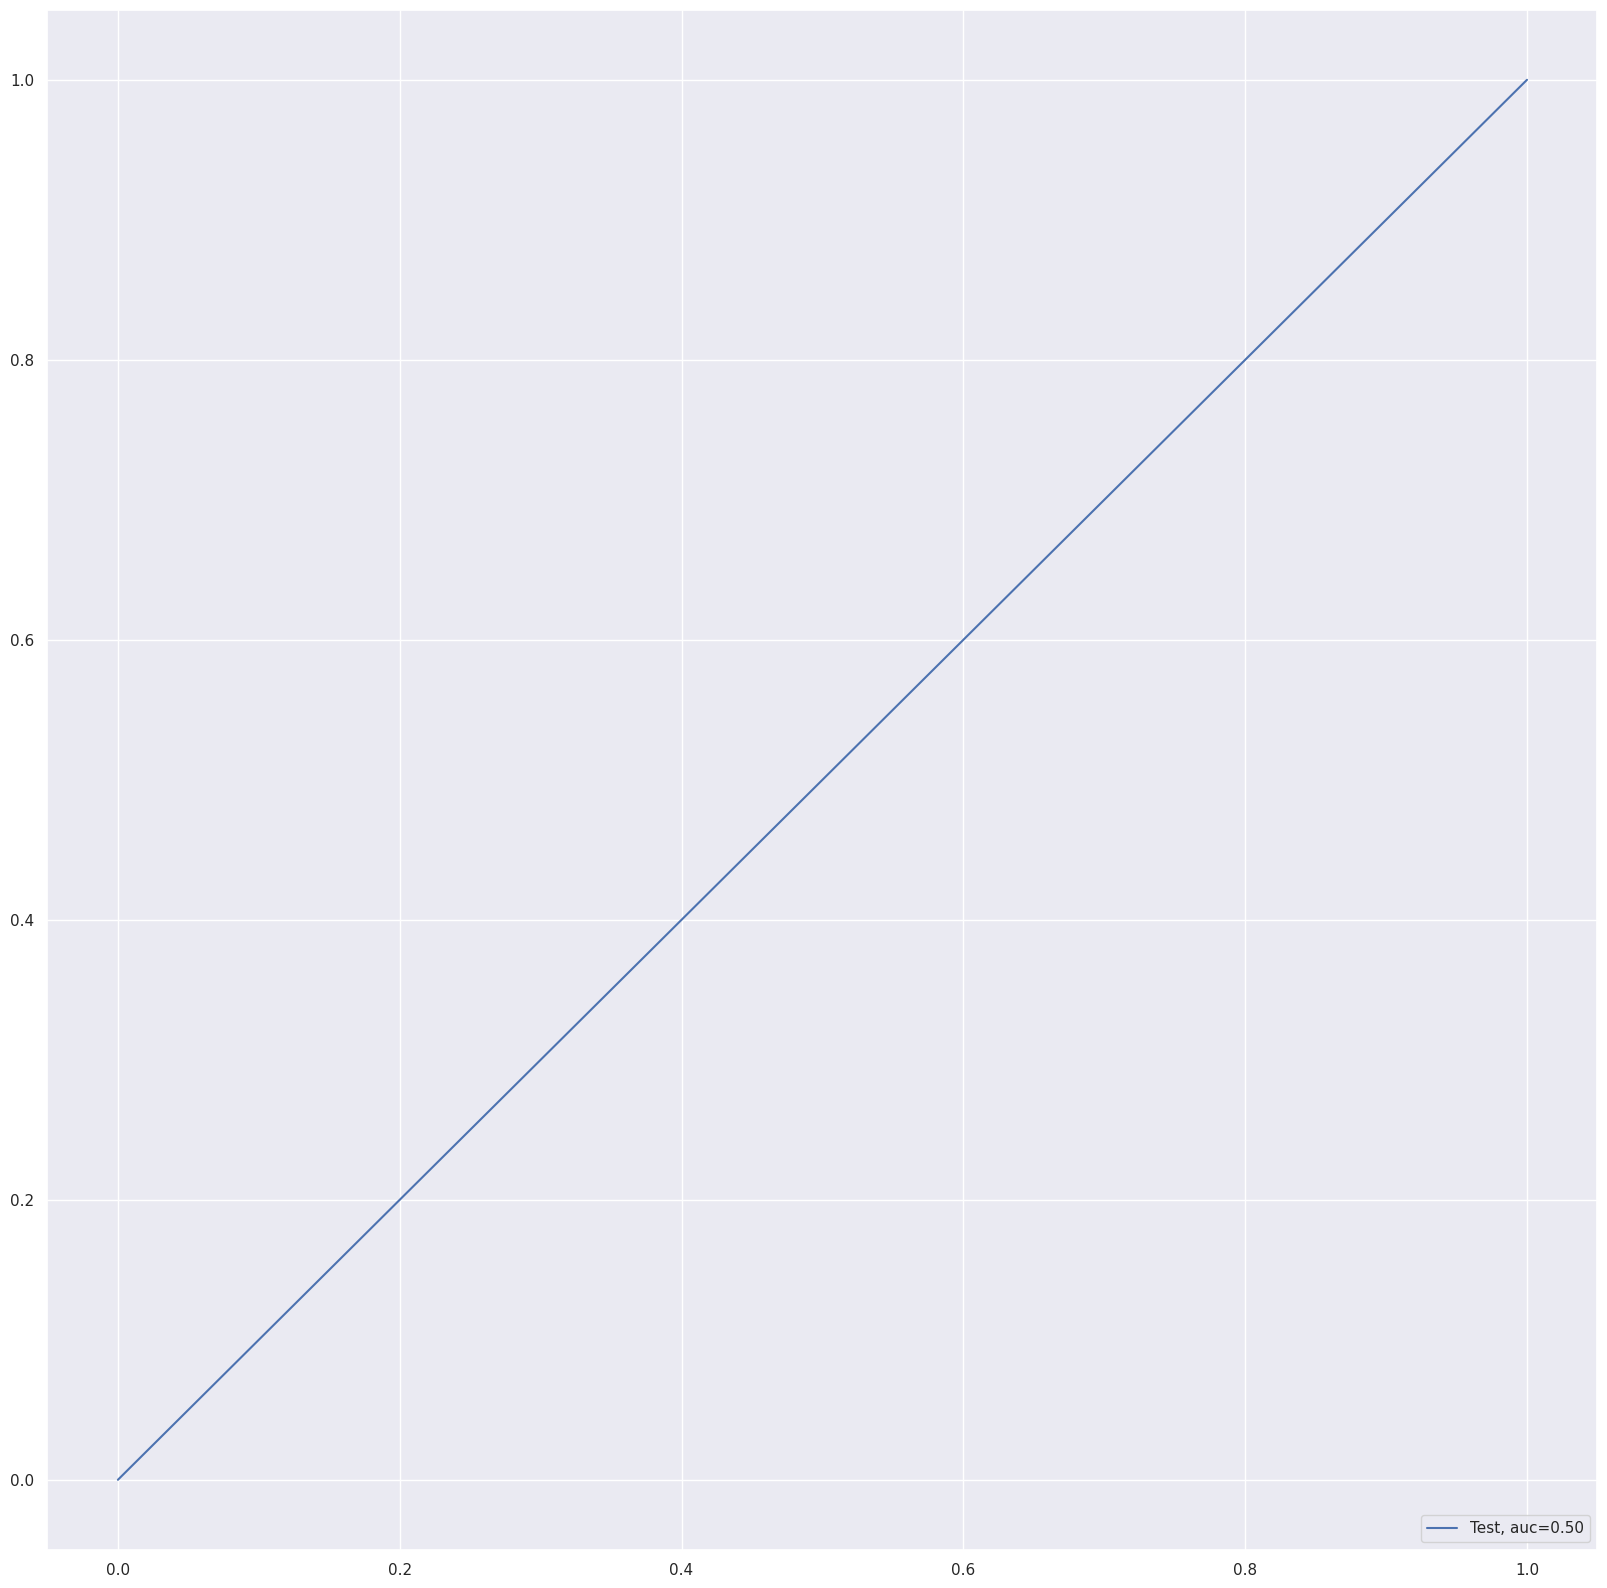

Time Taken by Logistic Regression Model: --- 156.84 seconds ---
--------------------------------------------------------------------------------
KNN Model
KNN Accuracy: 0.9960


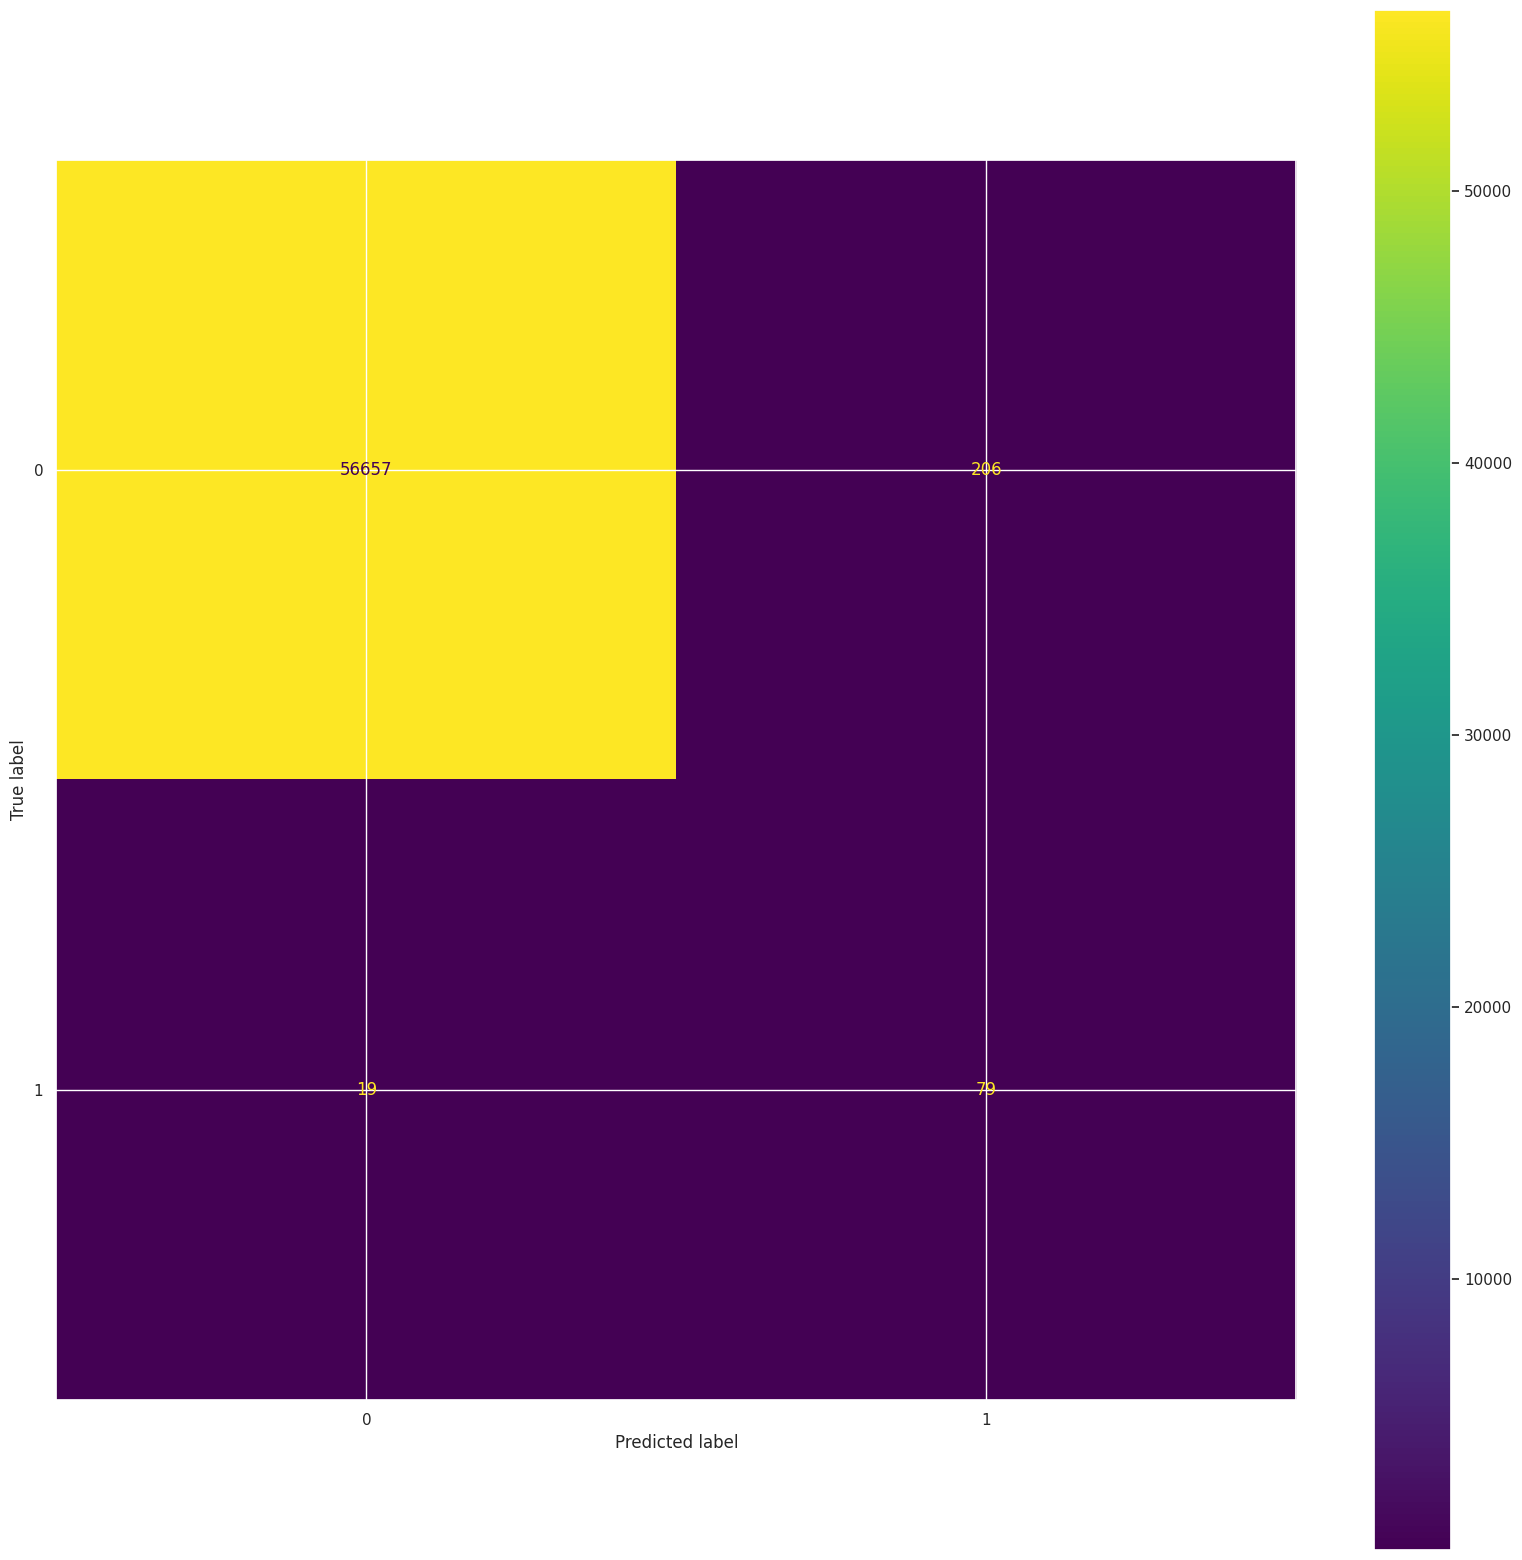

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.28      0.81      0.41        98

    accuracy                           1.00     56961
   macro avg       0.64      0.90      0.71     56961
weighted avg       1.00      1.00      1.00     56961

KNN ROC AUC: 0.9172
KNN optimal threshold: 0.2000


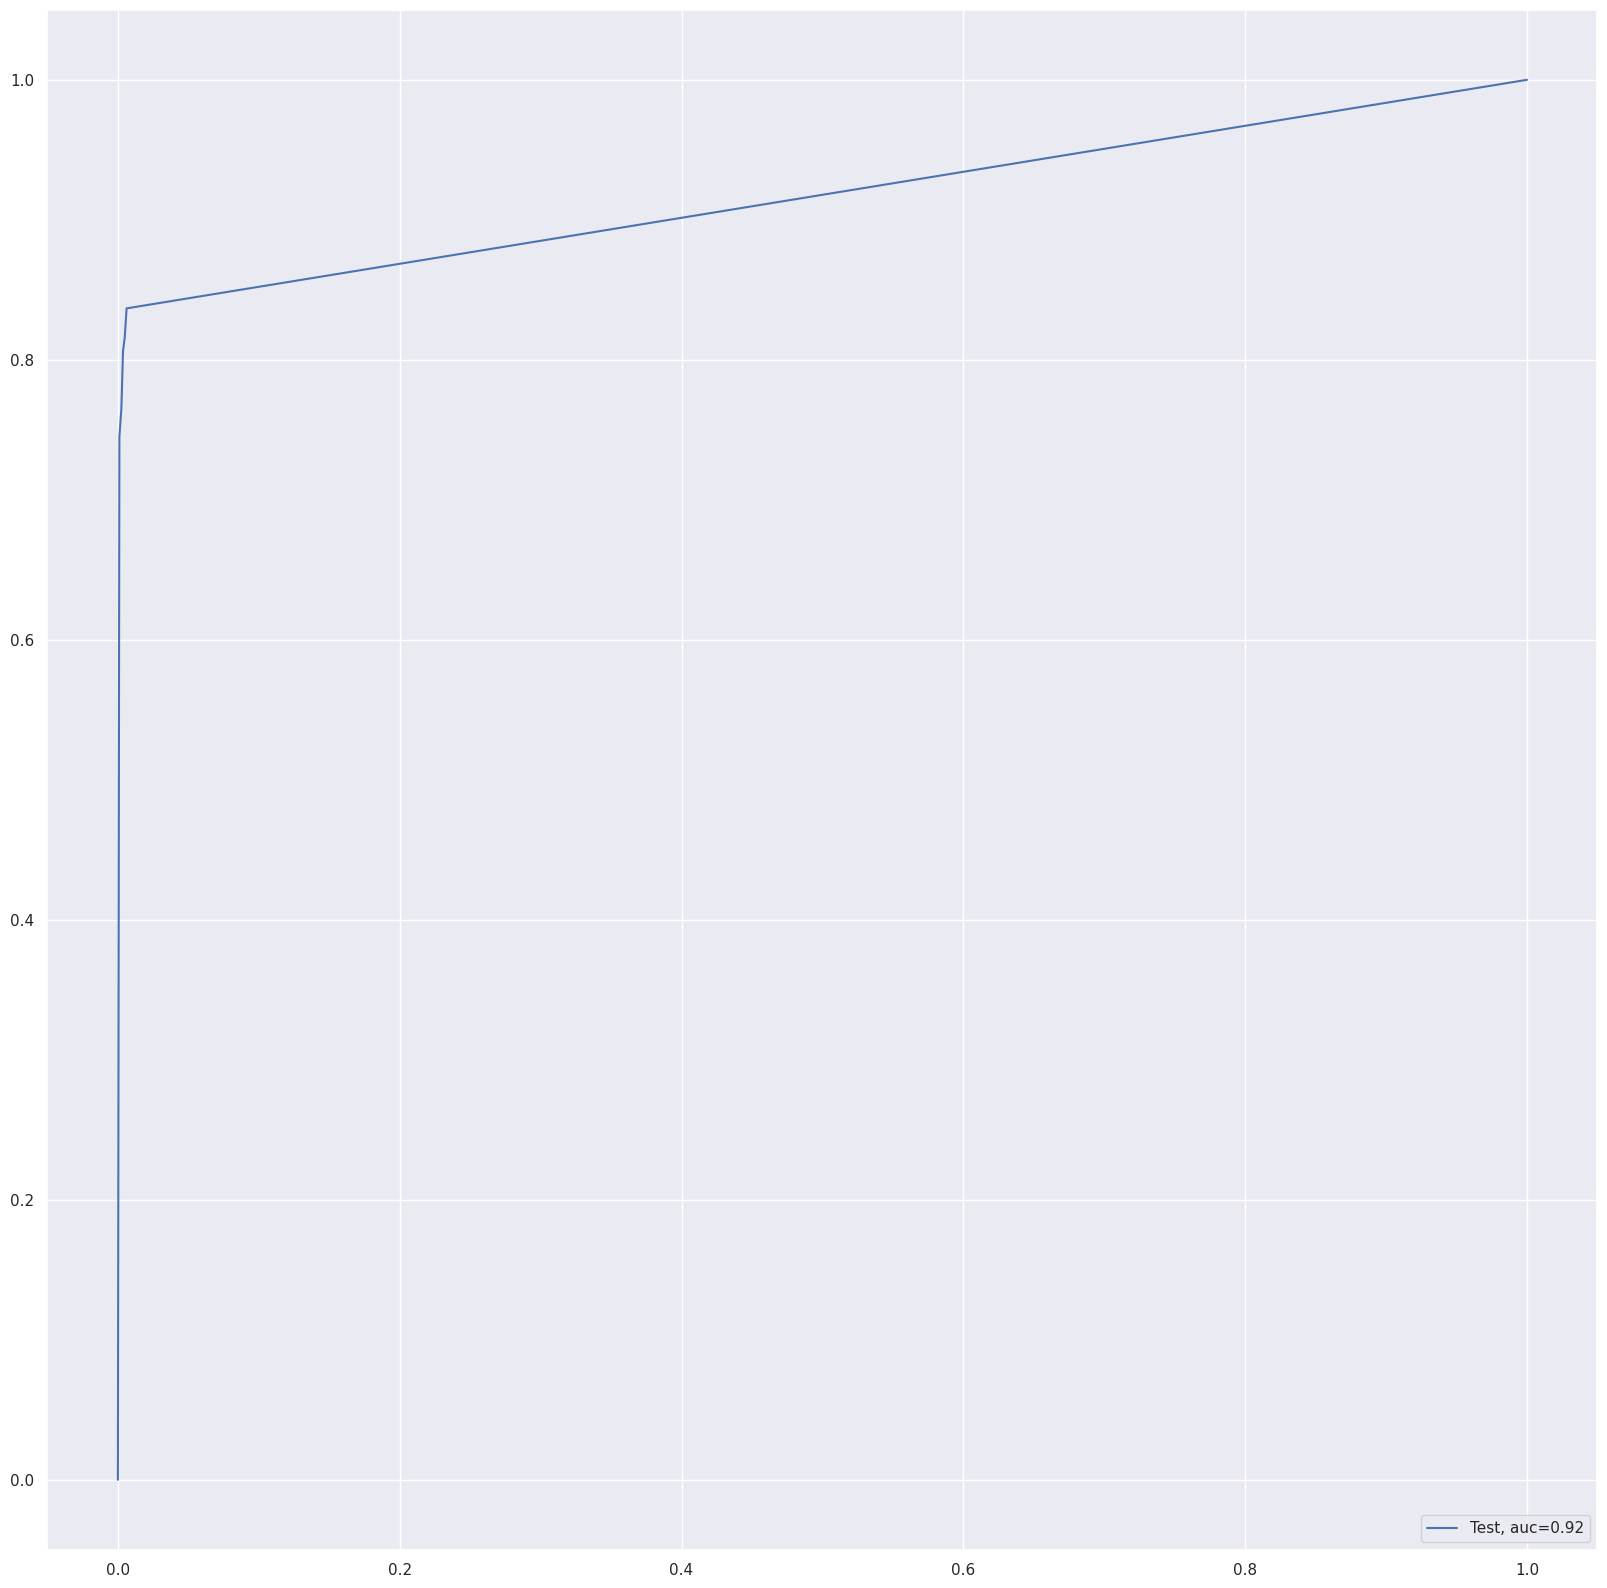

Time Taken by KNN Model: --- 427.91 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with 'gini' and 'entropy' criteria
gini score: 0.9974


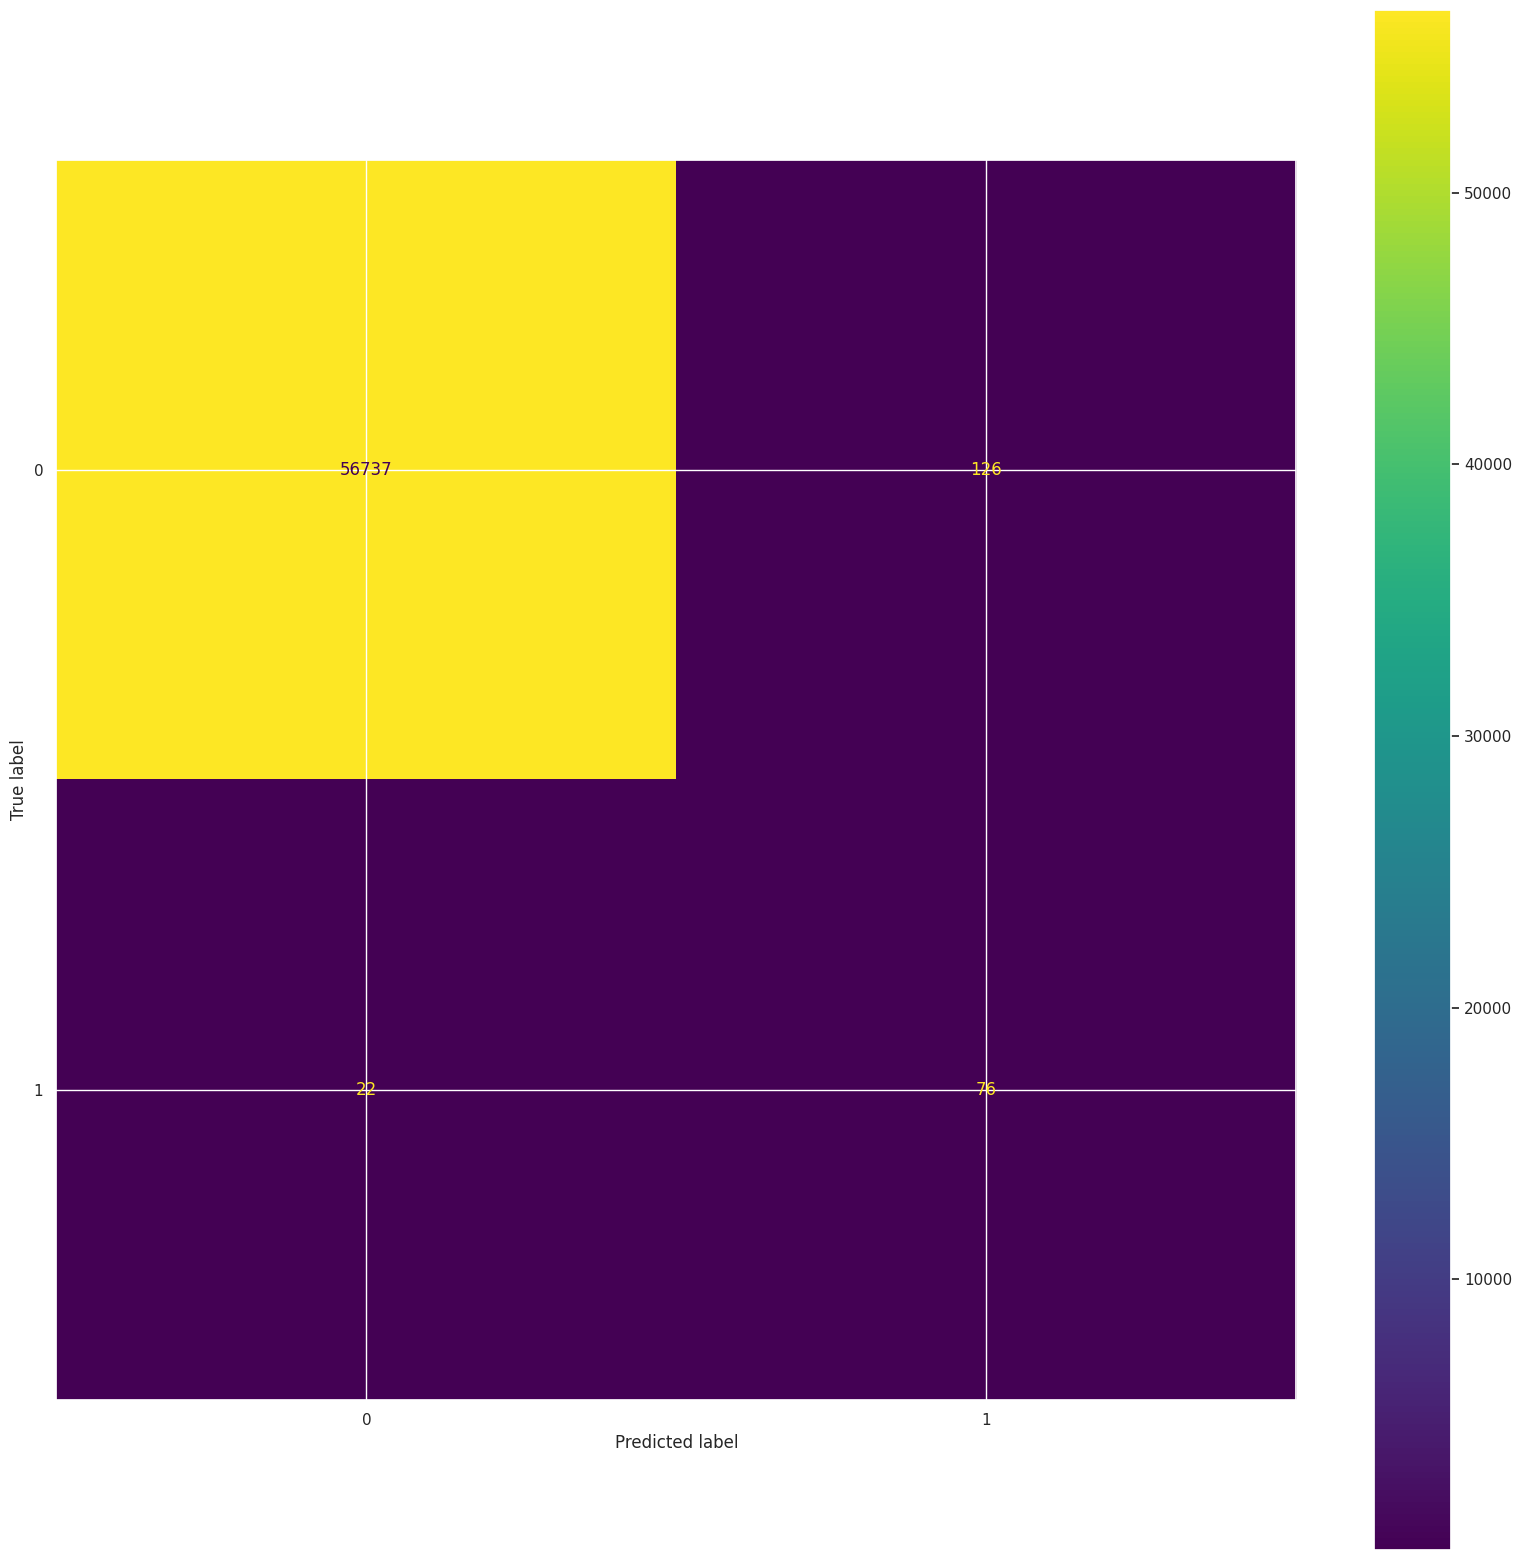

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.38      0.78      0.51        98

    accuracy                           1.00     56961
   macro avg       0.69      0.89      0.75     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8866
Tree threshold: 1.0000
ROC for the test dataset 88.7%


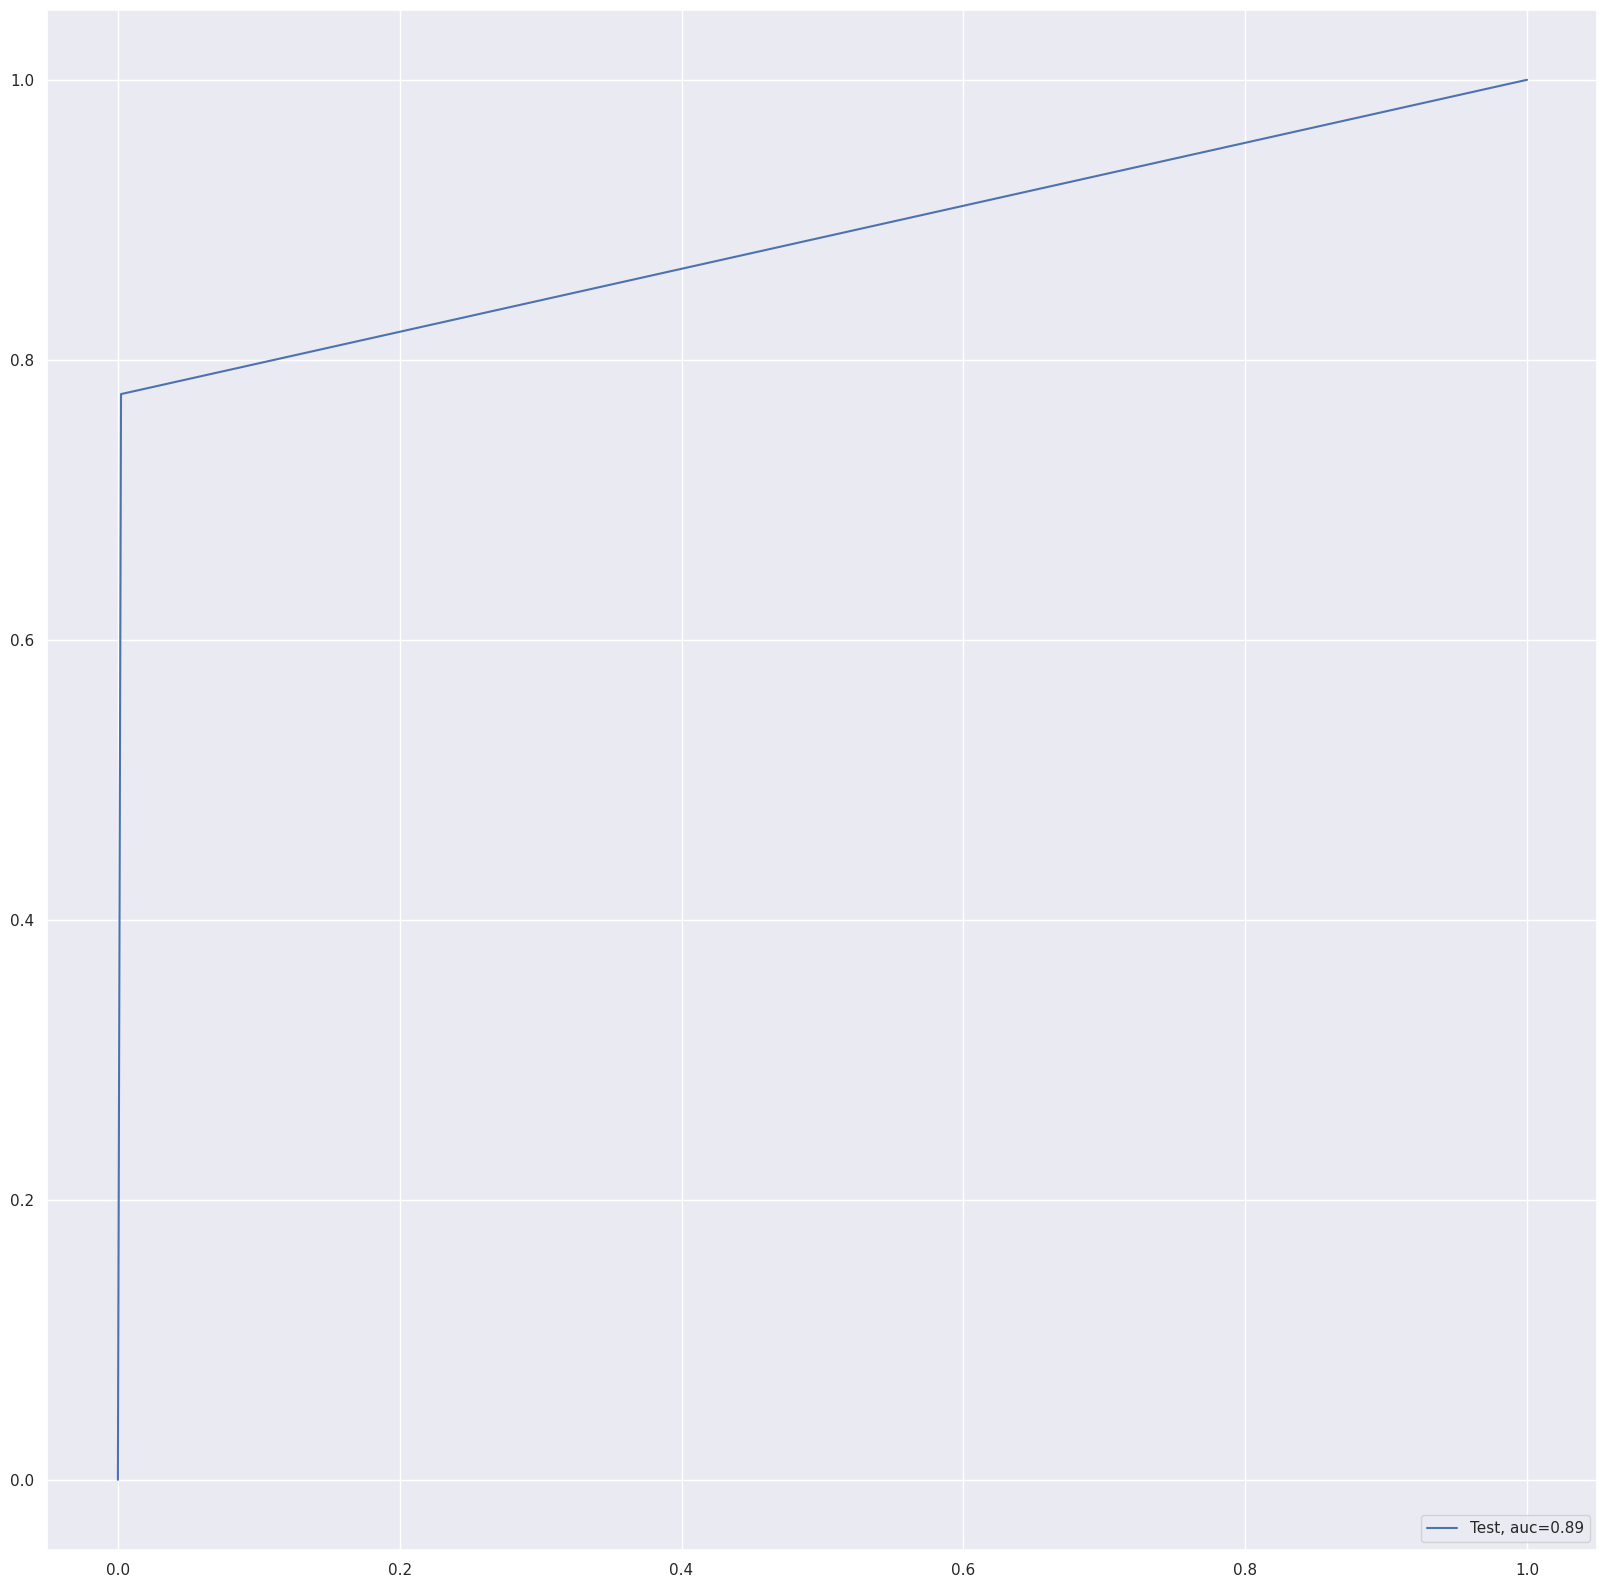

entropy score: 0.9978


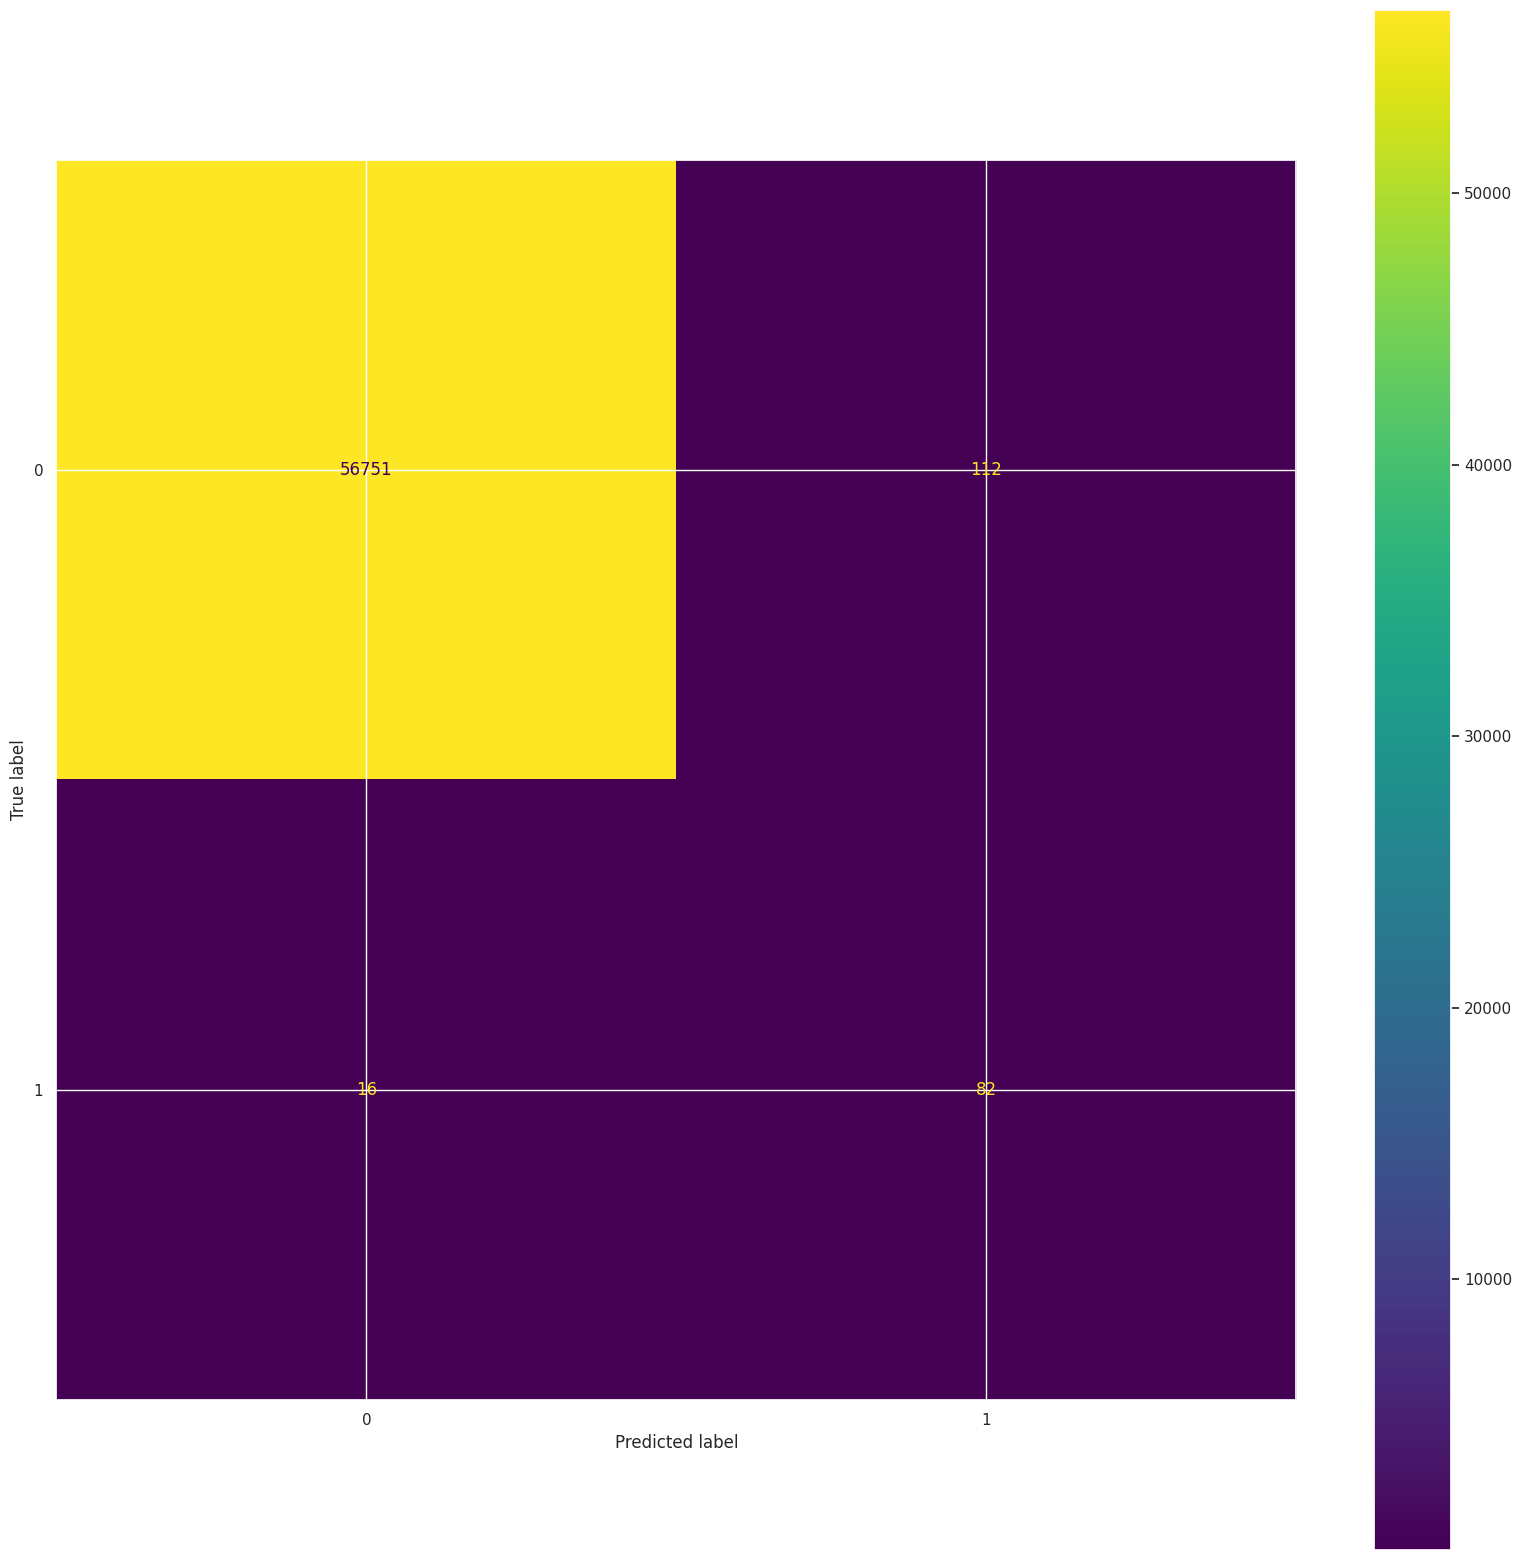

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.42      0.84      0.56        98

    accuracy                           1.00     56961
   macro avg       0.71      0.92      0.78     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.9174
Tree threshold: 1.0000
ROC for the test dataset 91.7%


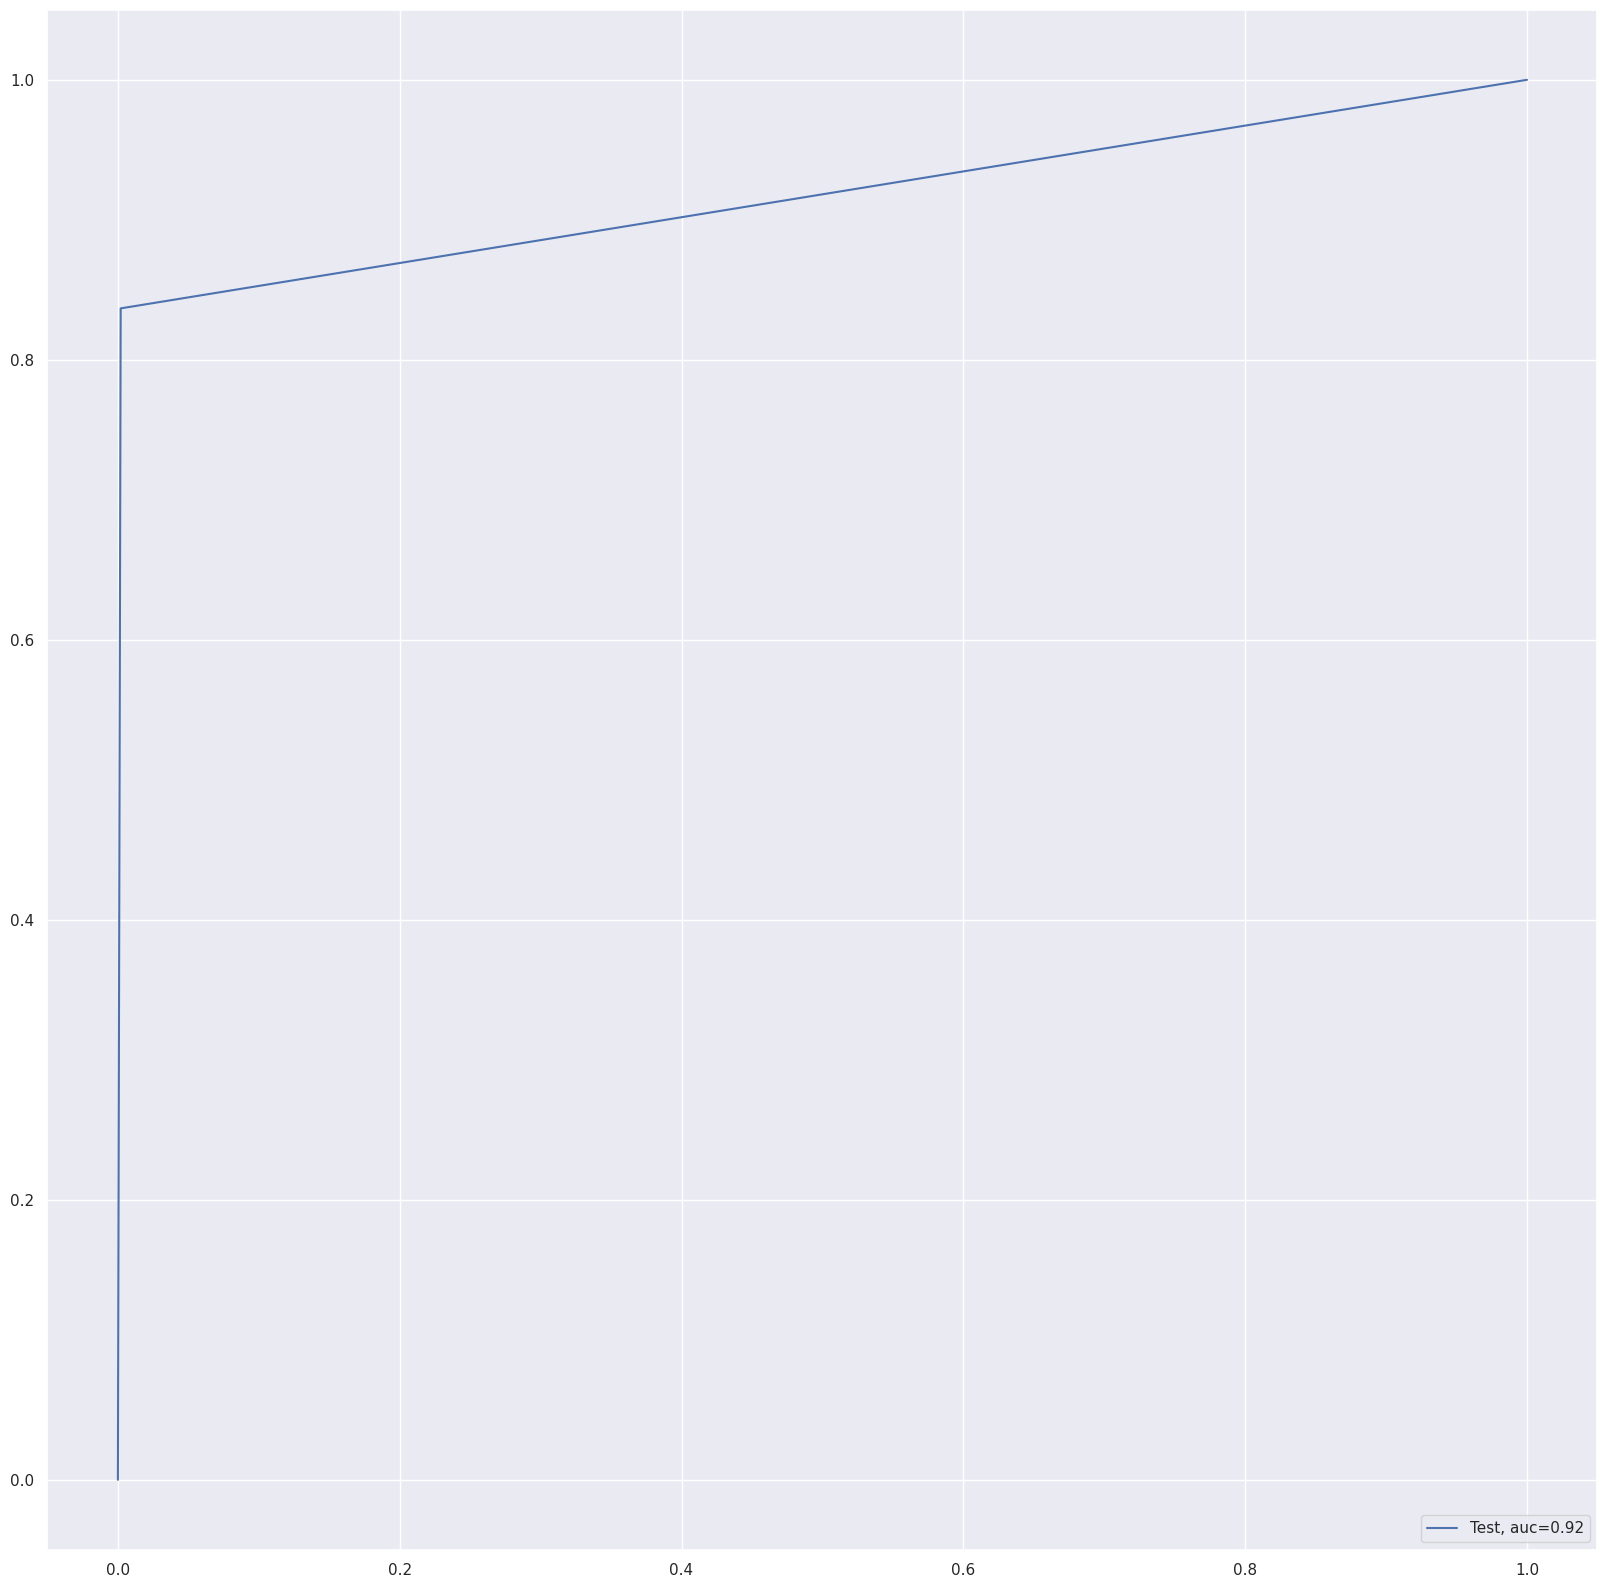

Time Taken by Decision Tree Models: --- 106.61 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995


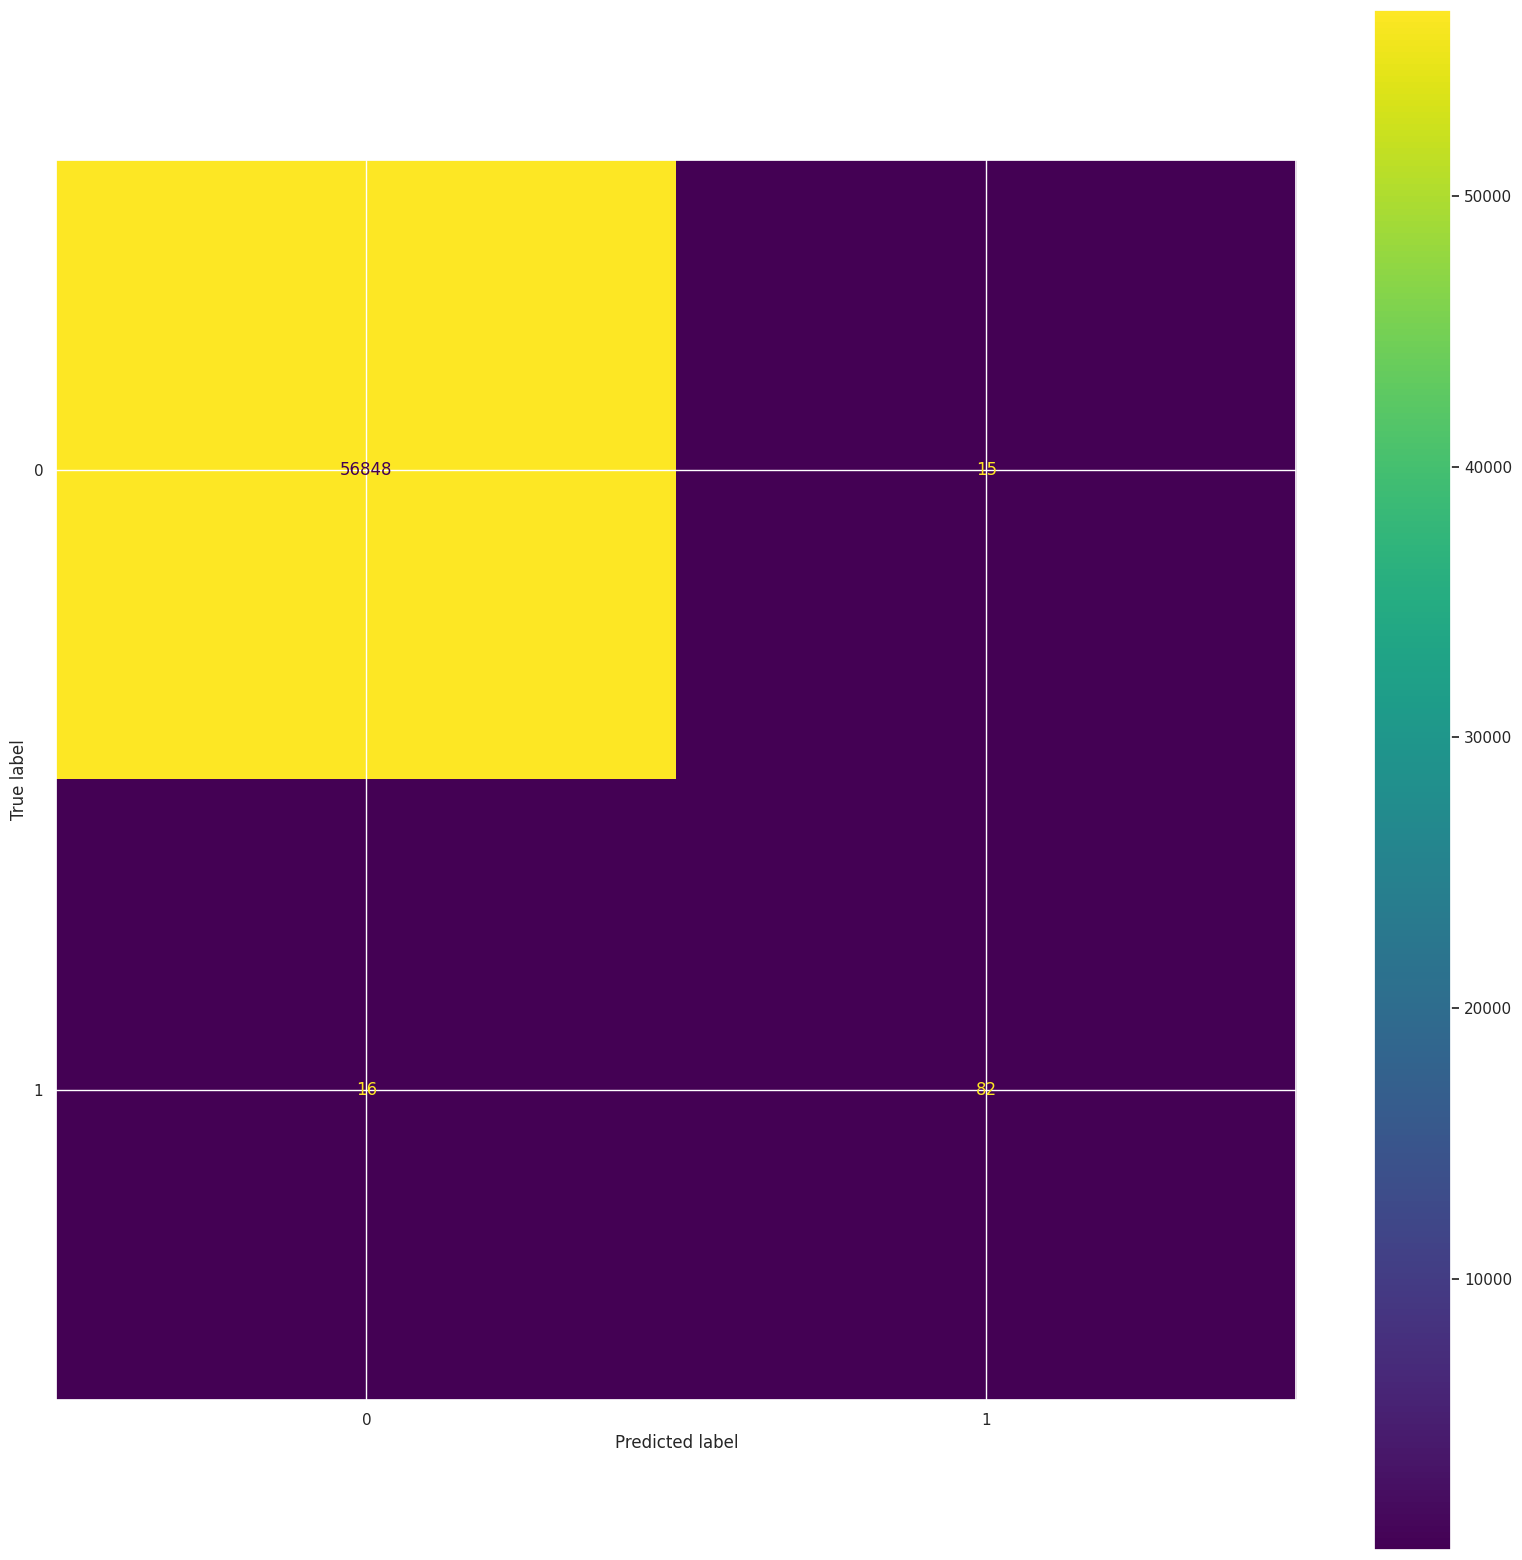

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56961
   macro avg       0.92      0.92      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9724
Random Forest threshold: 0.0800
ROC for the test dataset 97.2%


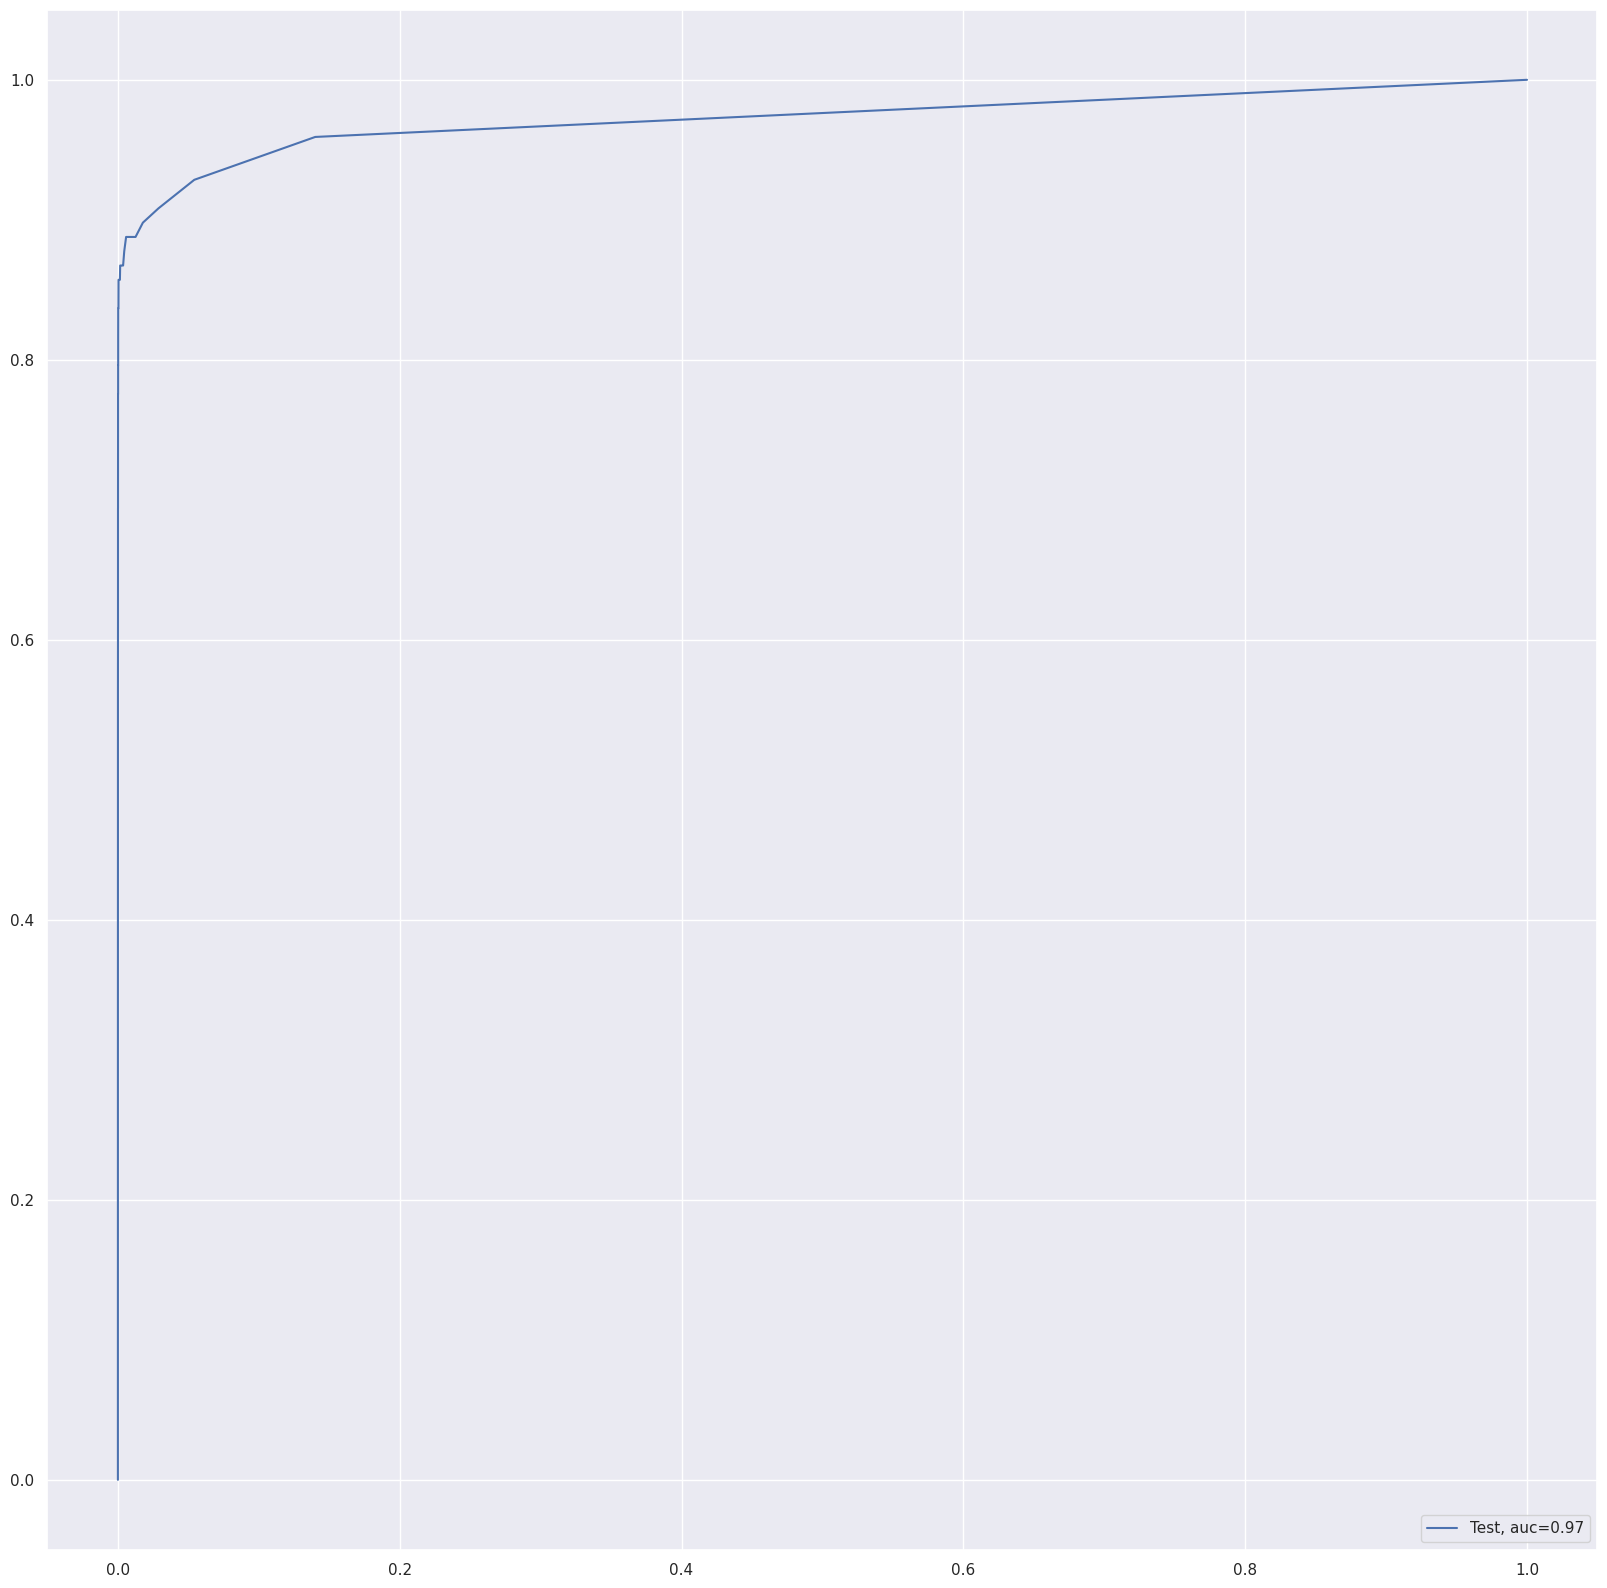

Time Taken by Random Forest Model: --- 618.91 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993


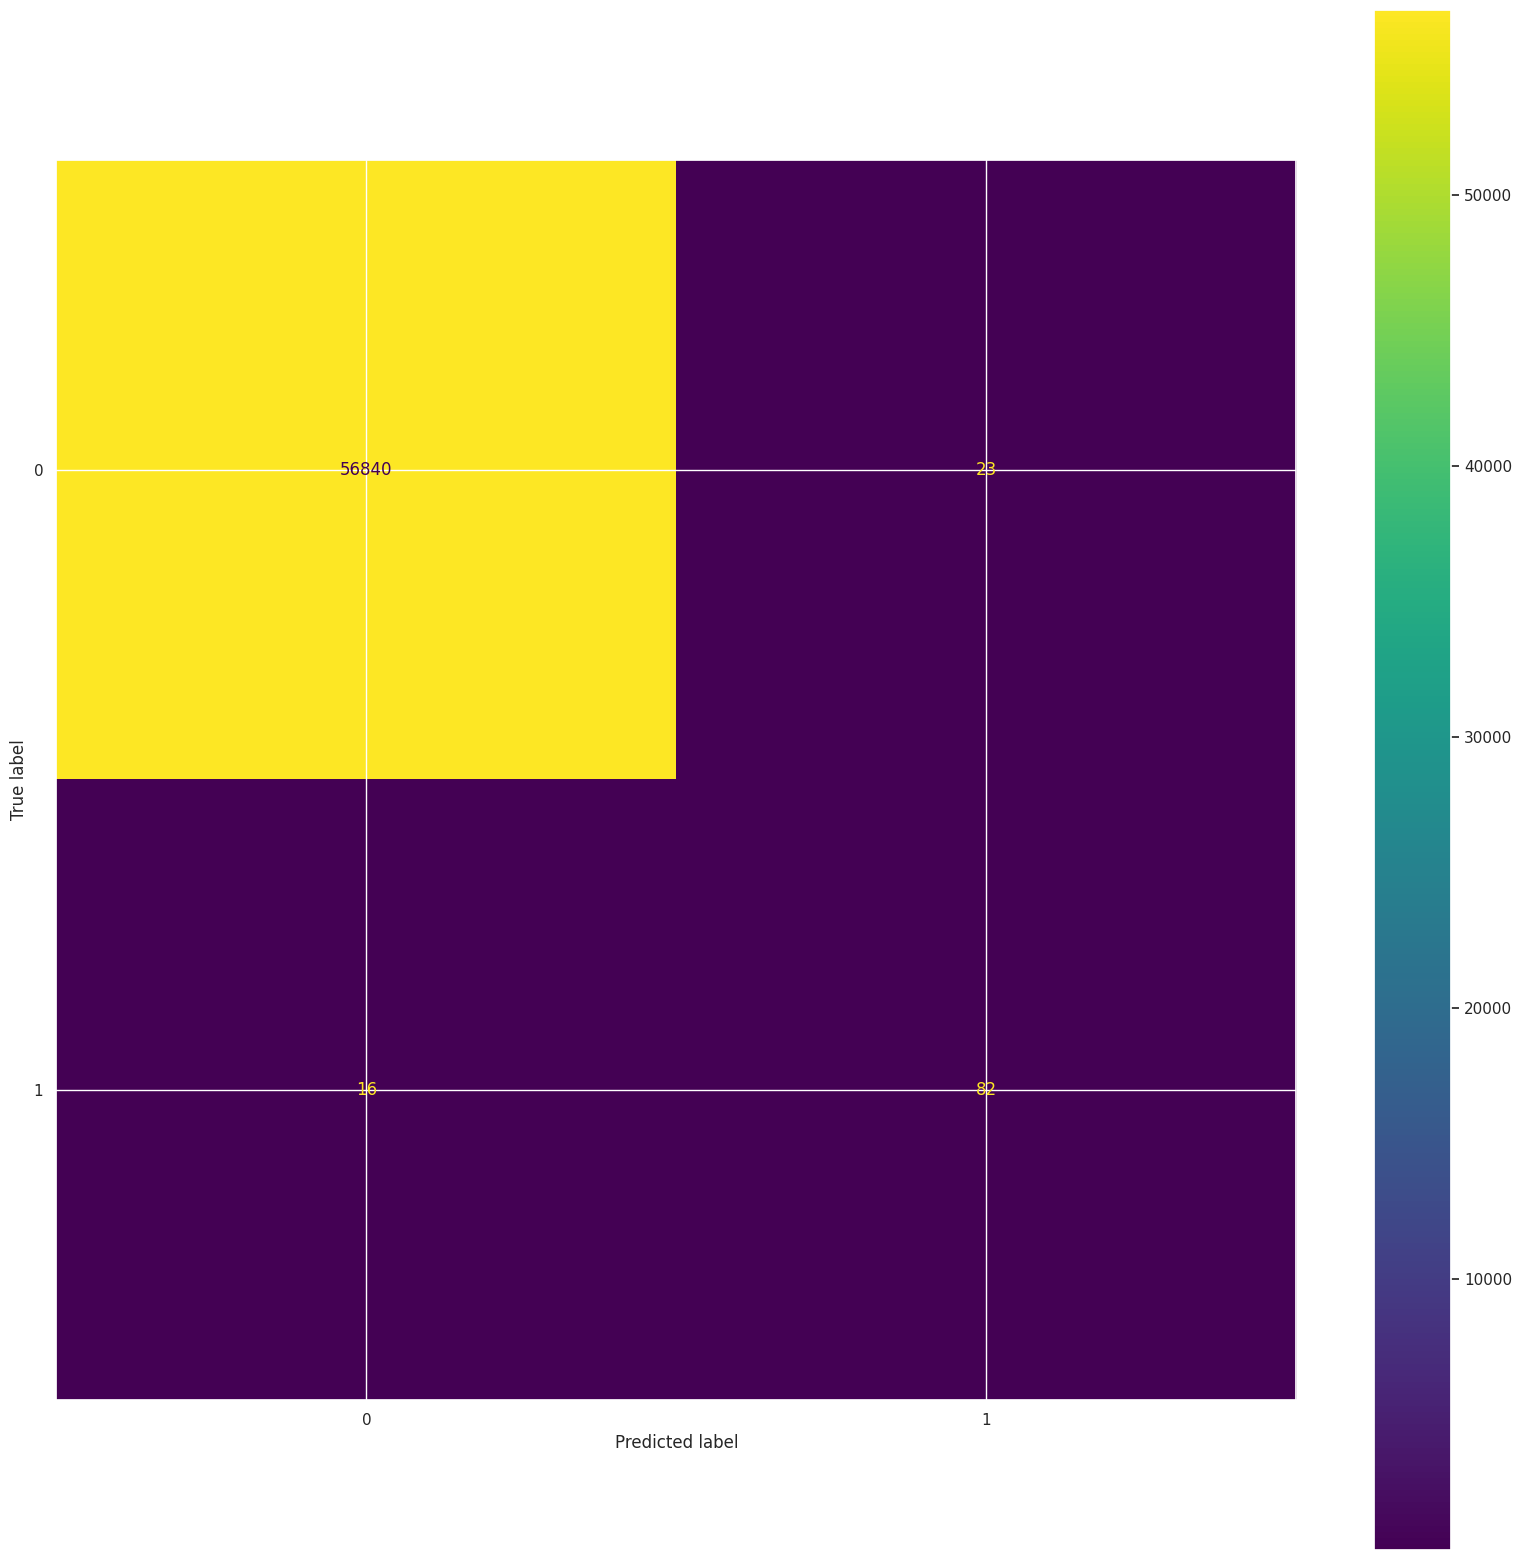

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.78      0.84      0.81        98

    accuracy                           1.00     56961
   macro avg       0.89      0.92      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9804
XGBoost threshold: 0.0002
ROC for the test dataset 98.0%


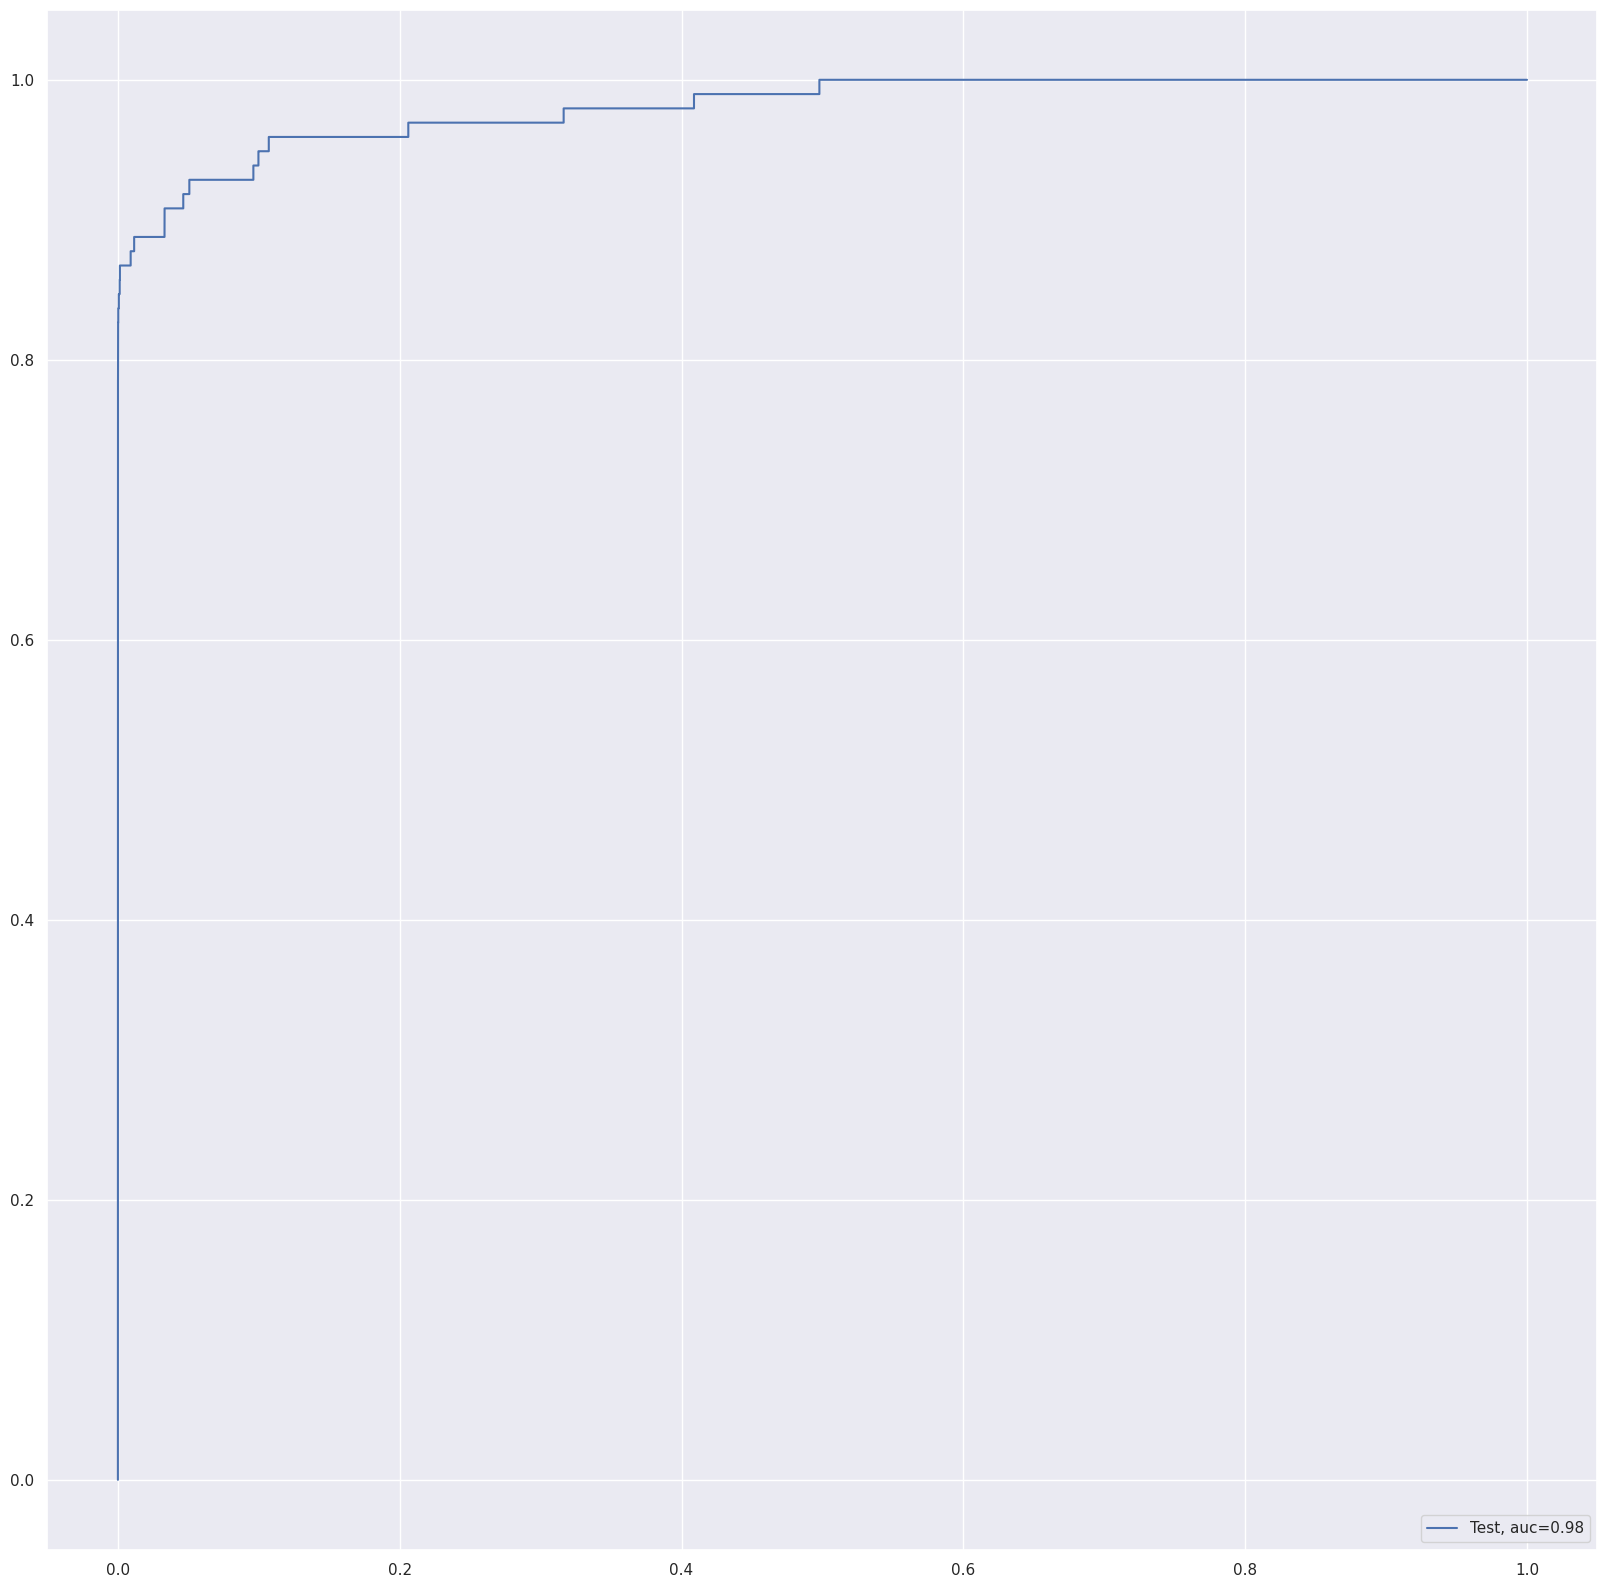

Time Taken by XGBoost Model: --- 10.03 seconds ---
--------------------------------------------------------------------------------


In [ ]:
import time

Data_Imbalance_Handling = "SMOTE Oversampling with StratifiedKFold CV"

# Run Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print(f"Time Taken by Logistic Regression Model: --- {time.time() - start_time:.2f} seconds ---")
print('-' * 80)

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print(f"Time Taken by KNN Model: --- {time.time() - start_time:.2f} seconds ---")
print('-' * 80)

# Run Decision Tree Models with 'gini' and 'entropy' criteria
print("Decision Tree Models with 'gini' and 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print(f"Time Taken by Decision Tree Models: --- {time.time() - start_time:.2f} seconds ---")
print('-' * 80)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print(f"Time Taken by Random Forest Model: --- {time.time() - start_time:.2f} seconds ---")
print('-' * 80)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print(f"Time Taken by XGBoost Model: --- {time.time() - start_time:.2f} seconds ---")
print('-' * 80)

# SVM Model with Sigmoid Kernel is commented out due to performance reasons
# print("SVM Model with Sigmoid Kernel")
# start_time = time.time()
# df_Results = buildAndRunSVMModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
# print(f"Time Taken by SVM Model: --- {time.time() - start_time:.2f} seconds ---")
# print('-' * 80)


##### Build models on other algorithms to see the better performing on SMOTE

In [ ]:
df_Results

Data_Imbalance_Handiling  \
0                RepeatedKFold Cross Validation   
1                RepeatedKFold Cross Validation   
2                RepeatedKFold Cross Validation   
3                RepeatedKFold Cross Validation   
4                RepeatedKFold Cross Validation   
5                RepeatedKFold Cross Validation   
6                RepeatedKFold Cross Validation   
7                RepeatedKFold Cross Validation   
8              StratifiedKFold Cross Validation   
9              StratifiedKFold Cross Validation   
10             StratifiedKFold Cross Validation   
11             StratifiedKFold Cross Validation   
12             StratifiedKFold Cross Validation   
13                         Random Undersampling   
14                         Random Undersampling   
15                         Random Undersampling   
16                         Random Undersampling   
17                         Random Undersampling   
18                         Random Undersampling   
19                         Random Undersampling   
20                         Random Undersampling   
21  Random Oversampling with StratifiedKFold CV   
22  Random Oversampling with StratifiedKFold CV   
23  Random Oversampling with StratifiedKFold CV   
24  Random Oversampling with StratifiedKFold CV   
25  Random Oversampling with StratifiedKFold CV   
26  Random Oversampling with StratifiedKFold CV   
27  Random Oversampling with StratifiedKFold CV   
28   SMOTE Oversampling with StratifiedKFold CV   
29   SMOTE Oversampling with StratifiedKFold CV   
30   SMOTE Oversampling with StratifiedKFold CV   
31   SMOTE Oversampling with StratifiedKFold CV   
32   SMOTE Oversampling with StratifiedKFold CV   
33   SMOTE Oversampling with StratifiedKFold CV   
34   SMOTE Oversampling with StratifiedKFold CV   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998473   0.541106   0.499288  
1   Logistic Regression with L1 Regularisation  0.999087   0.855867   0.053377  
2                Tree Model with gini criteria  0.999140   0.873326   1.000000  
3             Tree Model with entropy criteria  0.999315   0.861937   1.000000  
4                                          KNN  0.999368   0.873381   0.200000  
5                                      XGBoost  0.999649   0.944161   0.000048  
6                                Random Forest  0.999561   0.934876   0.010000  
7                                          SVM  0.998508   0.504413   0.001875  
8                Tree Model with gini criteria  0.998841   0.826249   1.000000  
9             Tree Model with entropy criteria  0.999017   0.821244   1.000000  
10  Logistic Regression with L2 Regularisation  0.998280   0.611162   0.499392  
11  Logistic Regression with L1 Regularisation  0.998754   0.889076   0.021087  
12                                         KNN  0.999192   0.805746   0.200000  
13  Logistic Regression with L2 Regularisation  0.998174   0.651199   0.499176  
14  Logistic Regression with L1 Regularisation  0.998315   0.500000        inf  
15                                         KNN  0.974667   0.941324   0.400000  
16               Tree Model with gini criteria  0.937695   0.890802   1.000000  
17            Tree Model with entropy criteria  0.944437   0.899378   1.000000  
18                               Random Forest  0.993557   0.974739   0.330000  
19                                     XGBoost  0.984850   0.978352   0.070525  
20                                         SVM  0.753432   0.685449   0.347097  
21  Logistic Regression with L2 Regularisation  0.998280   0.500000        inf  
22  Logistic Regression with L1 Regularisation  0.998280   0.500000        inf  
23                                         KNN  0.998964   0.877341   0.200000  
24               Tree Model with gini criteria  0.999140   0.872238   1.000000  
25            Tree Model with entropy criteria  0.999157   0.882433   1.000000  

## Results for SMOTE Oversampling:

Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

# Oversampling with ADASYN Oversampling

**We will use ADASYN Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the ADASYN Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the oversampling techinique


InvalidIndexError: (slice(None, 394, None), 0)

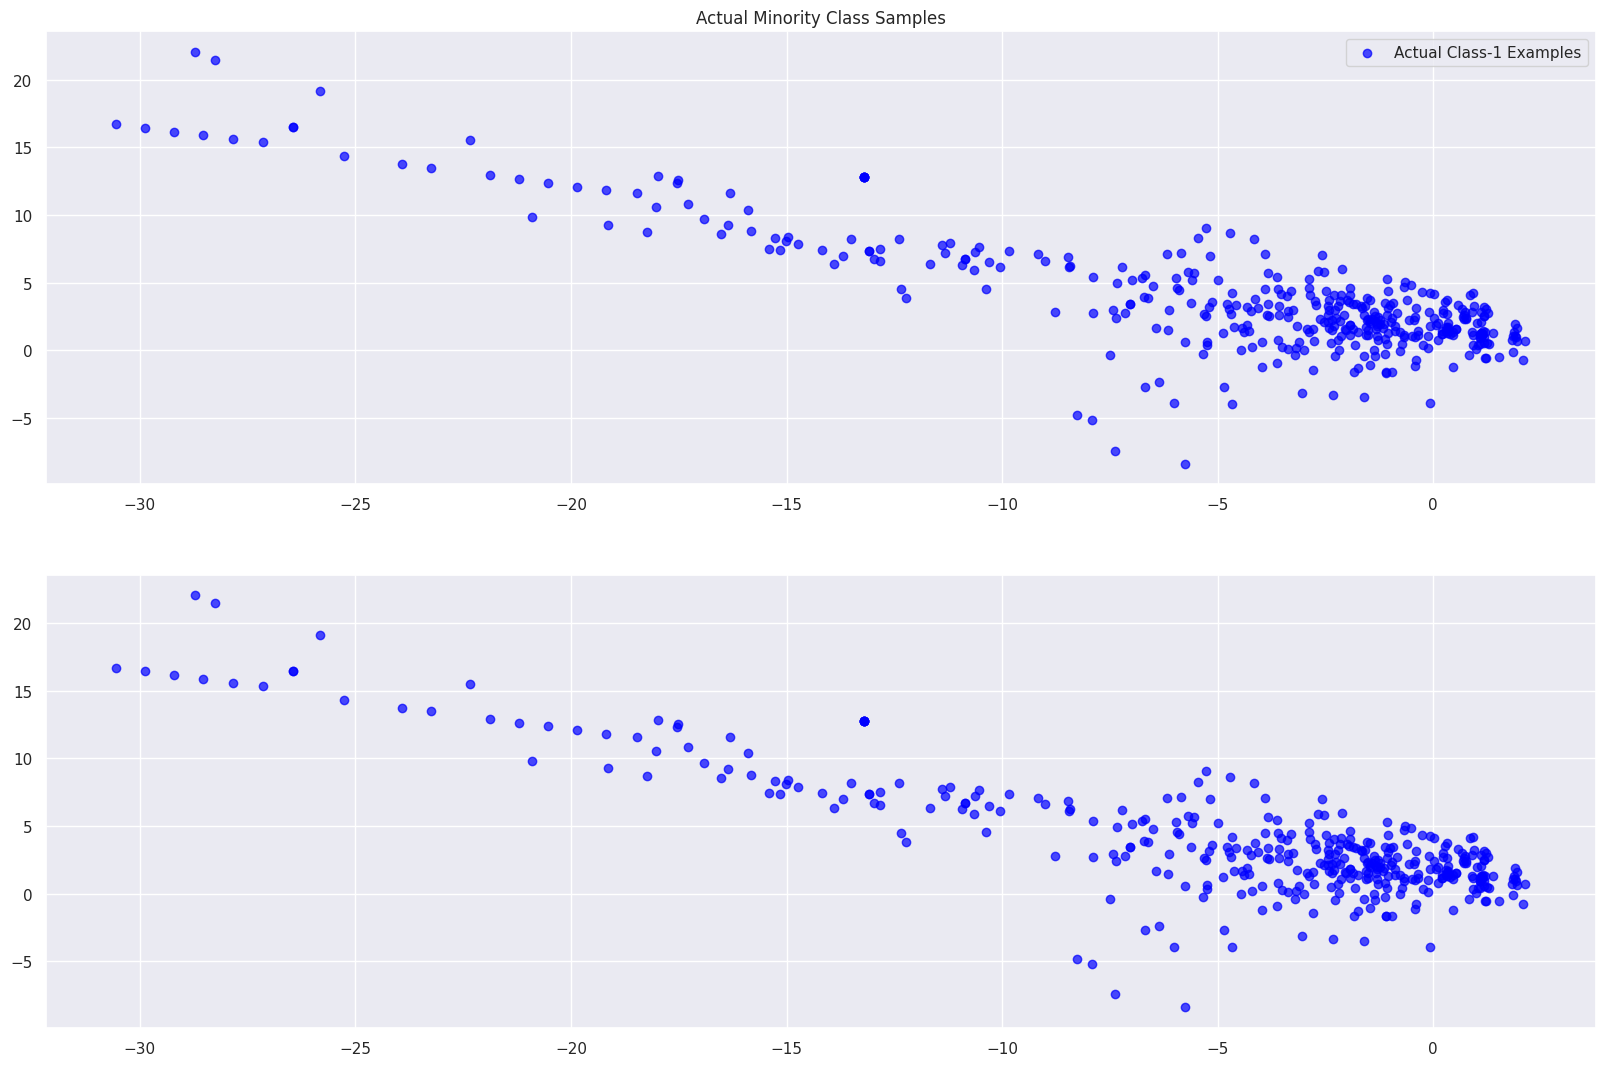

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import ADASYN
import numpy as np
import matplotlib.pyplot as plt

# Updated: Use fit_resample() instead of deprecated fit_sample()
adasyn = ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = adasyn.fit_resample(X_train, y_train)

# Artificial minority samples start after the size of original training set
X_train_adasyn_1 = X_train_ADASYN[len(X_train):]

# Extract actual minority and majority samples as numpy arrays
X_train_1 = X_train.to_numpy()[np.where(y_train == 1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train == 0.0)]

# Set plotting figure size
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

# Plot 1: Actual minority class examples only
plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7, color='blue')
plt.title('Actual Minority Class Samples')
plt.legend()
plt.grid(True)

# Plot 2: Actual minority + artificial ADASYN minority samples (limited to equal count for clarity)
plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7, color='blue')
plt.scatter(X_train_adasyn_1[:len(X_train_1), 0], X_train_adasyn_1[:len(X_train_1), 1],
            label='Artificial ADASYN Class-1 Examples', alpha=0.5, color='orange')
plt.title('Actual and Artificial Minority Samples (ADASYN)')
plt.legend()
plt.grid(True)

# Plot 3: Actual minority and majority samples for comparison
plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7, color='blue')
plt.scatter(X_train_0[:len(X_train_1), 0], X_train_0[:len(X_train_1), 1],
            label='Actual Class-0 Examples', alpha=0.5, color='green')
plt.title('Actual Minority vs. Majority Class Samples')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import pandas as pd

# Create StratifiedKFold instance with shuffle and fixed random state for reproducibility
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List to store oversampled training data for each fold if needed
oversampled_data_per_fold = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use iloc for positional indexing
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    # Instantiate SMOTE
    smote = SMOTE(random_state=0)

    # Correct method name fit_resample() instead of deprecated fit_sample()
    X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

    # Create DataFrame for oversampled training features with column names
    X_train_SMOTE_df = pd.DataFrame(data=X_train_SMOTE, columns=cols)

    # Store or process per fold
    oversampled_data_per_fold.append({
        'fold': fold,
        'X_train_SMOTE': X_train_SMOTE_df,
        'y_train_SMOTE': y_train_SMOTE,
        'X_test': X_test,
        'y_test': y_test
    })

    print(f"Fold {fold} processed: Oversampled training data shape {X_train_SMOTE_df.shape}")

# You can now use oversampled_data_per_fold for modeling or further processing


Fold 1 processed: Oversampled training data shape (454904, 30)
Fold 2 processed: Oversampled training data shape (454904, 30)
Fold 3 processed: Oversampled training data shape (454904, 30)
Fold 4 processed: Oversampled training data shape (454904, 30)
Fold 5 processed: Oversampled training data shape (454904, 30)


##### Build models on other algorithms to see the better performing on ADASYN


Starting Logistic Regression (L1 & L2) ...

Starting KNN ...

Starting Decision Tree ...

Starting Random Forest ...


Models completed:   0%|          | 0/5 [00:00<?, ?it/s]

gini score: 0.9975


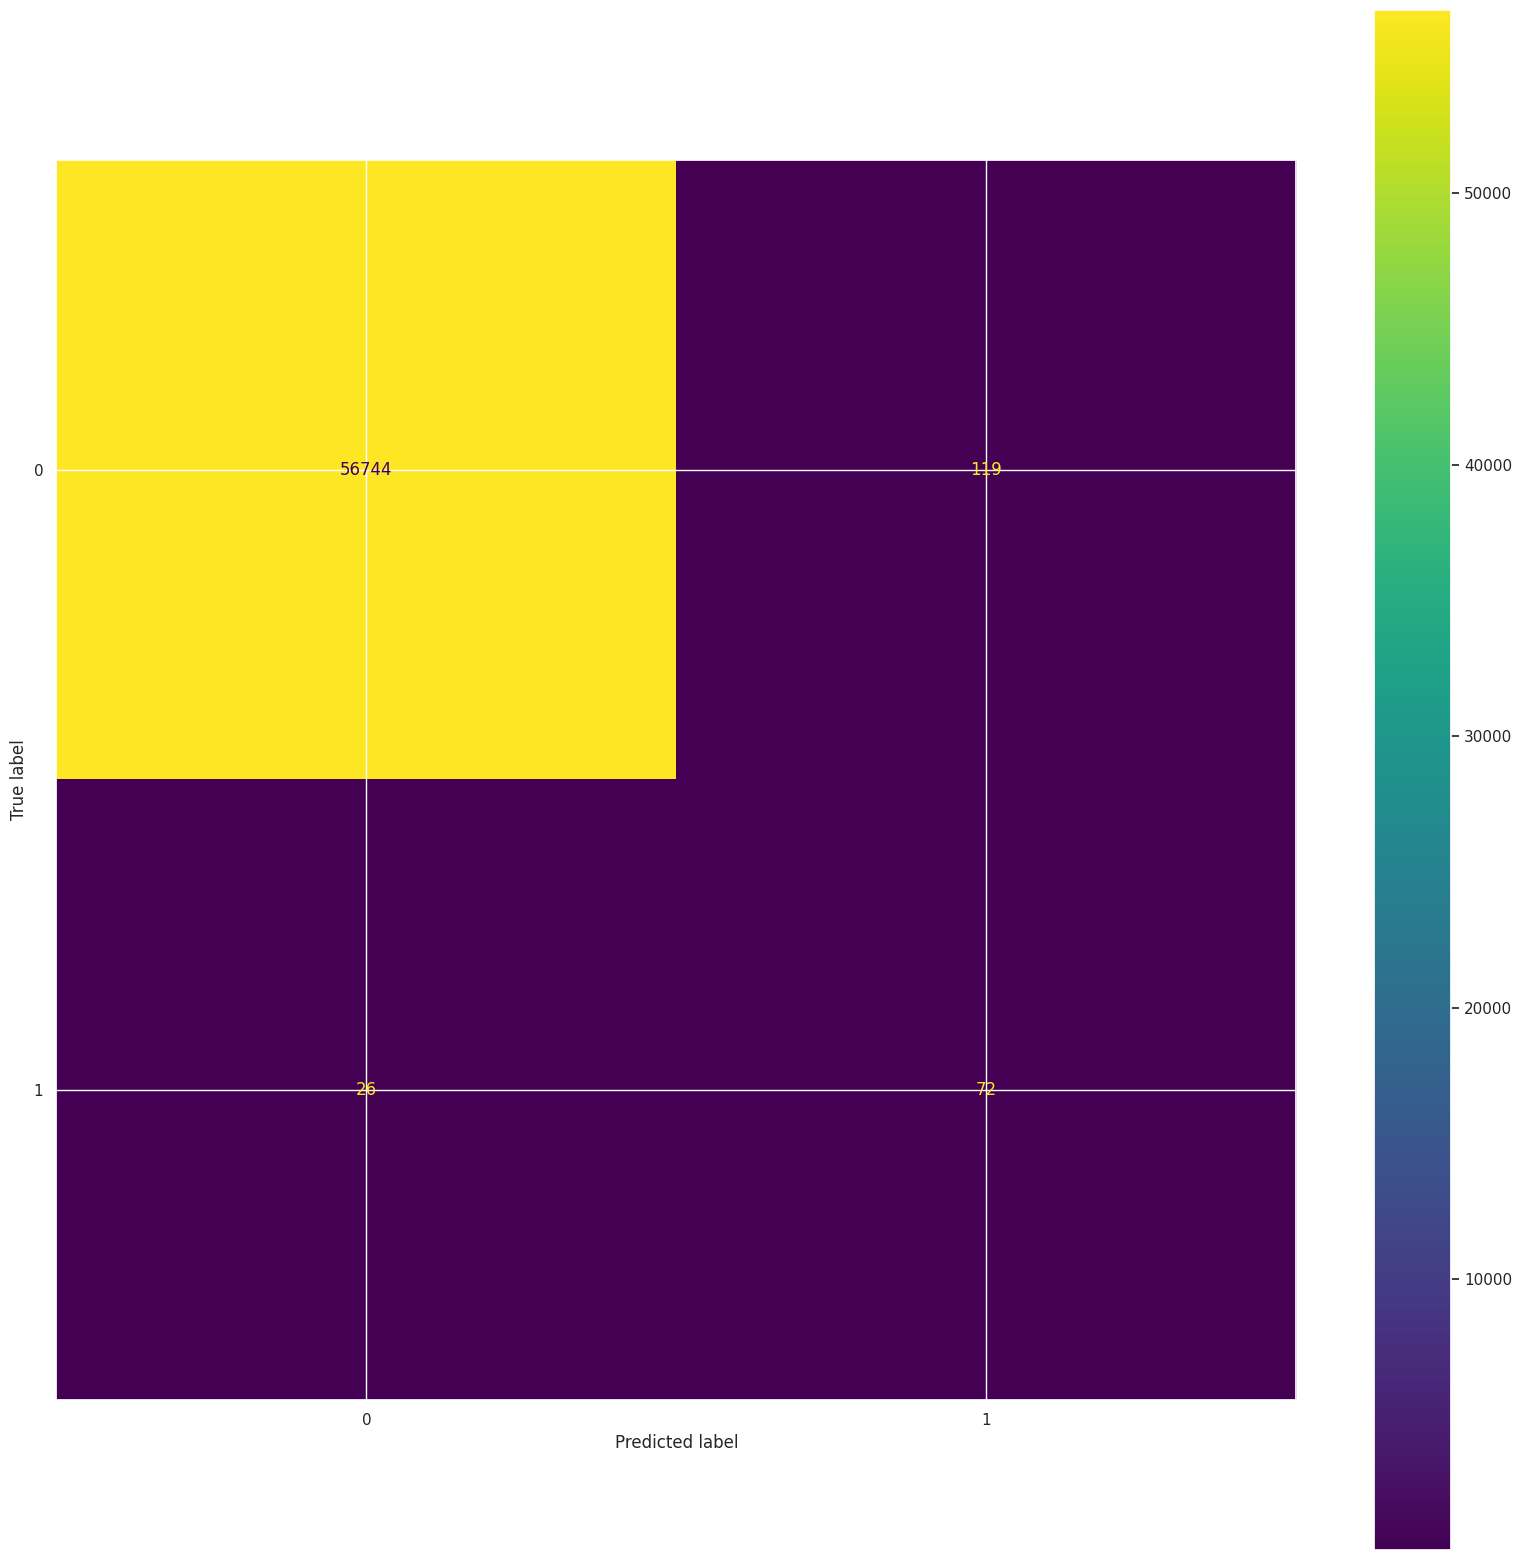

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.38      0.73      0.50        98

    accuracy                           1.00     56961
   macro avg       0.69      0.87      0.75     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8663
Tree threshold: 1.0000
ROC for the test dataset 86.6%


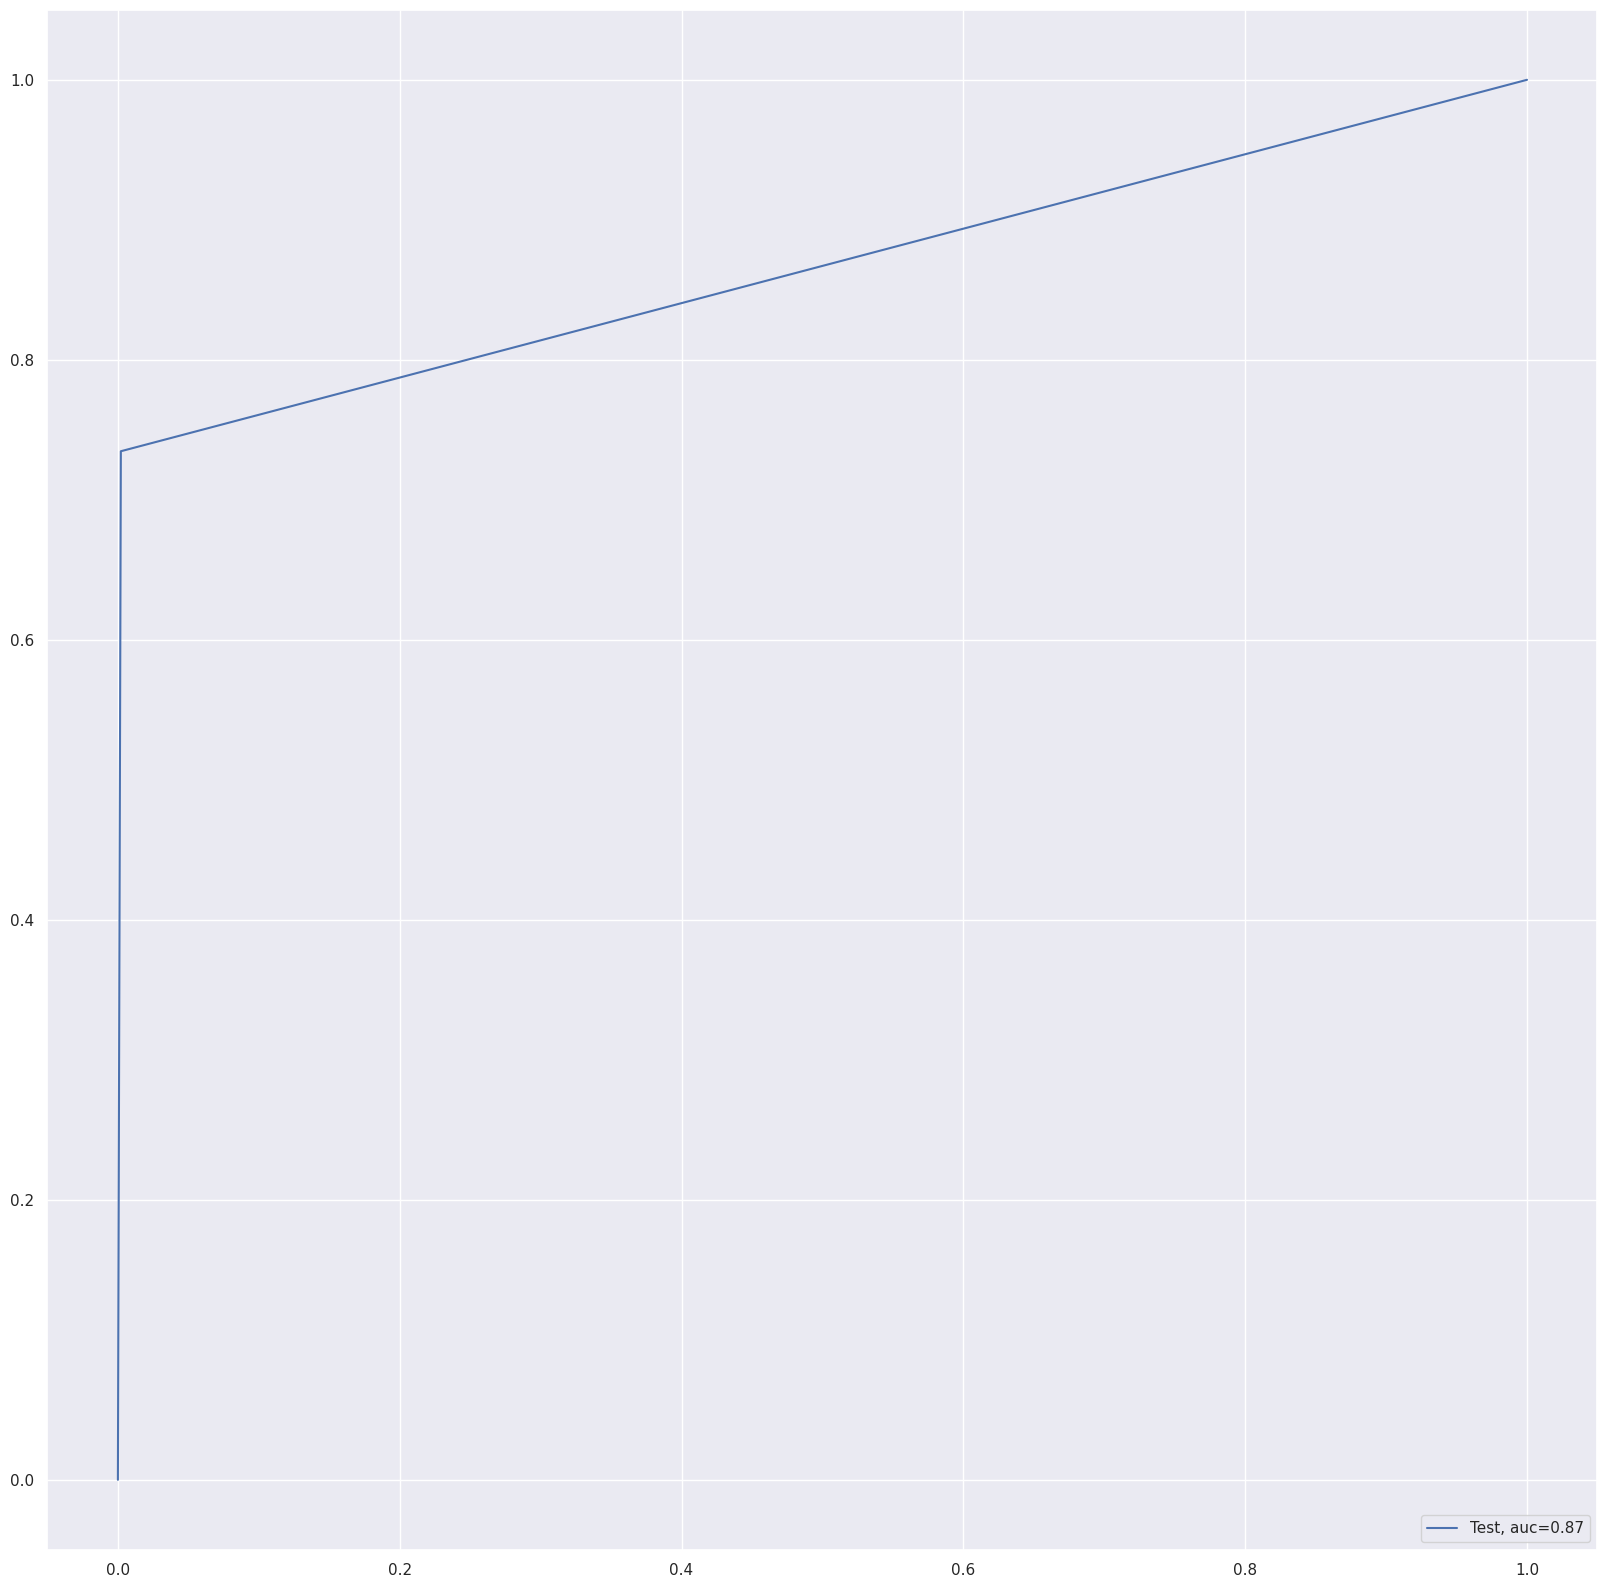

entropy score: 0.9977


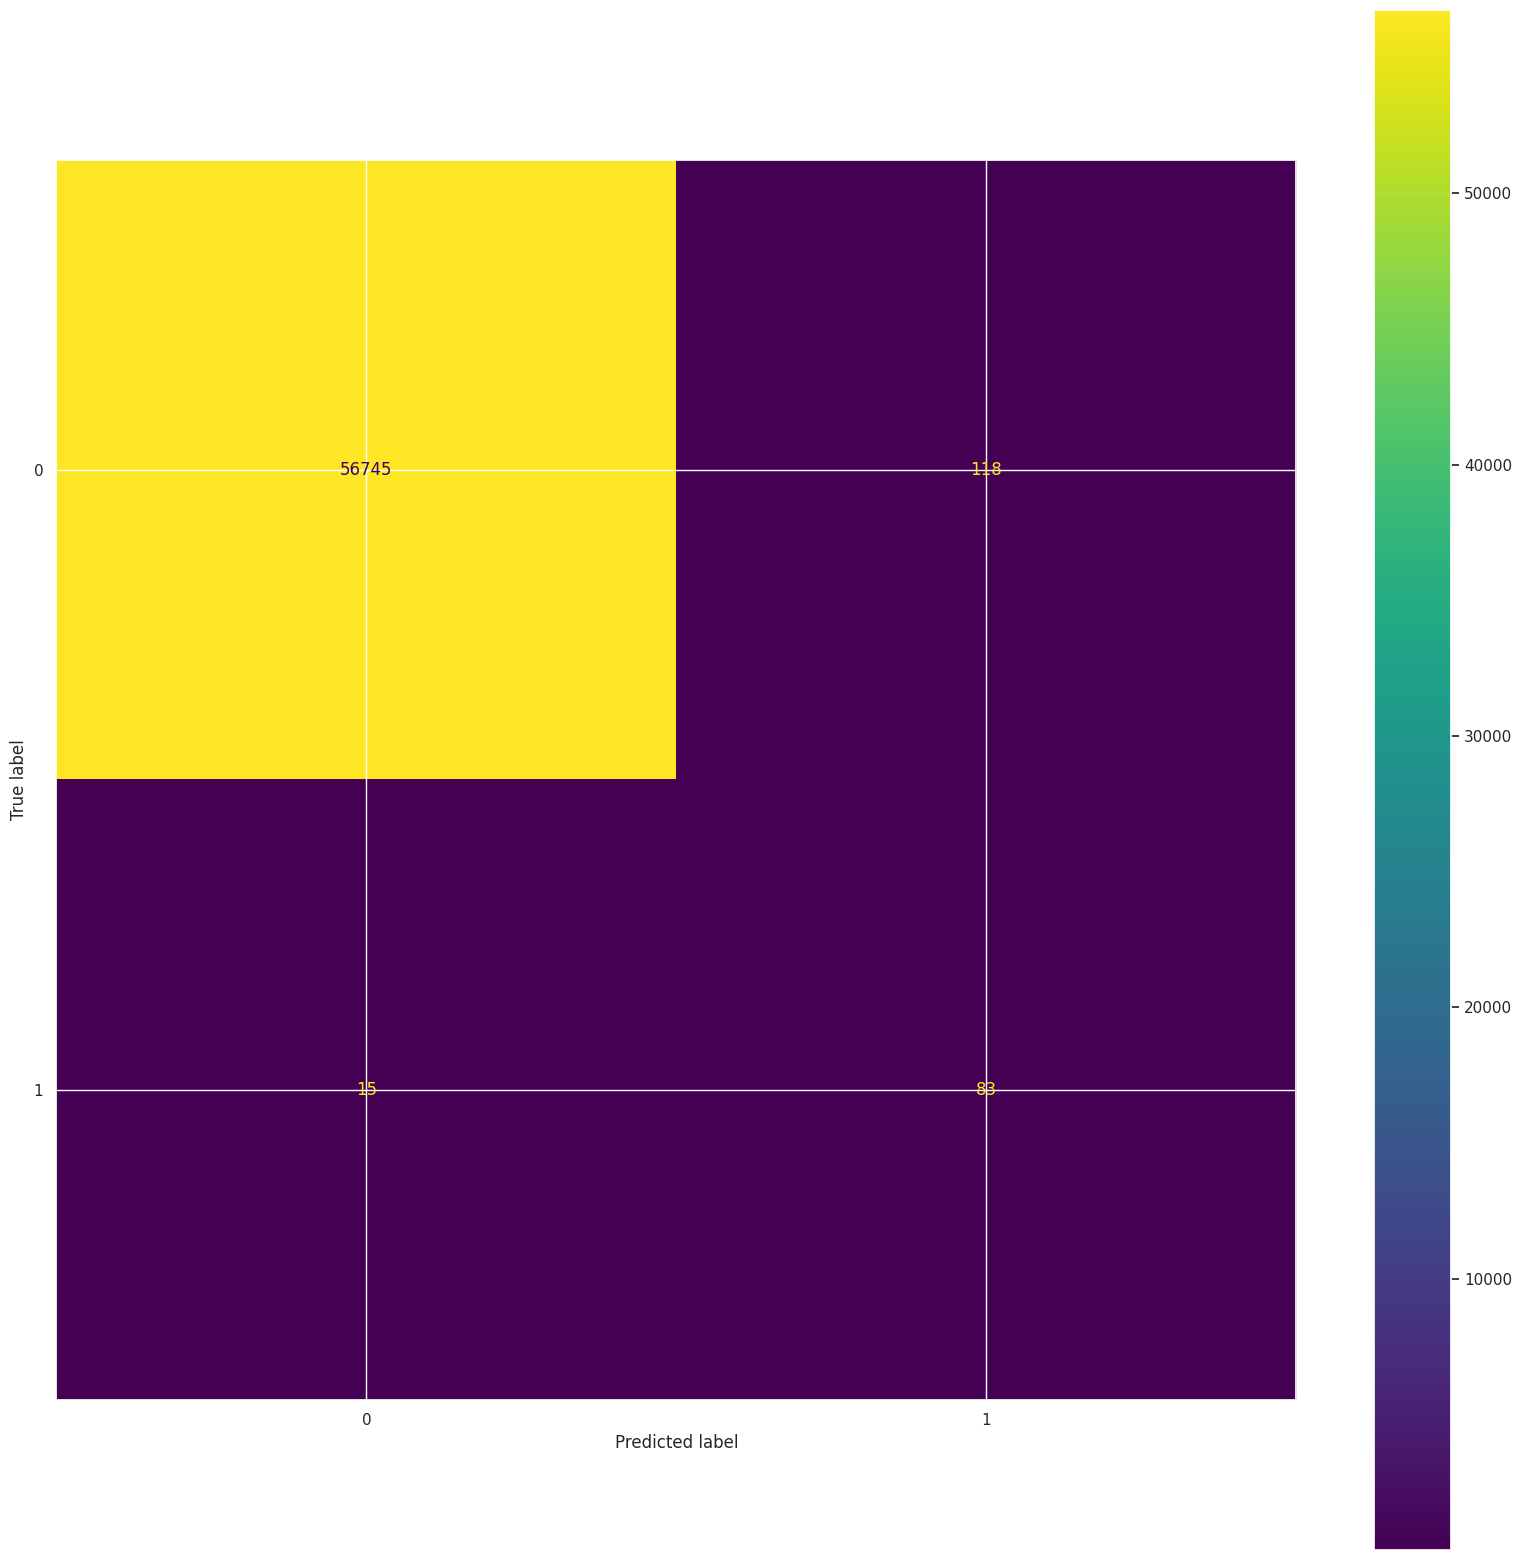

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.85      0.56        98

    accuracy                           1.00     56961
   macro avg       0.71      0.92      0.78     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.9224
Tree threshold: 1.0000
ROC for the test dataset 92.2%


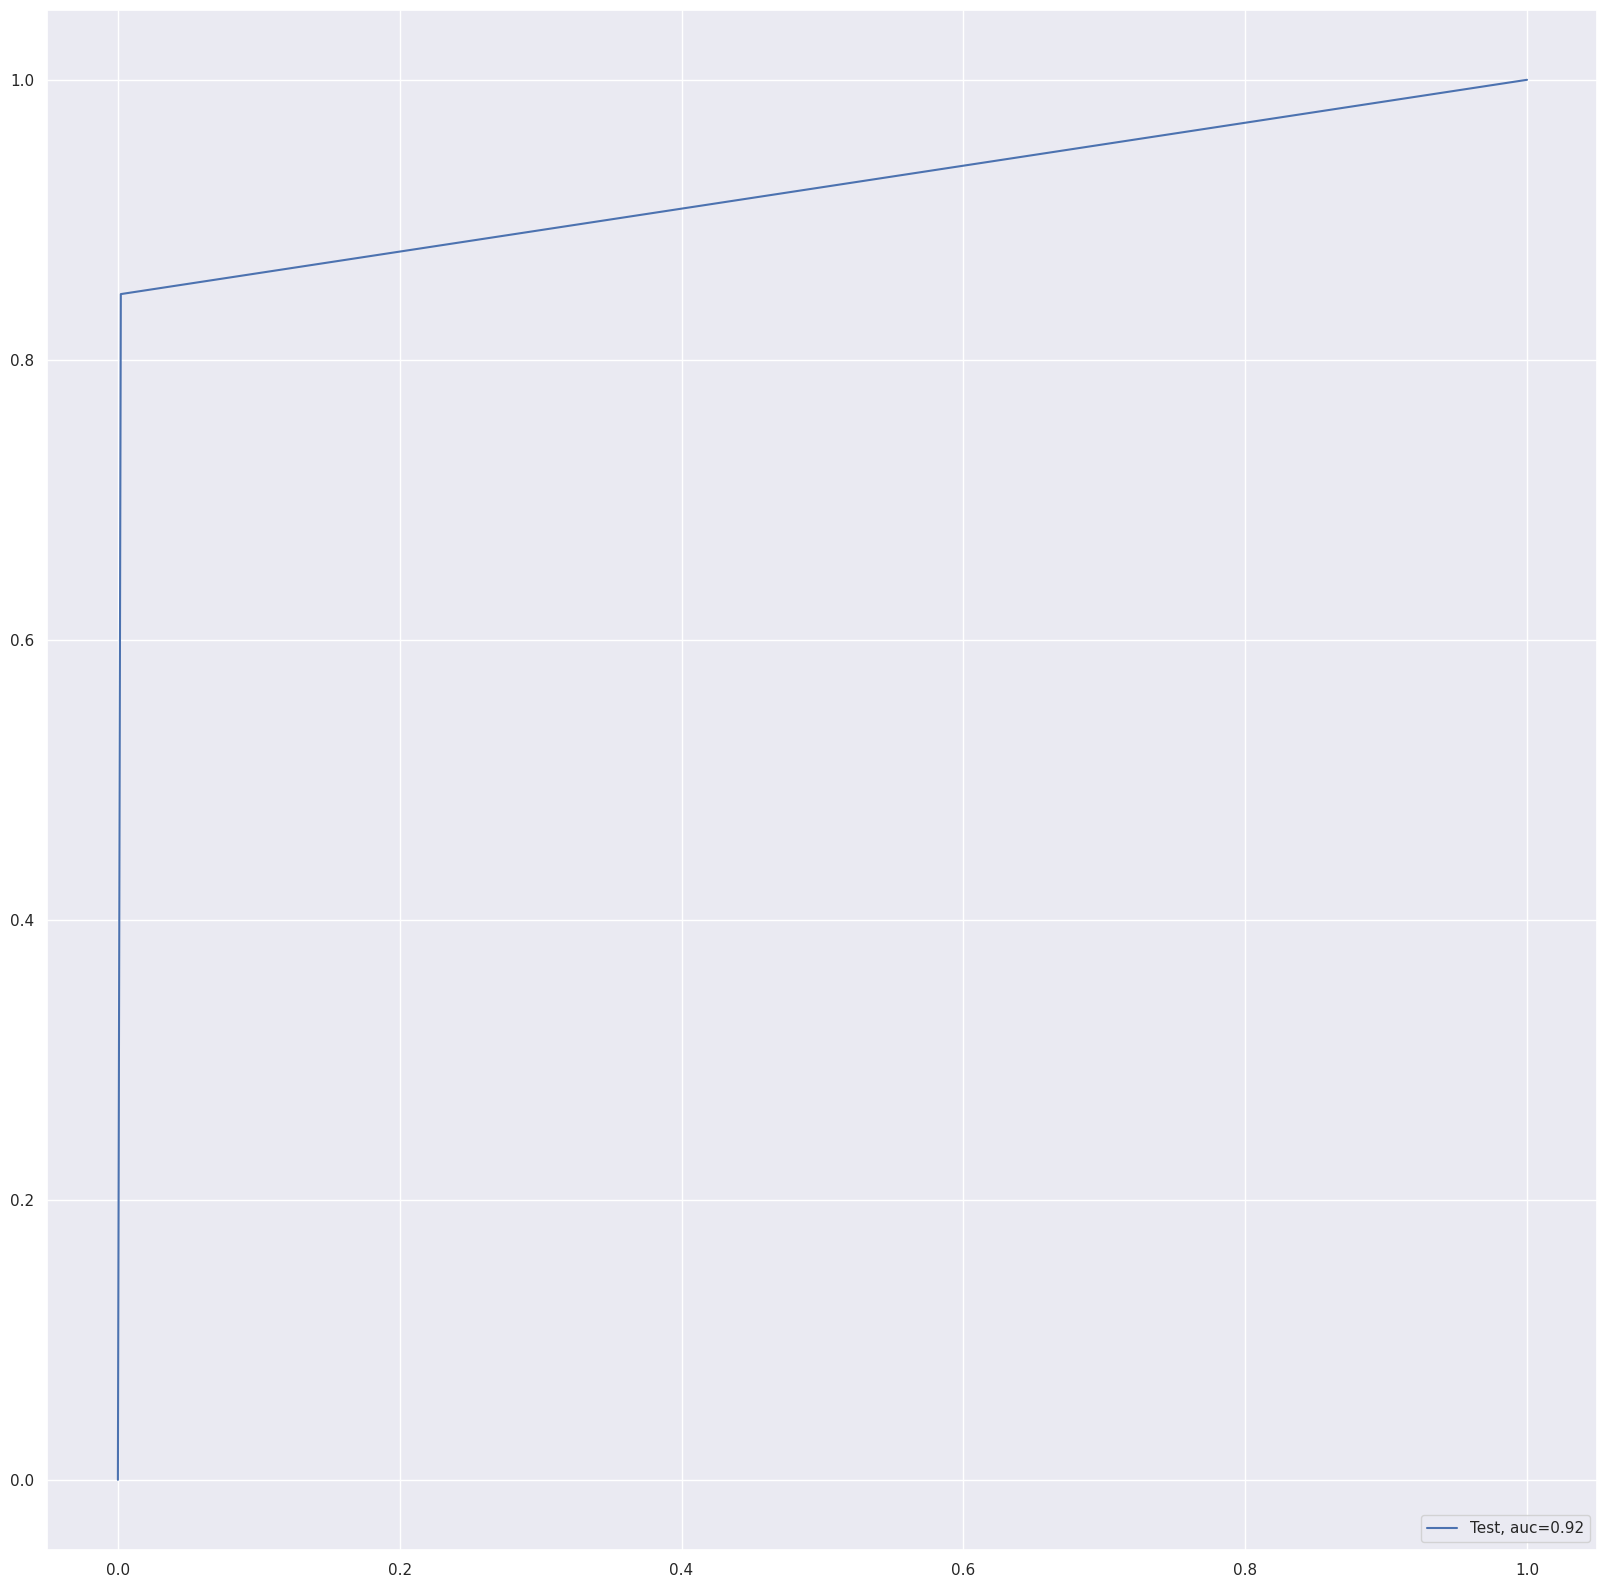

Models completed:  20%|██        | 1/5 [06:15<25:00, 375.20s/it]

Decision Tree completed in 375.23 seconds
--------------------------------------------------------------------------------

Starting XGBoost ...
Model Accuracy: 0.9993


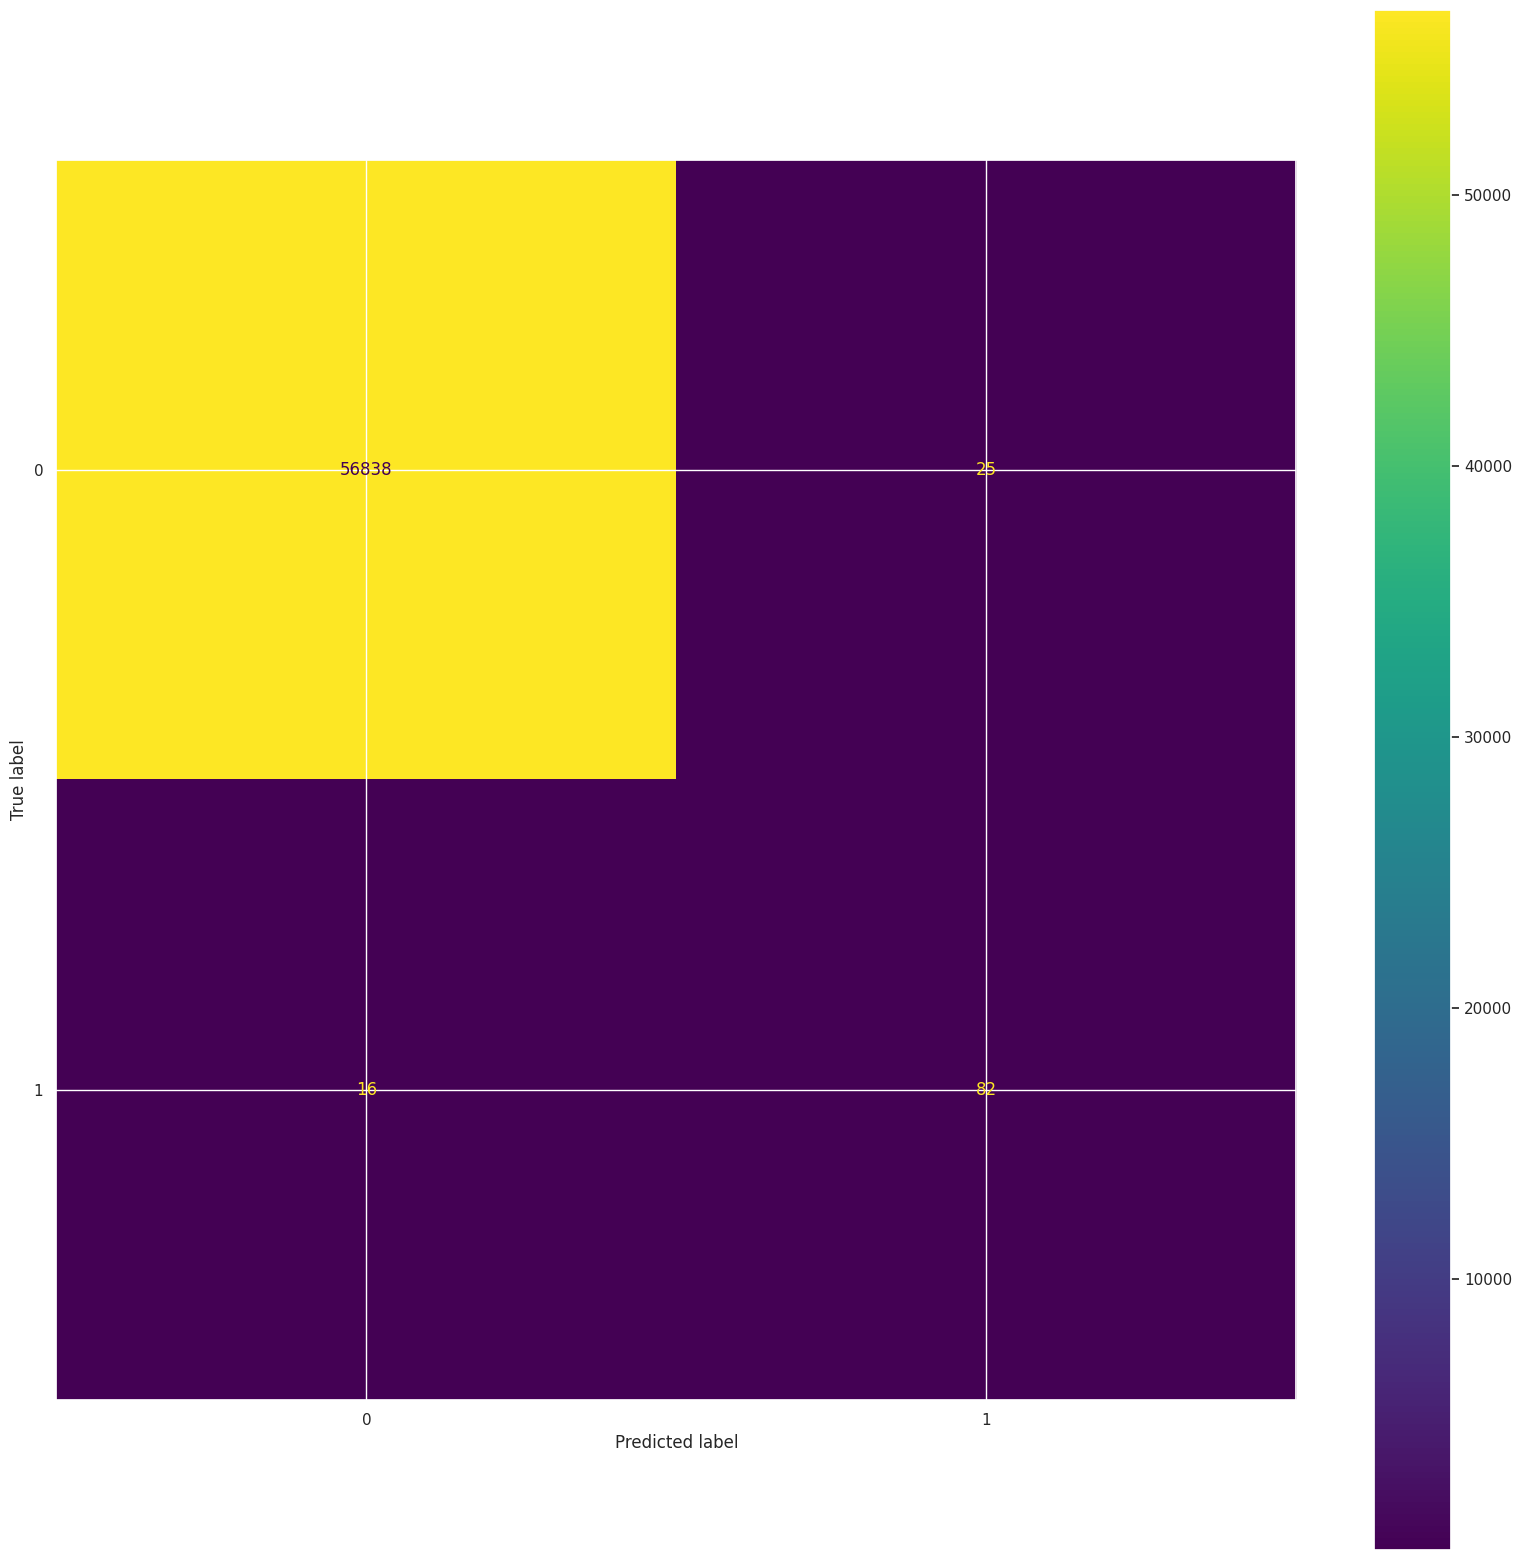

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.77      0.84      0.80        98

    accuracy                           1.00     56961
   macro avg       0.88      0.92      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9777
XGBoost threshold: 0.0003
ROC for the test dataset 97.8%


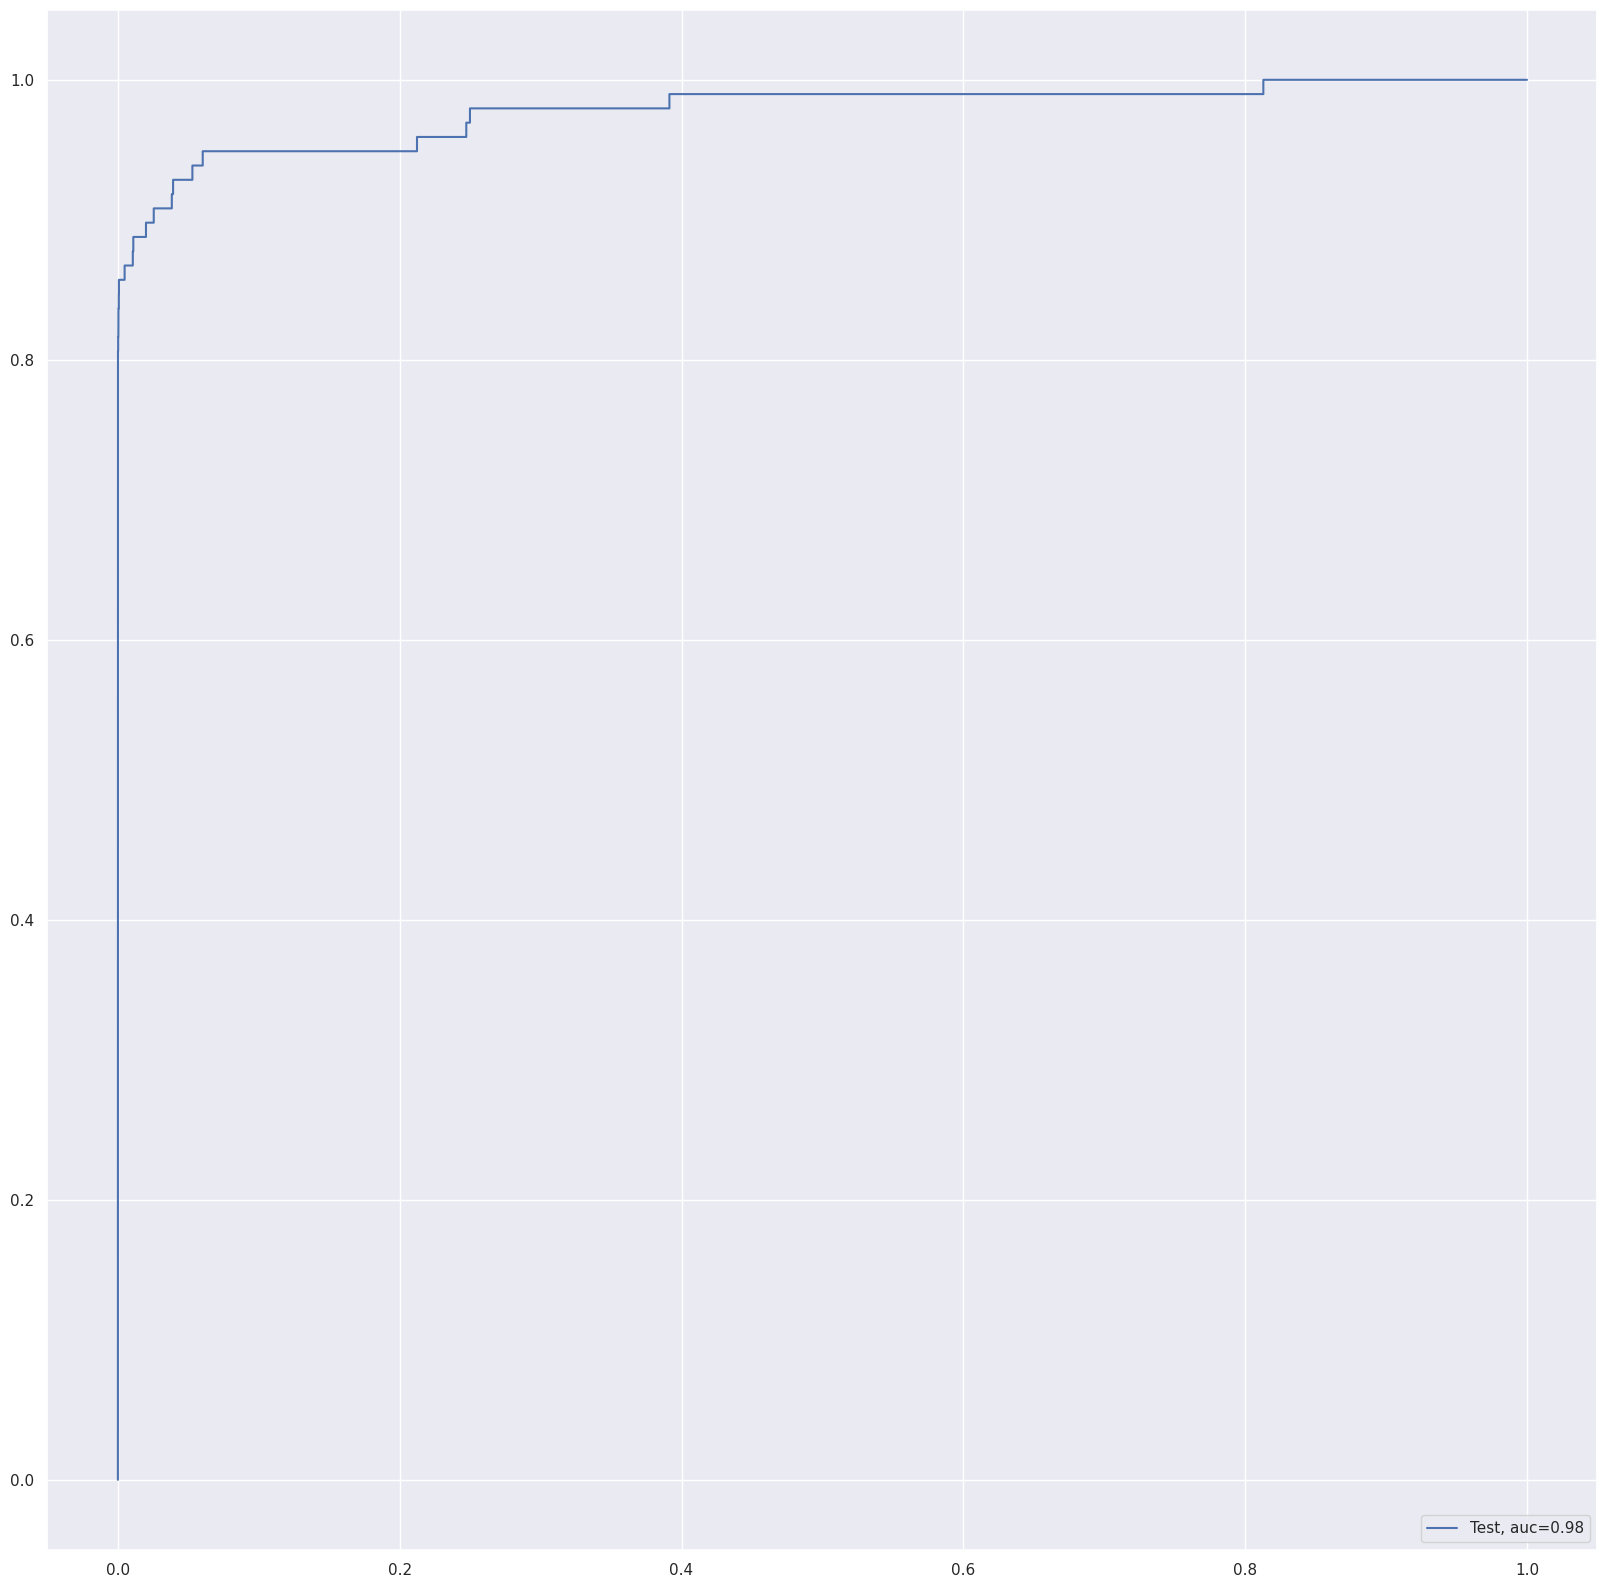

Models completed:  40%|████      | 2/5 [06:51<08:46, 175.66s/it]

XGBoost completed in 35.97 seconds
--------------------------------------------------------------------------------
Accuracy of Logistic model with L2 regularisation: 0.0120


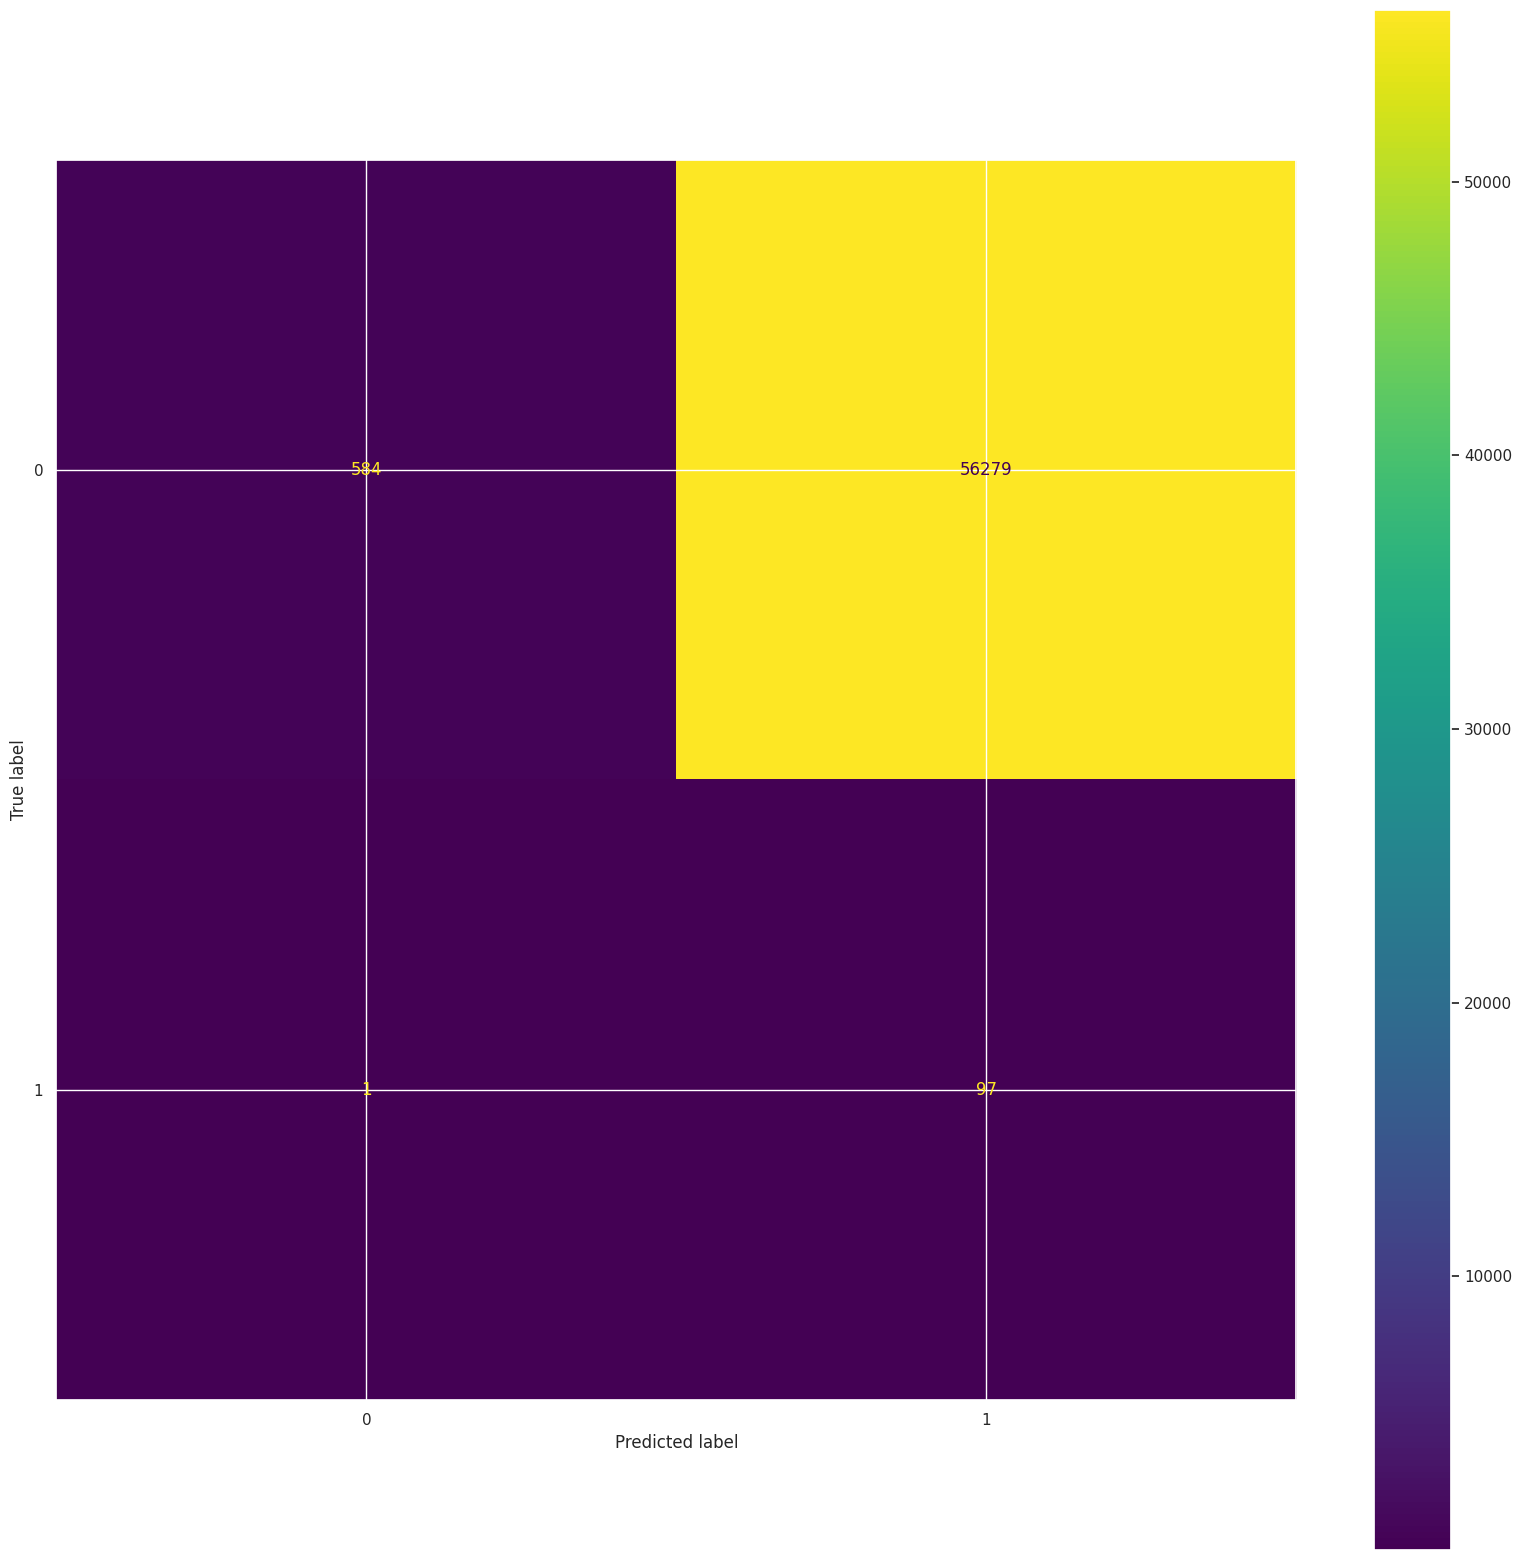

              precision    recall  f1-score   support

           0       1.00      0.01      0.02     56863
           1       0.00      0.99      0.00        98

    accuracy                           0.01     56961
   macro avg       0.50      0.50      0.01     56961
weighted avg       1.00      0.01      0.02     56961

L2 roc_value: 0.4982
L2 threshold: 0.5298


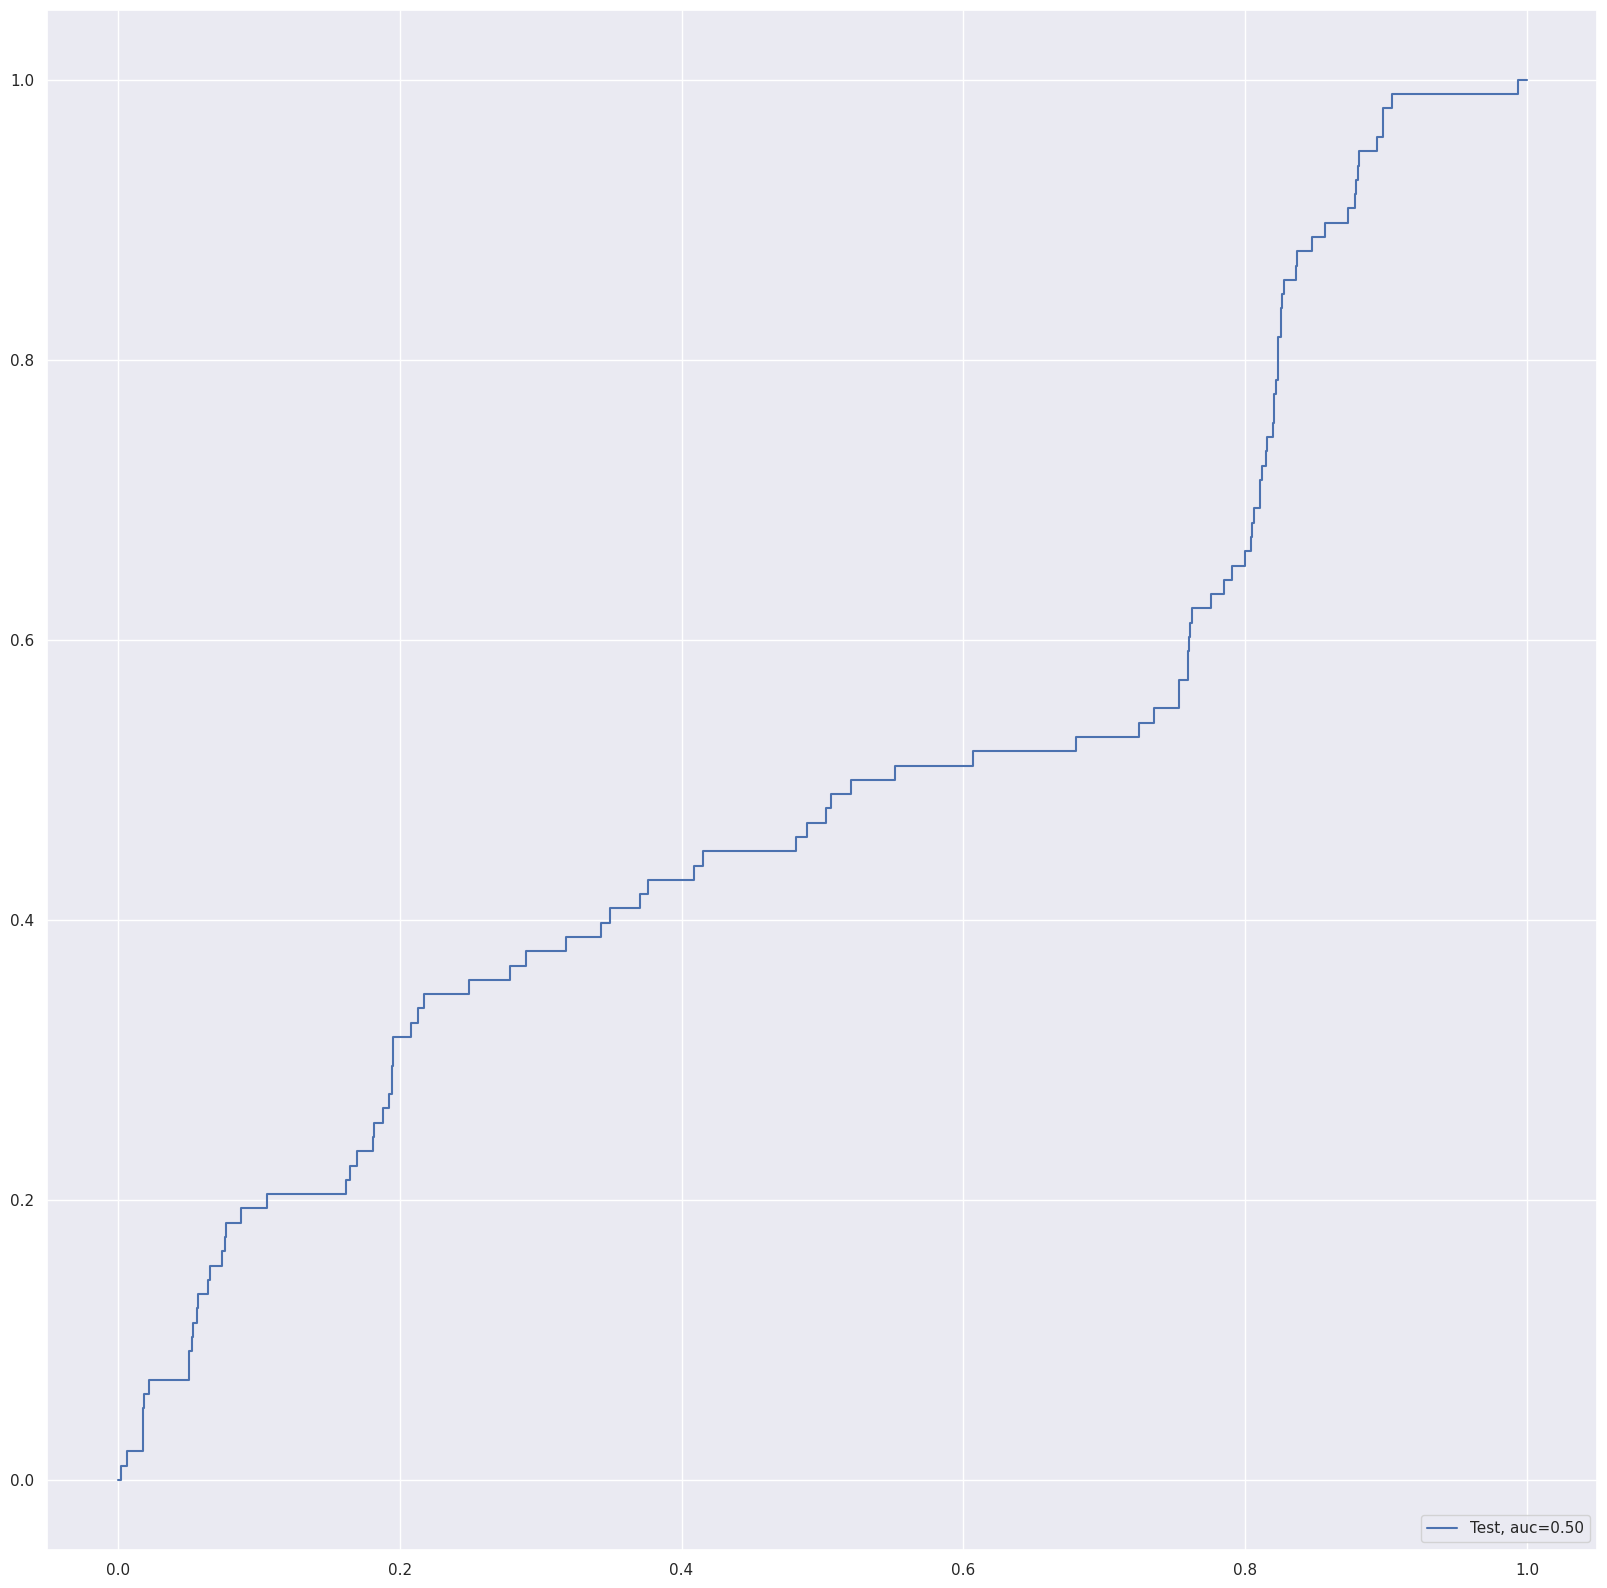

Accuracy of Logistic model with L1 regularisation: 0.9983


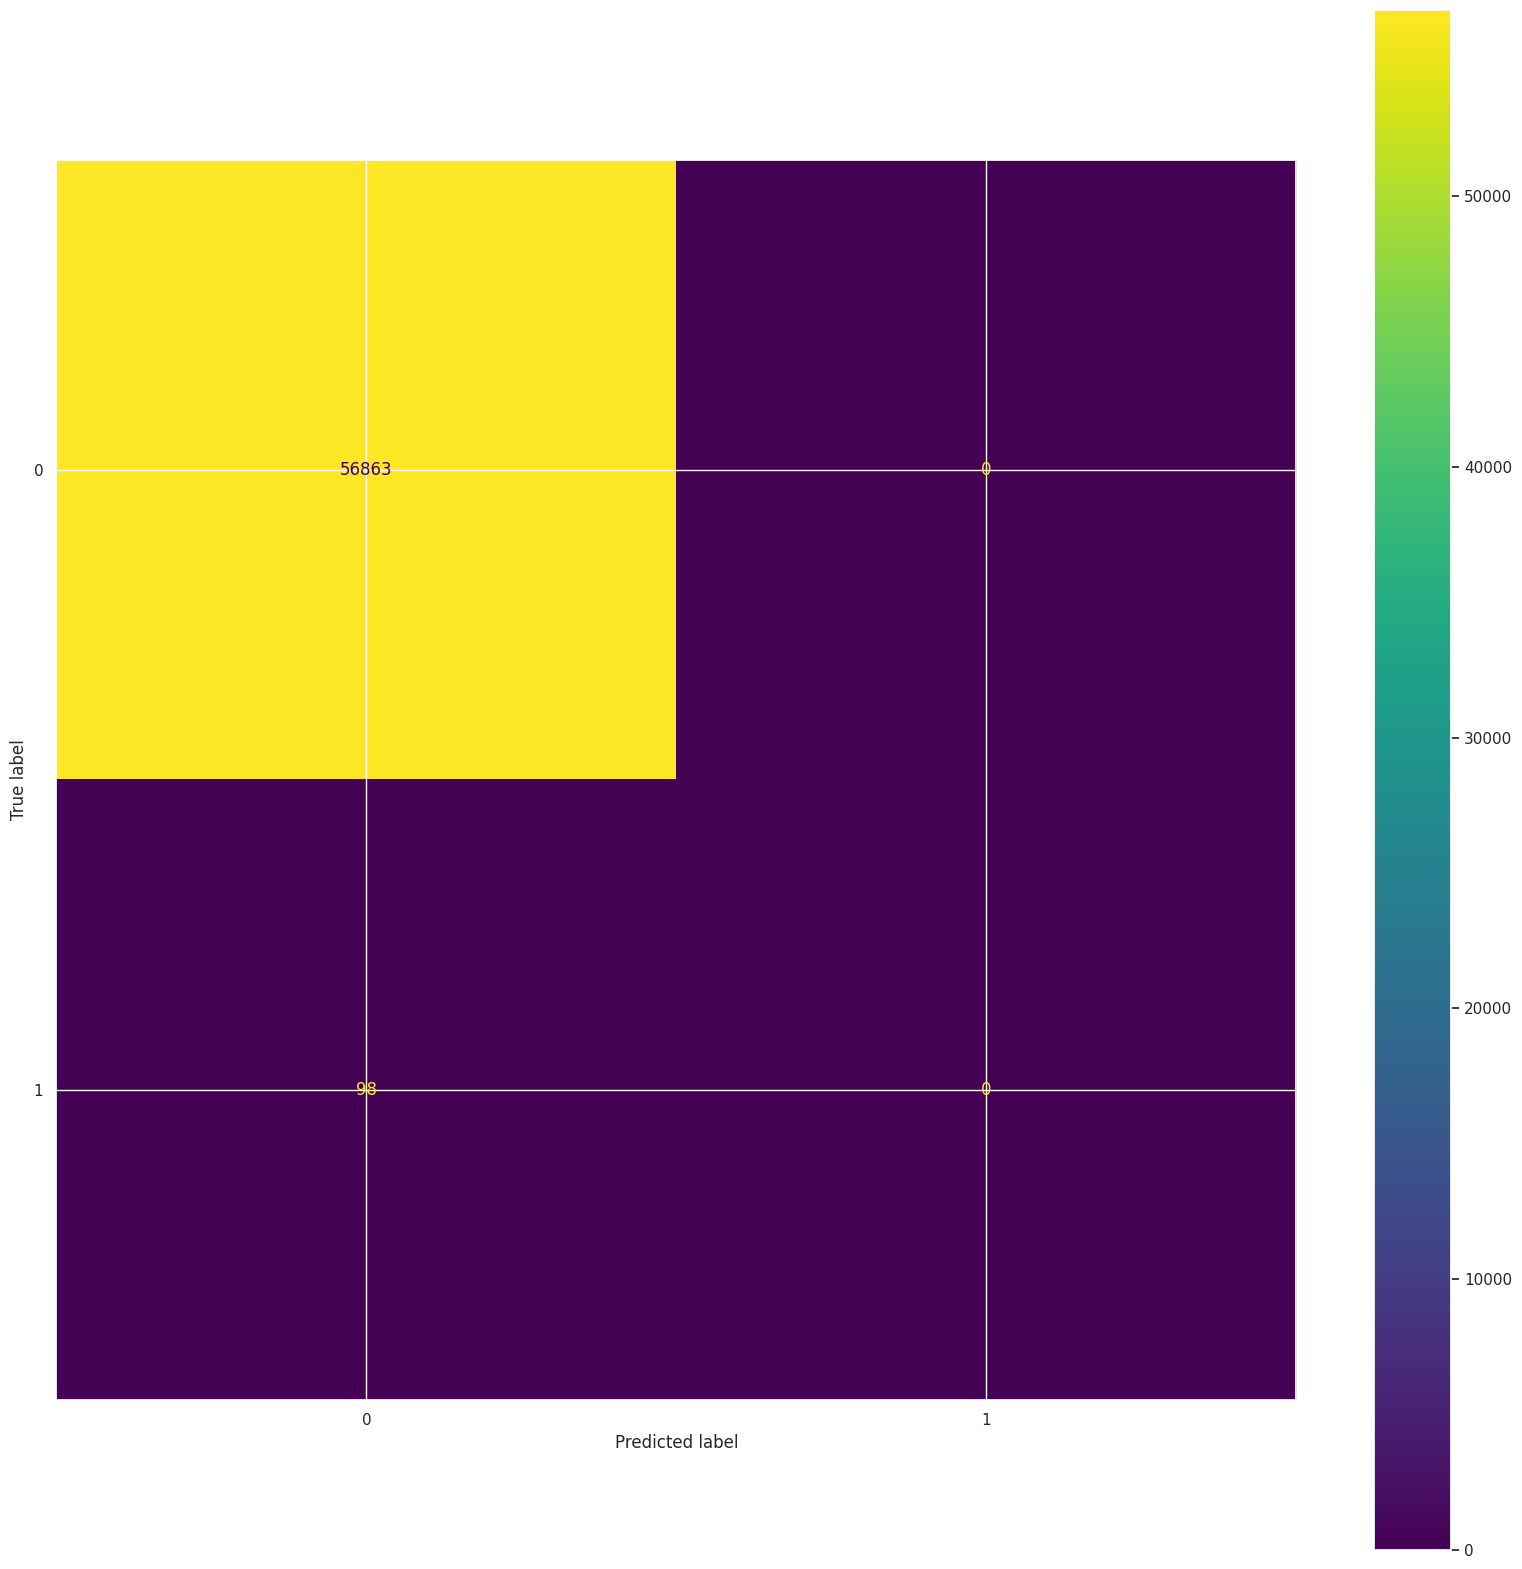

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

L1 roc_value: 0.5000
L1 threshold: inf


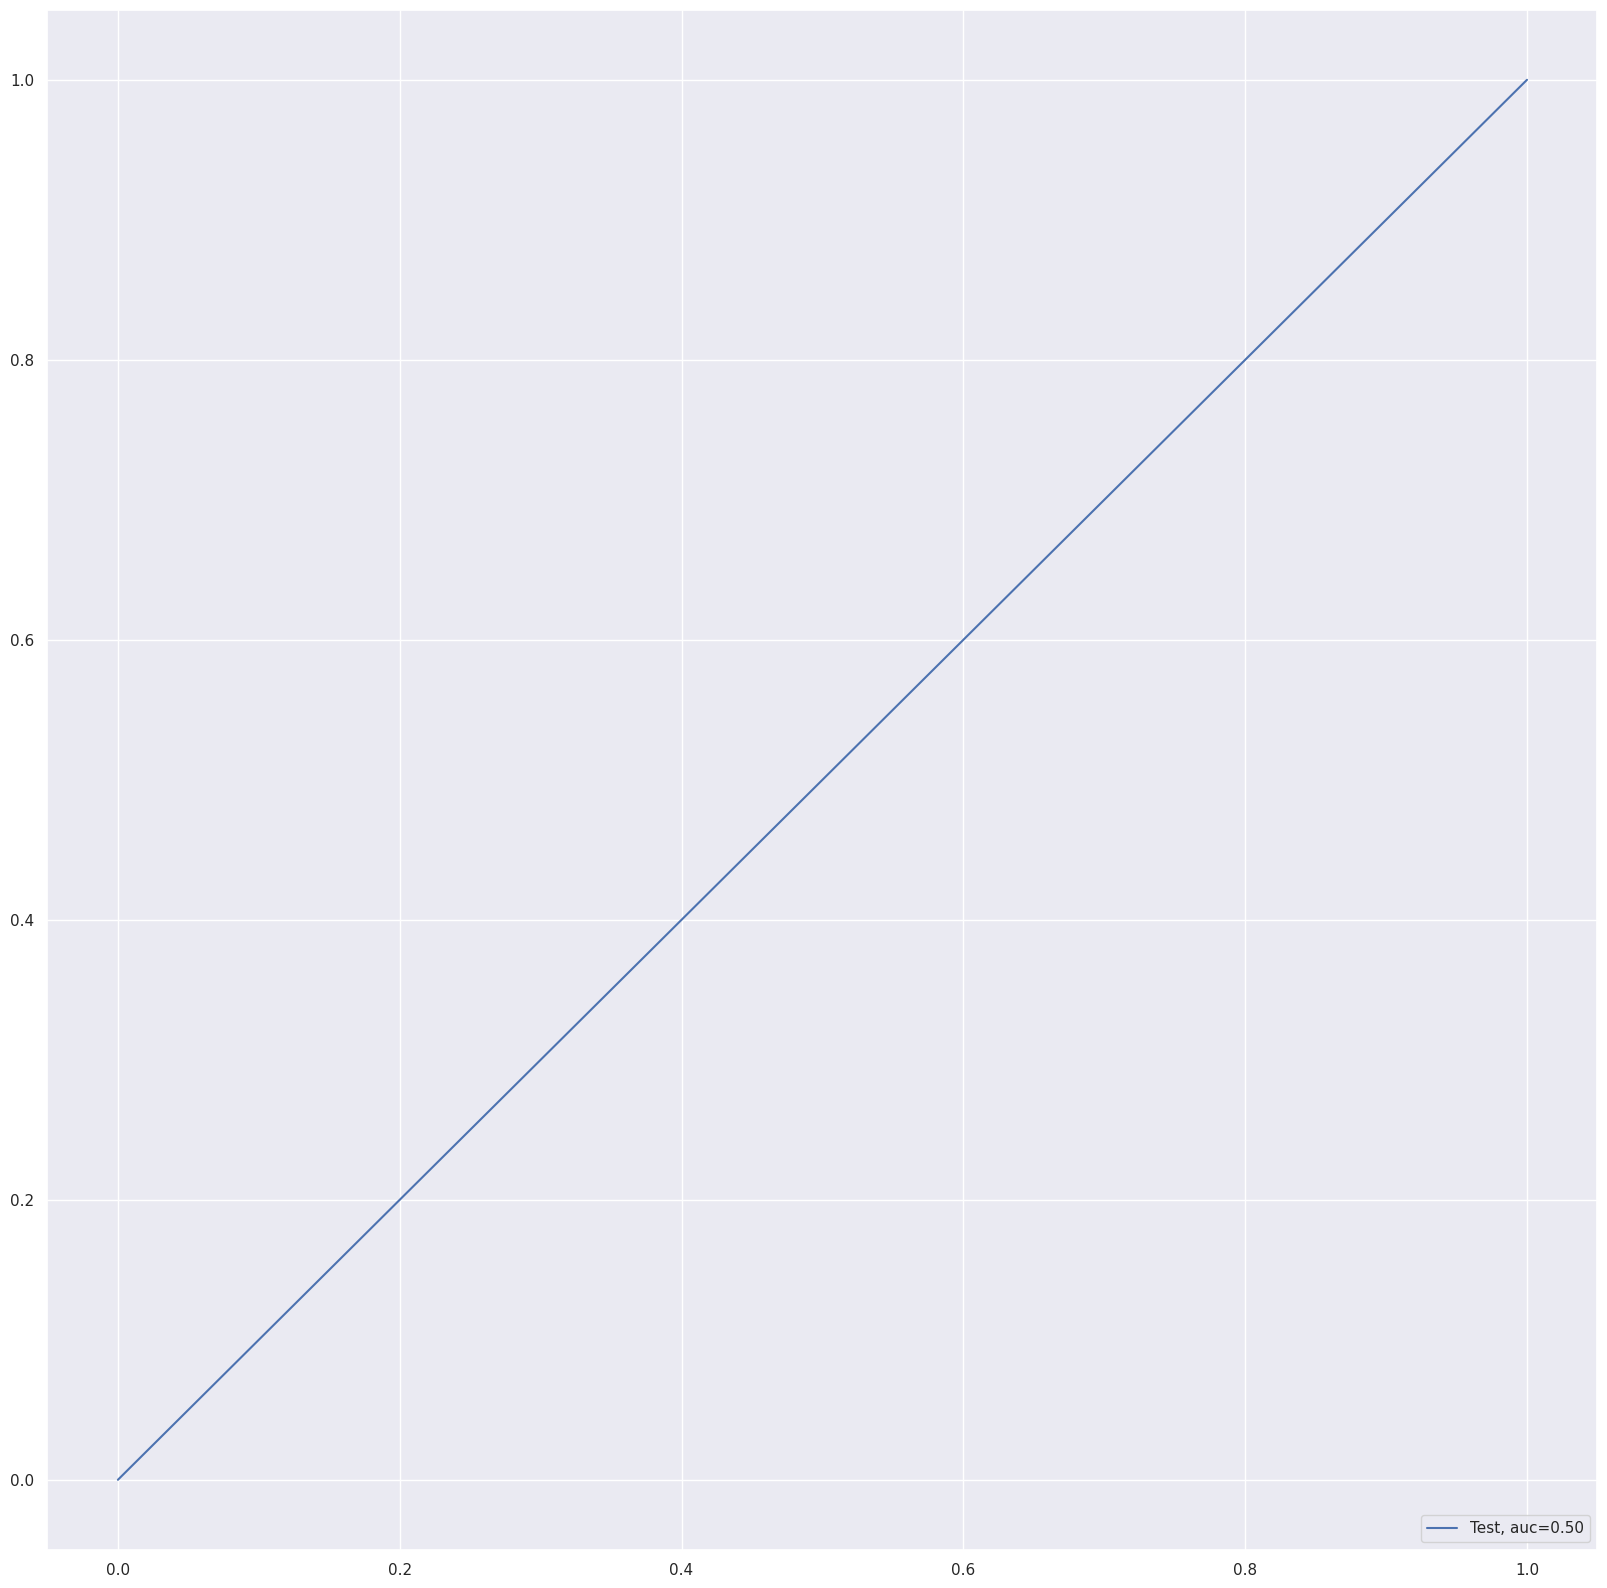

Models completed:  60%|██████    | 3/5 [08:16<04:29, 134.57s/it]

Logistic Regression (L1 & L2) completed in 496.89 seconds
--------------------------------------------------------------------------------
KNN Accuracy: 0.9959


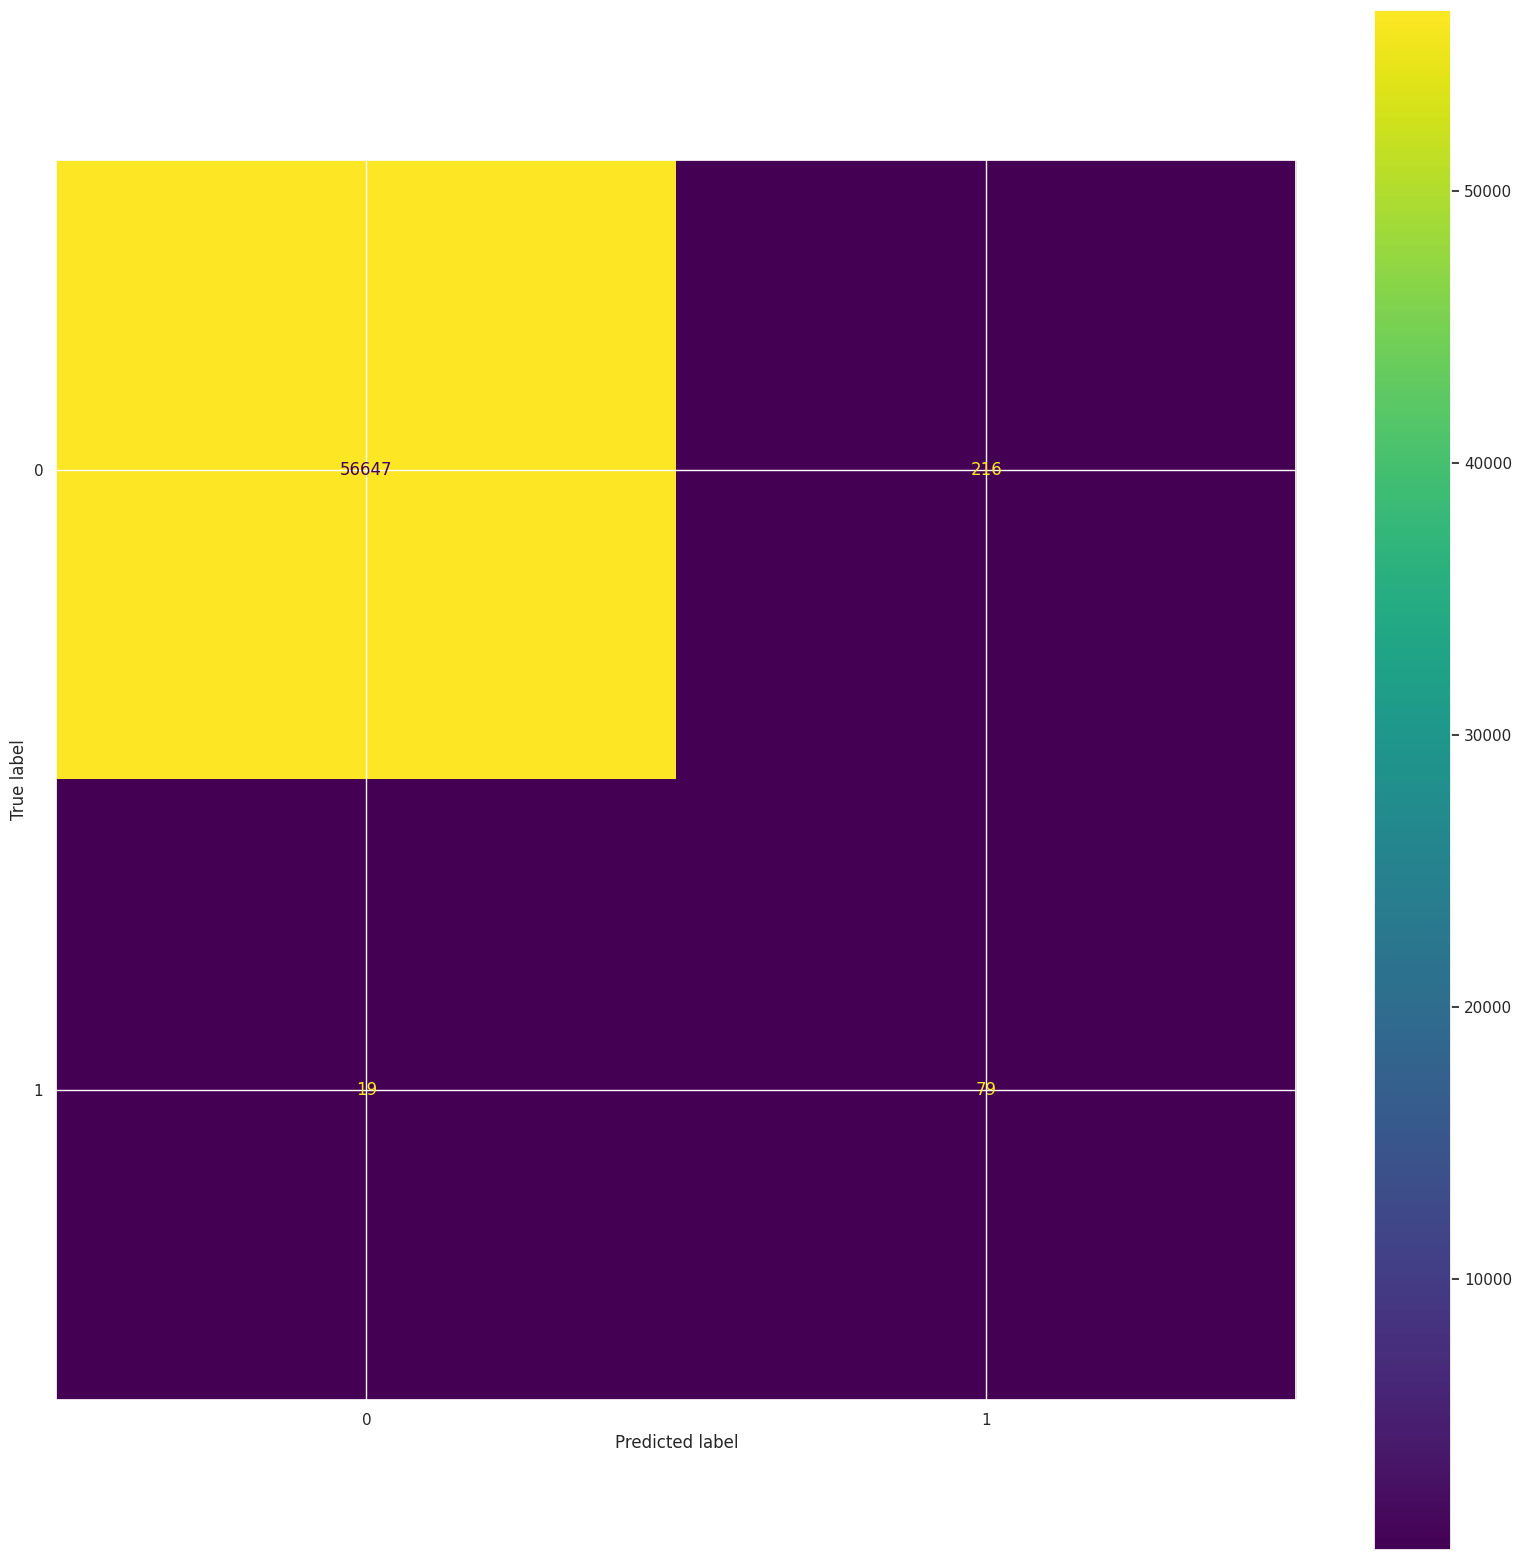

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.27      0.81      0.40        98

    accuracy                           1.00     56961
   macro avg       0.63      0.90      0.70     56961
weighted avg       1.00      1.00      1.00     56961

KNN ROC AUC: 0.9171
KNN optimal threshold: 0.2000


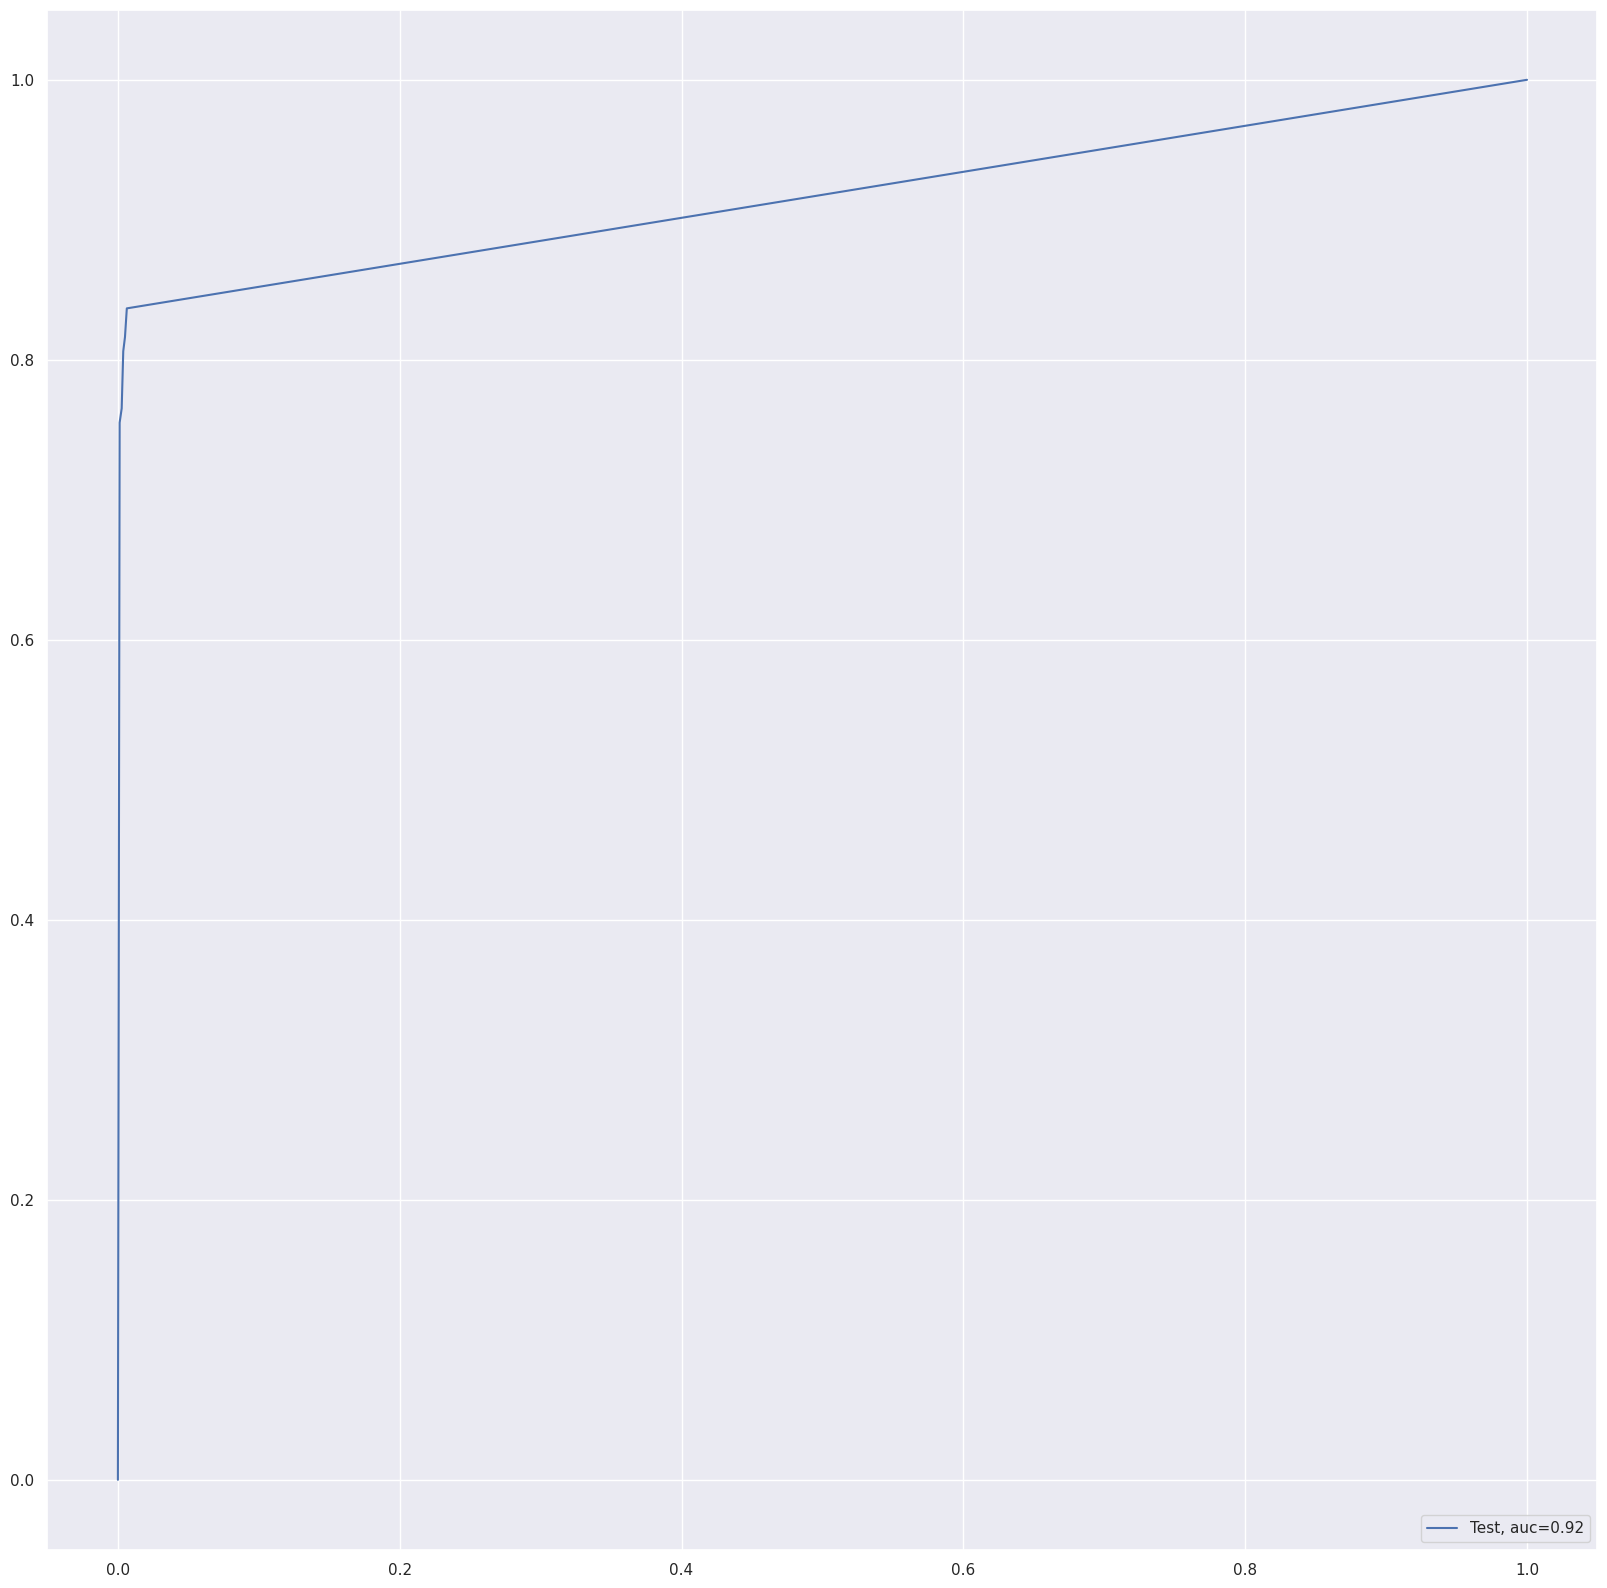

Models completed:  80%|████████  | 4/5 [15:03<04:02, 242.03s/it]

KNN completed in 903.66 seconds
--------------------------------------------------------------------------------
Model Accuracy: 0.9995


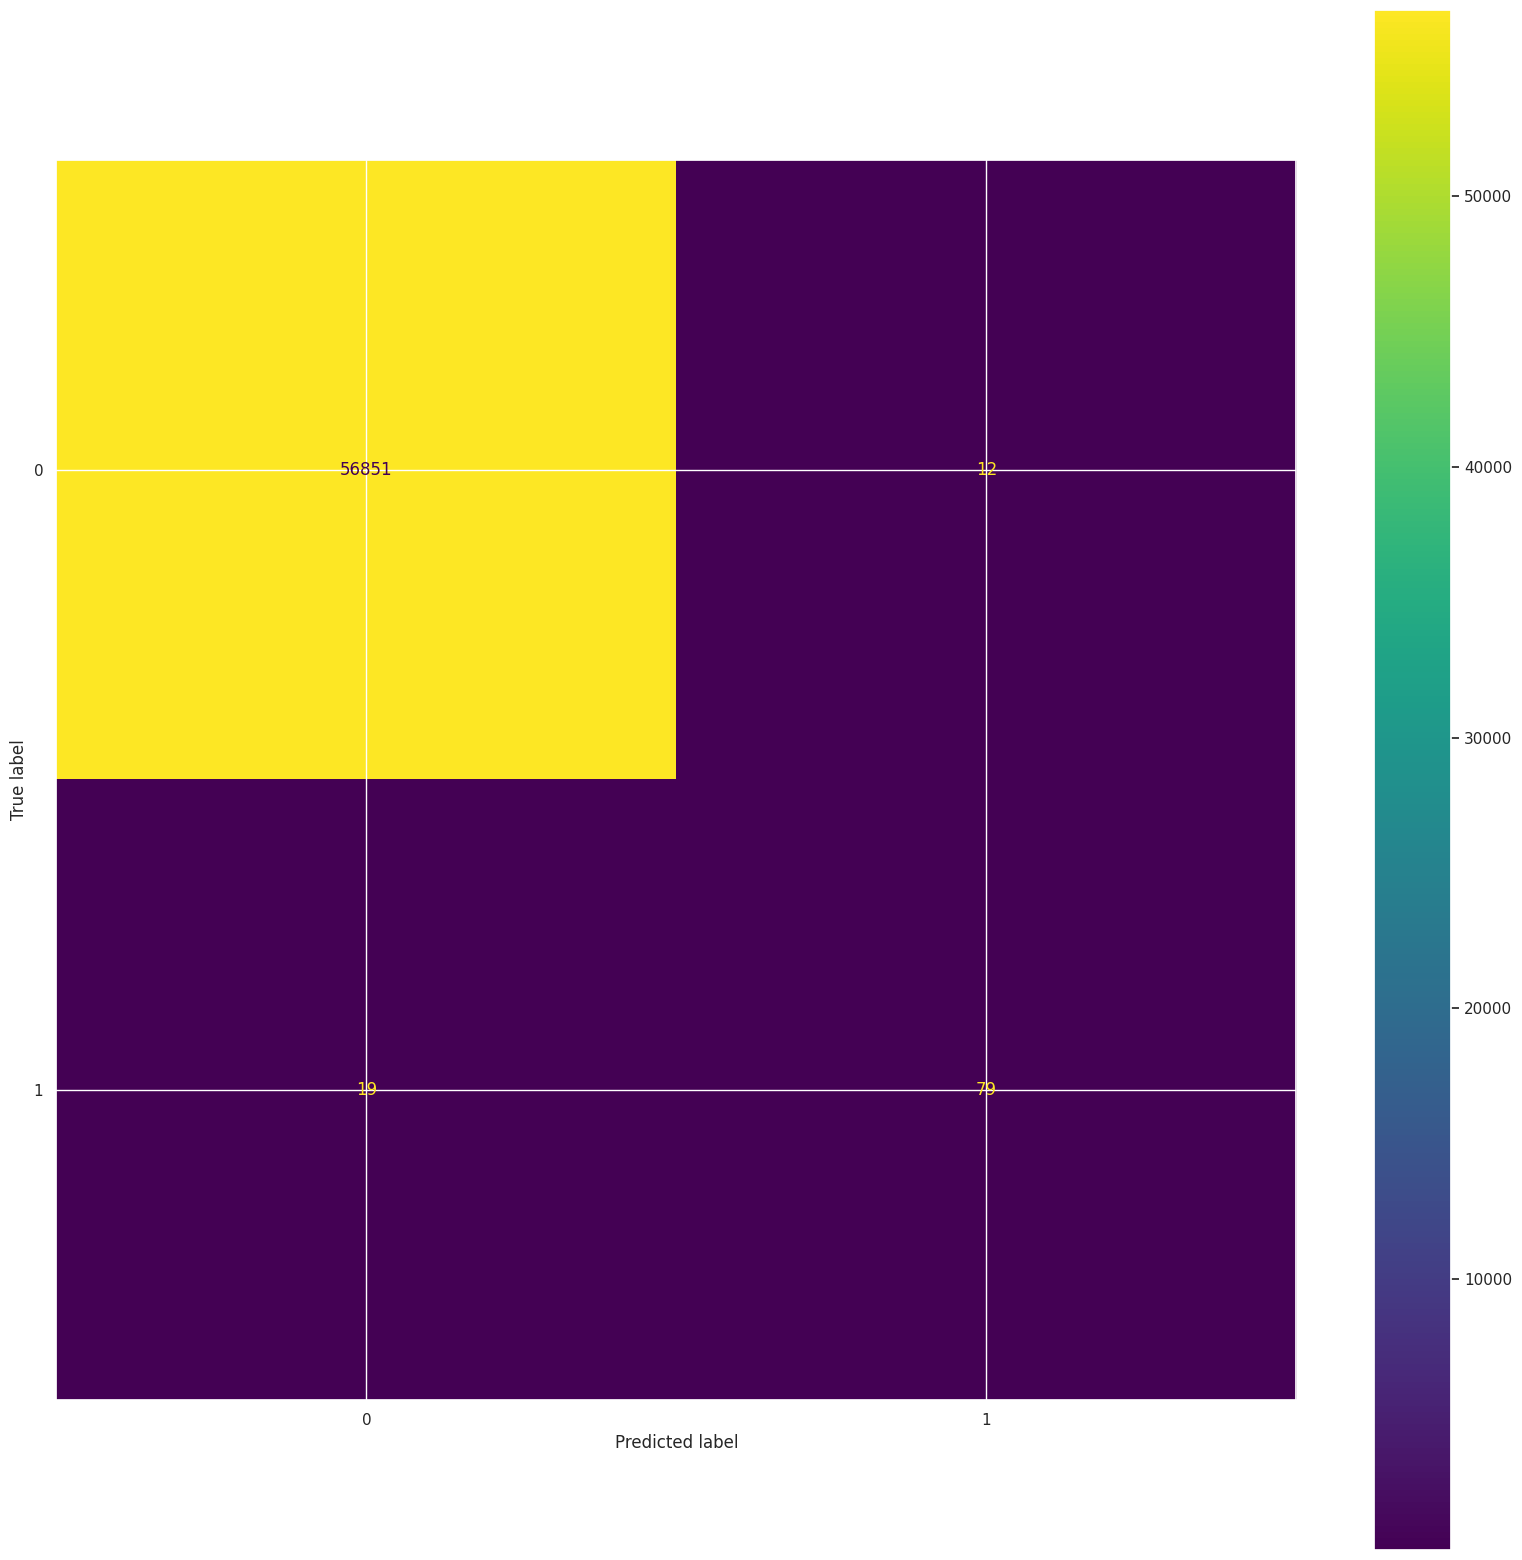

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.87      0.81      0.84        98

    accuracy                           1.00     56961
   macro avg       0.93      0.90      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9667
Random Forest threshold: 0.1200
ROC for the test dataset 96.7%


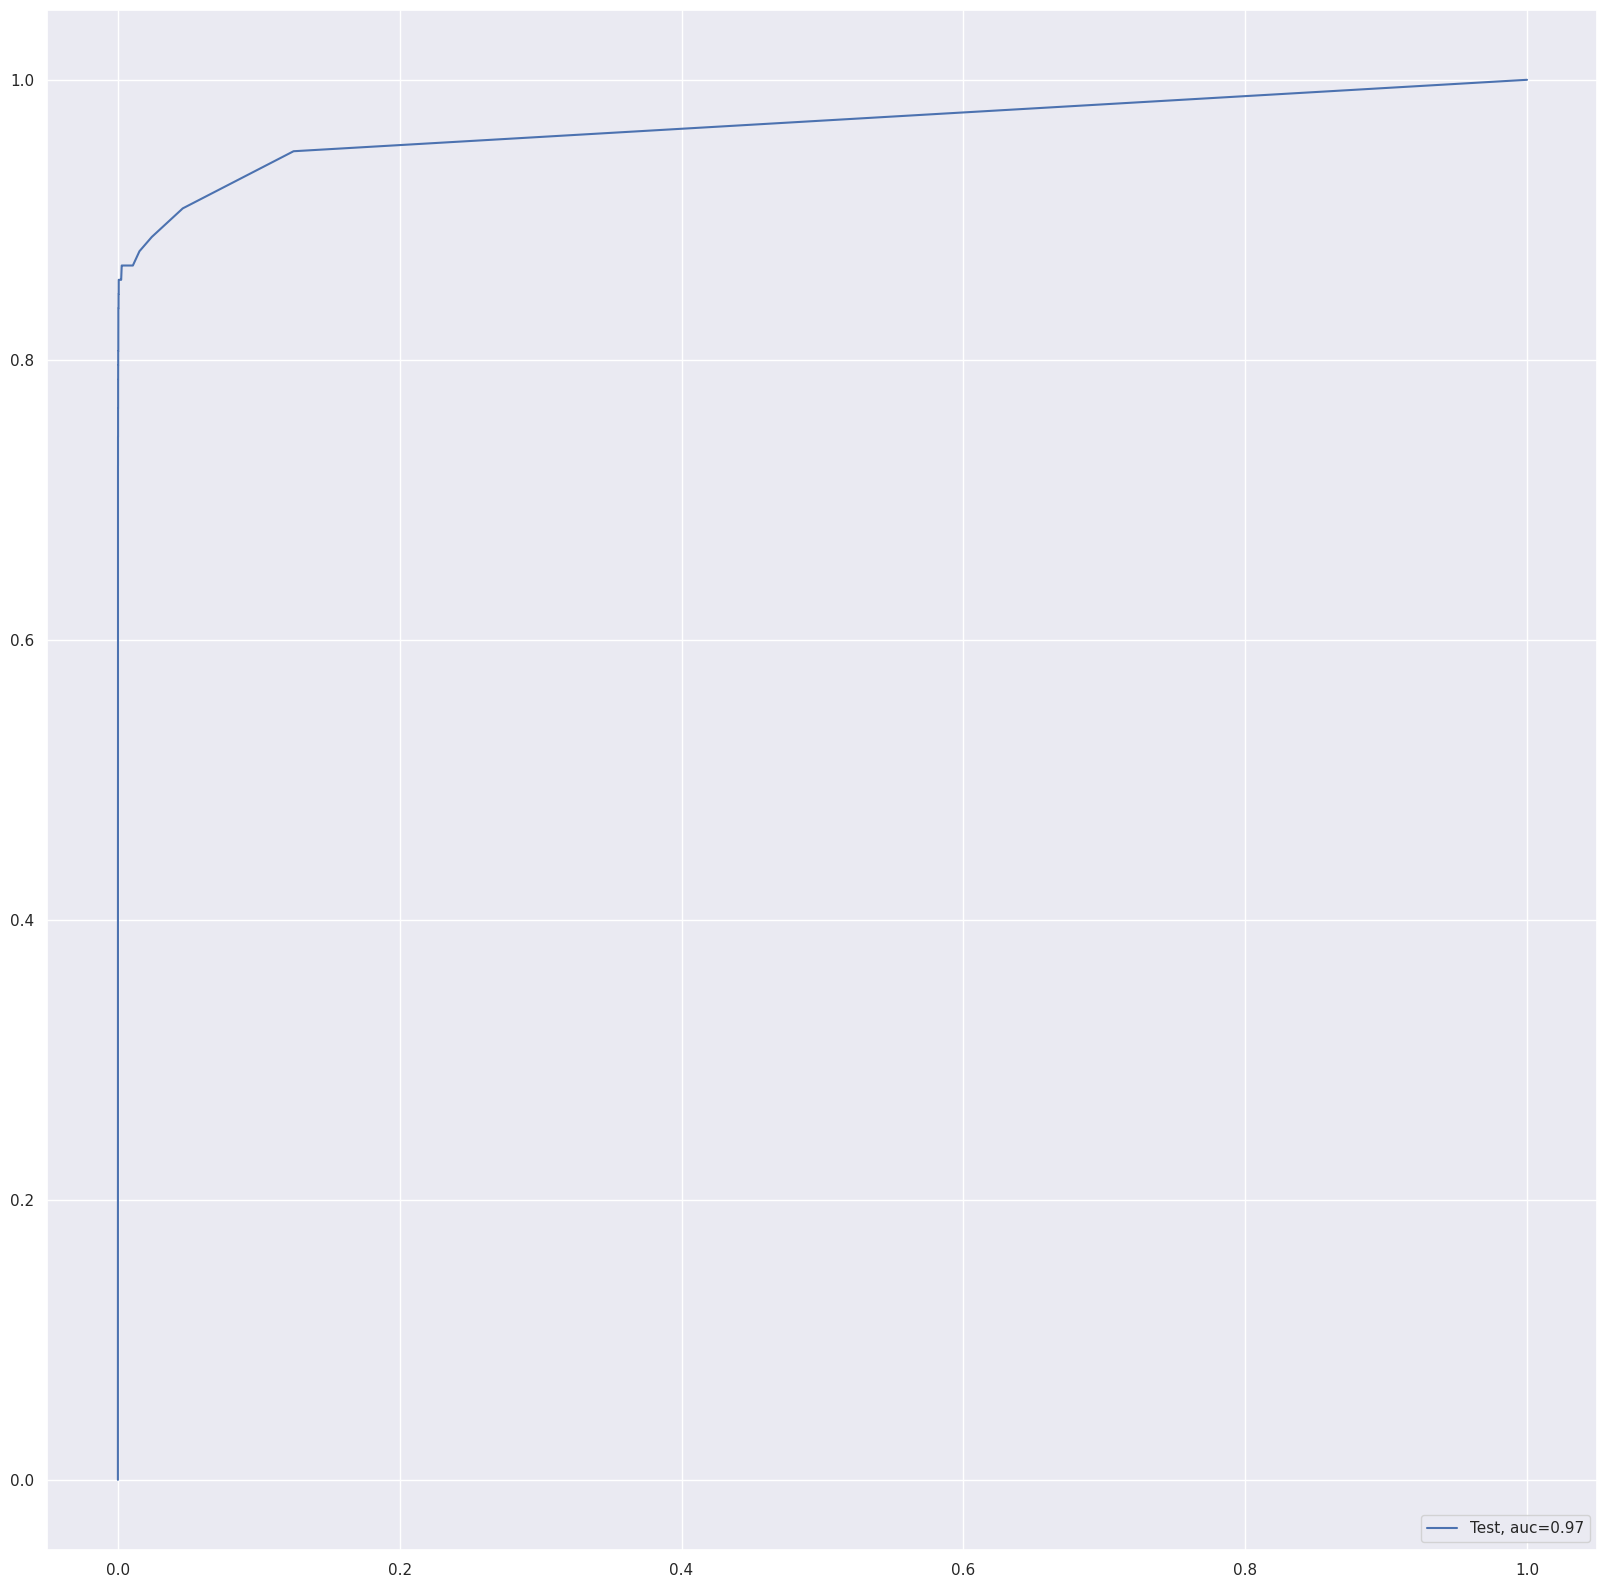

Models completed: 100%|██████████| 5/5 [18:43<00:00, 224.74s/it]

Random Forest completed in 1123.70 seconds
--------------------------------------------------------------------------------


In [ ]:
import time
import concurrent.futures
import numpy as np
import pandas as pd
from tqdm import tqdm  # for progress bar

# Make sure your buildAndRun* functions set internal n_jobs=1 for safe parallelism

def run_model_with_timing(model_func, name, df_results, X_train, y_train, X_test, y_test, imbalance_tag):
    print(f"\nStarting {name} ...")
    start = time.time()
    try:
        result = model_func(df_results, imbalance_tag, X_train, y_train, X_test, y_test)
        duration = time.time() - start
        print(f"{name} completed in {duration:.2f} seconds")
        print('-' * 80)
        return result
    except Exception as e:
        print(f"Error in {name}: {e}")
        return None

def run_all_models_parallel(df_results, X_train, y_train, X_test, y_test, imbalance_tag, max_workers=4, use_threads=True):
    # convert data to float32 for speed and memory
    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)

    model_configs = [
        ("Logistic Regression (L1 & L2)", buildAndRunLogisticModels),
        ("KNN", buildAndRunKNNModels),
        ("Decision Tree", buildAndRunTreeModels),
        ("Random Forest", buildAndRunRandomForestModels),
        ("XGBoost", buildAndRunXGBoostModels)
        # SVM removed for efficiency
    ]

    Executor = concurrent.futures.ThreadPoolExecutor if use_threads else concurrent.futures.ProcessPoolExecutor
    results = []

    with Executor(max_workers=max_workers) as executor:
        futures = {
            executor.submit(run_model_with_timing, func, name, df_results, X_train, y_train, X_test, y_test, imbalance_tag): name
            for name, func in model_configs
        }

        for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc="Models completed"):
            name = futures[future]
            try:
                res = future.result()
                if res is not None:
                    results.append(res)
                else:
                    print(f"Warning: {name} returned None due to error.")
            except Exception as e:
                print(f"Exception from {name}: {e}")

    if results:
        combined = pd.concat(results).drop_duplicates().reset_index(drop=True)
        return combined
    else:
        print("No successful model results. Returning original df_results.")
        return df_results


# Usage example:

Data_Imbalance_Handling = "ADASYN Oversampling with StratifiedKFold CV"

df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling', 'Model', 'Accuracy', 'roc_value', 'threshold'])

# Run all models in parallel on ADASYN oversampled data
df_Results = run_all_models_parallel(
    df_Results,
    X_train_ADASYN,
    y_train_ADASYN,
    X_test,
    y_test,
    imbalance_tag=Data_Imbalance_Handling,
    max_workers=4,   # adjust based on your CPU cores
    use_threads=True # threads often faster with numpy/scikit-learn due to GIL release
)


In [ ]:
df_Results

Data_Imbalance_Handiling  \
0  ADASYN Oversampling with StratifiedKFold CV   
1  ADASYN Oversampling with StratifiedKFold CV   
2  ADASYN Oversampling with StratifiedKFold CV   
3  ADASYN Oversampling with StratifiedKFold CV   
4  ADASYN Oversampling with StratifiedKFold CV   
5  ADASYN Oversampling with StratifiedKFold CV   
6  ADASYN Oversampling with StratifiedKFold CV   

                                        Model  Accuracy  roc_value  threshold  
0               Tree Model with gini criteria  0.997454   0.866301   1.000000  
1            Tree Model with entropy criteria  0.997665   0.922432   1.000000  
2                                     XGBoost  0.999280   0.977745   0.000298  
3  Logistic Regression with L2 Regularisation  0.011956   0.498232   0.529750  
4  Logistic Regression with L1 Regularisation  0.998280   0.500000        inf  
5                                         KNN  0.995874   0.917072   0.200000  
6                               Random Forest  0.999456   0.966691   0.120000

## Results for ADASYN  Oversampling:

Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN oversampling technique

## Overall conclusion after running models on Oversampled data:

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results


## But looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

#Parameter Tuning for Final Model by Handling class imbalance

In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9996137708256526
XGboost roc_value: 0.9757485499519611
XGBoost threshold: 0.00016785251500550658


In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid for tuning max_depth and min_child_weight
param_grid = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2)
}

# Use n_jobs=1 in the estimator (for parallel CV safety)
xgb = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    objective='binary:logistic',
    random_state=42,
    n_jobs=1,           # Prevent internal threading when running in parallel GridSearchCV
    verbosity=1
)

# Setup GridSearchCV
gsearch = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=4,           # Number of parallel jobs for GridSearchCV (CPU cores)
    cv=5,
    verbose=3
)

# Fit the grid search model
gsearch.fit(X_over, y_over)

# Results
print("Best Params:", gsearch.best_params_)
print("Best Mean ROC AUC:", gsearch.best_score_)
# If you want the whole CV results:
cv_results = pd.DataFrame(gsearch.cv_results_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'max_depth': 9, 'min_child_weight': 1}
Best Mean ROC AUC: 0.999909006832673


In [ ]:
# =======================
# XGBoost Hyperparameter Tuning - n_estimators
# =======================

# Import required modules
from xgboost import XGBClassifier                          # Main XGBoost model class
from sklearn.model_selection import GridSearchCV           # For exhaustive hyperparameter search
import pandas as pd                                         # For organizing CV results

# =======================
# Step 1: Define the parameter search space
# =======================
# n_estimators: number of boosting rounds (trees)
# We'll check 60, 80, 100, 120, 140
param_grid = {
    'n_estimators': range(60, 150, 20)
}

# =======================
# Step 2: Create an initial XGBClassifier instance
# =======================
# NOTE:
# - n_jobs=1 inside the model to avoid "nested parallelism" when GridSearchCV is also parallel
# - Other parameters like learning_rate, max_depth, min_child_weight should be fixed during this tuning
xgb_model = XGBClassifier(
    booster='gbtree',                # Decision-tree based boosting
    learning_rate=0.1,                # Step size shrinkage
    max_depth=3,                      # Tree depth (pre-fixed for now)
    min_child_weight=5,               # Min sum of instance weight needed in a child
    gamma=0,                          # Min loss reduction to make a split
    subsample=1,                      # Fraction of training data per boosting round
    colsample_bytree=1,               # Fraction of features per tree
    objective='binary:logistic',      # Binary classification
    reg_alpha=0,                      # L1 regularization
    reg_lambda=1,                     # L2 regularization
    scale_pos_weight=1,               # Balance of positive/negative classes
    random_state=42,                  # Reproducibility
    verbosity=1,                      # Show warnings/info from XGBoost
    n_jobs=1                          # Single-threaded at model level
)

# =======================
# Step 3: Setup GridSearchCV
# =======================
# - scoring='roc_auc' since we want best AUC
# - n_jobs=4 here means GridSearchCV will evaluate parameter sets in parallel (use your CPU cores)
# - cv=5 means 5-fold cross-validation
# - verbose=3 for detailed progress logs
gsearch = GridSearchCV(
    estimator=xgb_model,              # Our model
    param_grid=param_grid,            # The dictionary of parameters to test
    scoring='roc_auc',                # Metric for performance evaluation
    n_jobs=4,                          # Parallelism for CV folds
    cv=5,                              # Cross-validation folds
    verbose=3                          # Print progress during search
)

# =======================
# Step 4: Run the search
# =======================
# X_over, y_over should be **oversampled training data**
# Replace with your prepared dataset variables
gsearch.fit(X_over, y_over)

# =======================
# Step 5: Inspect results
# =======================
print("Best Parameters found:", gsearch.best_params_)       # Best n_estimators value
print("Best CV Mean ROC AUC:", gsearch.best_score_)         # Mean ROC AUC from CV

# Optional: collect all tested parameters/scores into a DataFrame
cv_results_df = pd.DataFrame(gsearch.cv_results_)
print(cv_results_df[['param_n_estimators', 'mean_test_score', 'std_test_score']])


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters found: {'n_estimators': 140}
Best CV Mean ROC AUC: 0.999769834804512
   param_n_estimators  mean_test_score  std_test_score
0                  60         0.998456        0.000231
1                  80         0.999252        0.000142
2                 100         0.999578        0.000149
3                 120         0.999711        0.000168
4                 140         0.999770        0.000176


In [ ]:
from xgboost import XGBClassifier   # Updated import (no need for xgboost.sklearn)
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Parameter grid for tuning
param_test = {
    'n_estimators': [110, 120, 130],
    'max_depth': [2, 3, 4],
    'min_child_weight': [4, 5, 6]
}

# Base XGBoost model — note: n_jobs=1 inside estimator to avoid CPU oversubscription
xgb_estimator = XGBClassifier(
    booster='gbtree',
    learning_rate=0.1,
    max_depth=3,          # Initial placeholder, will be tuned
    min_child_weight=5,   # Initial placeholder, will be tuned
    gamma=0,
    subsample=1,
    colsample_bytree=1,
    objective='binary:logistic',
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    random_state=42,
    verbosity=1,
    n_jobs=1              # very important when GridSearchCV runs in parallel
)

# GridSearchCV setup — iid removed (deprecated in sklearn>=0.24)
gsearch1 = GridSearchCV(
    estimator=xgb_estimator,
    param_grid=param_test,
    scoring='roc_auc',
    n_jobs=4,   # Parallel jobs for the grid search
    cv=5,       # 5-fold CV
    verbose=3   # Increase verbosity to see progress
)

# Fit on oversampled training data
gsearch1.fit(X_over, y_over)

# Best parameters and score
print("Best Parameters:", gsearch1.best_params_)
print("Best ROC AUC Score:", gsearch1.best_score_)

# Optional: See all results as a DataFrame
cv_results_df = pd.DataFrame(gsearch1.cv_results_)
print(cv_results_df[['param_n_estimators', 'param_max_depth', 'param_min_child_weight',
                     'mean_test_score', 'std_test_score']])


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130}
Best ROC AUC Score: 0.9998820737835853
    param_n_estimators  param_max_depth  param_min_child_weight  \
0                  110                2                       4   
1                  120                2                       4   
2                  130                2                       4   
3                  110                2                       5   
4                  120                2                       5   
5                  130                2                       5   
6                  110                2                       6   
7                  120                2                       6   
8                  130                2                       6   
9                  110                3                       4   
10                 120                3                       4   
11               

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_test = {
    'learning_rate': [0.05, 0.1, 0.125, 0.15, 0.2]
}

gsearch1 = GridSearchCV(
    estimator=XGBClassifier(
        booster='gbtree',
        colsample_bylevel=1,
        colsample_bynode=1,
        colsample_bytree=1,
        gamma=0,
        max_delta_step=0,
        max_depth=4,
        min_child_weight=4,
        n_estimators=130,
        n_jobs=1,
        objective='binary:logistic',
        random_state=42,
        reg_alpha=0,
        reg_lambda=1,
        scale_pos_weight=1,
        subsample=1,
        verbosity=1
    ),
    param_grid=param_test,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    verbose=3
    # 'iid' is deprecated and no longer used in sklearn >=0.24
)

gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


({'mean_fit_time': array([23.51727166, 23.28639274, 22.27792521, 24.17286339, 19.21417565]),
  'std_fit_time': array([1.04534498, 0.6870209 , 0.7800164 , 0.7464611 , 4.06539592]),
  'mean_score_time': array([0.58948584, 0.80718412, 0.71055517, 0.63216639, 0.56822114]),
  'std_score_time': array([0.0338356 , 0.19657351, 0.16698928, 0.1772017 , 0.20808318]),
  'param_learning_rate': masked_array(data=[0.05, 0.1, 0.125, 0.15, 0.2],
               mask=[False, False, False, False, False],
         fill_value=1e+20),
  'params': [{'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.125},
   {'learning_rate': 0.15},
   {'learning_rate': 0.2}],
  'split0_test_score': array([0.99934621, 0.99958527, 0.99963395, 0.99967333, 0.99969668]),
  'split1_test_score': array([0.99981344, 0.99998712, 0.99999412, 0.99999619, 0.99999943]),
  'split2_test_score': array([0.99970769, 0.99989772, 0.99990436, 0.99992211, 0.99991745]),
  'split3_test_score': array([0.99966815, 0.99997562, 0.

In [ ]:
from xgboost import XGBClassifier   # Updated import (official recommended)
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Parameter grid for tuning gamma
param_test = {
    'gamma': [i / 10.0 for i in range(0, 5)]
}

# Base model with previously tuned parameters
xgb_estimator = XGBClassifier(
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1,
    learning_rate=0.2,    # From previous best
    max_delta_step=0,
    max_depth=4,          # Tuned previously
    min_child_weight=4,   # Tuned previously
    n_estimators=130,     # Tuned previously
    n_jobs=1,             # Avoid nested parallelism in GridSearchCV
    objective='binary:logistic',
    random_state=42,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=1,
    verbosity=1
)

# Grid search setup
gsearch1 = GridSearchCV(
    estimator=xgb_estimator,
    param_grid=param_test,
    scoring='roc_auc',
    n_jobs=4,   # Parallel jobs at GridSearchCV level
    cv=5,
    verbose=3   # Show progress
)

# Fit model
gsearch1.fit(X_over, y_over)

# Output best parameters and score
print("Best Parameters:", gsearch1.best_params_)
print("Best ROC AUC Score:", gsearch1.best_score_)

# Optional: check full CV results
cv_results_df = pd.DataFrame(gsearch1.cv_results_)
print(cv_results_df[['param_gamma', 'mean_test_score', 'std_test_score']])


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'gamma': 0.4}
Best ROC AUC Score: 0.9999302049811277
   param_gamma  mean_test_score  std_test_score
0          0.0         0.999921        0.000116
1          0.1         0.999924        0.000113
2          0.2         0.999929        0.000107
3          0.3         0.999923        0.000116
4          0.4         0.999930        0.000099


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

# Initialize XGBoost classifier with only necessary parameters.
XGBmodel = XGBClassifier(
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1,
    gamma=0.1,
    learning_rate=0.2,
    max_delta_step=0,
    max_depth=4,
    min_child_weight=4,
    n_estimators=130,
    n_jobs=1,                 # Use single thread for model-level parallel safety
    objective='binary:logistic',
    random_state=42,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=1,
    verbosity=1               # Use verbosity instead of deprecated silent
)

# Fit XGBoost model
XGBmodel.fit(X_over, y_over)

# Accuracy score on test set
XGB_test_score = XGBmodel.score(X_test, y_test)
print(f'Model Accuracy: {XGB_test_score:.4f}')

# Predicted probabilities for positive class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# ROC AUC calculation
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print(f'XGBoost ROC AUC: {XGB_roc_value:.4f}')

# Optimal threshold determination using Youden's J statistic (tpr-fpr)
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]
print(f'XGBoost optimal threshold: {threshold:.4f}')


Model Accuracy: 0.9994
XGBoost ROC AUC: 0.9788
XGBoost optimal threshold: 0.0030


In [ ]:
from xgboost import XGBClassifier           # Official modern import (not xgboost.sklearn)
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Parameter grid for subsample and colsample_bytree tuning
param_test = {
    'subsample': [i/10.0 for i in range(7, 10)],           # 0.7, 0.8, 0.9
    'colsample_bytree': [i/10.0 for i in range(7, 10)]     # 0.7, 0.8, 0.9
}

# Establish tuned base model. Remove deprecated, unnecessary parameters.
xgb_estimator = XGBClassifier(
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    gamma=0.1,
    learning_rate=0.2,
    max_delta_step=0,
    max_depth=4,
    min_child_weight=4,
    n_estimators=130,
    n_jobs=1,                     # estimator single-threaded, outer parallelism via GridSearchCV
    objective='binary:logistic',
    random_state=42,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=1,                  # placeholder; will be tuned
    colsample_bytree=1,           # placeholder; will be tuned
    verbosity=1
)

gsearch1 = GridSearchCV(
    estimator=xgb_estimator,
    param_grid=param_test,
    scoring='roc_auc',
    n_jobs=4,                 # parallel jobs for GridSearchCV, adjust per CPU
    cv=5,
    verbose=3
    # Do NOT use deprecated iid, silent, seed, nthread, missing, base_score here
)

gsearch1.fit(X_over, y_over)

print("Best parameters:", gsearch1.best_params_)
print("Best ROC AUC:", gsearch1.best_score_)

# If detailed results needed:
cv_results_df = pd.DataFrame(gsearch1.cv_results_)
print(cv_results_df[['param_subsample', 'param_colsample_bytree', 'mean_test_score', 'std_test_score']])


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'colsample_bytree': 0.7, 'subsample': 0.7}
Best ROC AUC: 0.9999344888164456
   param_subsample  param_colsample_bytree  mean_test_score  std_test_score
0              0.7                     0.7         0.999934        0.000094
1              0.8                     0.7         0.999898        0.000157
2              0.9                     0.7         0.999931        0.000093
3              0.7                     0.8         0.999912        0.000128
4              0.8                     0.8         0.999917        0.000130
5              0.9                     0.8         0.999921        0.000118
6              0.7                     0.9         0.999930        0.000094
7              0.8                     0.9         0.999931        0.000098
8              0.9                     0.9         0.999915        0.000125


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import pandas as pd
from sklearn import metrics

# Initialize XGBClassifier with tuned parameters
XGBmodel = XGBClassifier(
    booster='gbtree',
    colsample_bylevel=0.8,    # tuned
    colsample_bynode=1,
    colsample_bytree=1,
    gamma=0.1,                # tuned
    learning_rate=0.2,        # tuned
    max_delta_step=0,
    max_depth=4,              # tuned
    min_child_weight=4,       # tuned
    n_estimators=130,         # tuned
    n_jobs=1,                 # single-thread at model level to avoid oversubscription
    objective='binary:logistic',
    random_state=42,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=0.8,            # tuned
    verbosity=1
)

# Train
XGBmodel.fit(X_over, y_over)

# Accuracy
XGB_test_score = XGBmodel.score(X_test, y_test)
print(f"Model Accuracy: {XGB_test_score:.4f}")

# Probabilities for the positive class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# ROC AUC
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print(f"XGBoost ROC AUC: {XGB_roc_value:.4f}")

# Optimal threshold using Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]
print(f"XGBoost optimal threshold: {threshold:.4f}")


Model Accuracy: 0.9993
XGBoost ROC AUC: 0.9776
XGBoost optimal threshold: 0.0029


**As the roc value has dropped we will take not consider new values of colsample_bytree': 0.8, 'subsample': 0.8**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

clf = XGBClassifier(
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1,
    gamma=0.1,
    learning_rate=0.2,
    max_delta_step=0,
    max_depth=4,
    min_child_weight=4,
    n_estimators=130,
    n_jobs=1,
    objective='binary:logistic',
    random_state=42,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=1,
    verbosity=1
    # Note: No `missing` parameter here
)

clf.fit(X_over, y_over)  # Fit on balanced dataset

XGB_test_score = clf.score(X_test, y_test)
print(f'Model Accuracy: {XGB_test_score:.4f}')

XGB_probs = clf.predict_proba(X_test)[:, 1]

XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print(f'XGBoost ROC AUC: {XGB_roc_value:.4f}')

fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]
print(f'XGBoost optimal threshold: {threshold:.4f}')


Model Accuracy: 0.9994
XGBoost ROC AUC: 0.9788
XGBoost optimal threshold: 0.0030


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


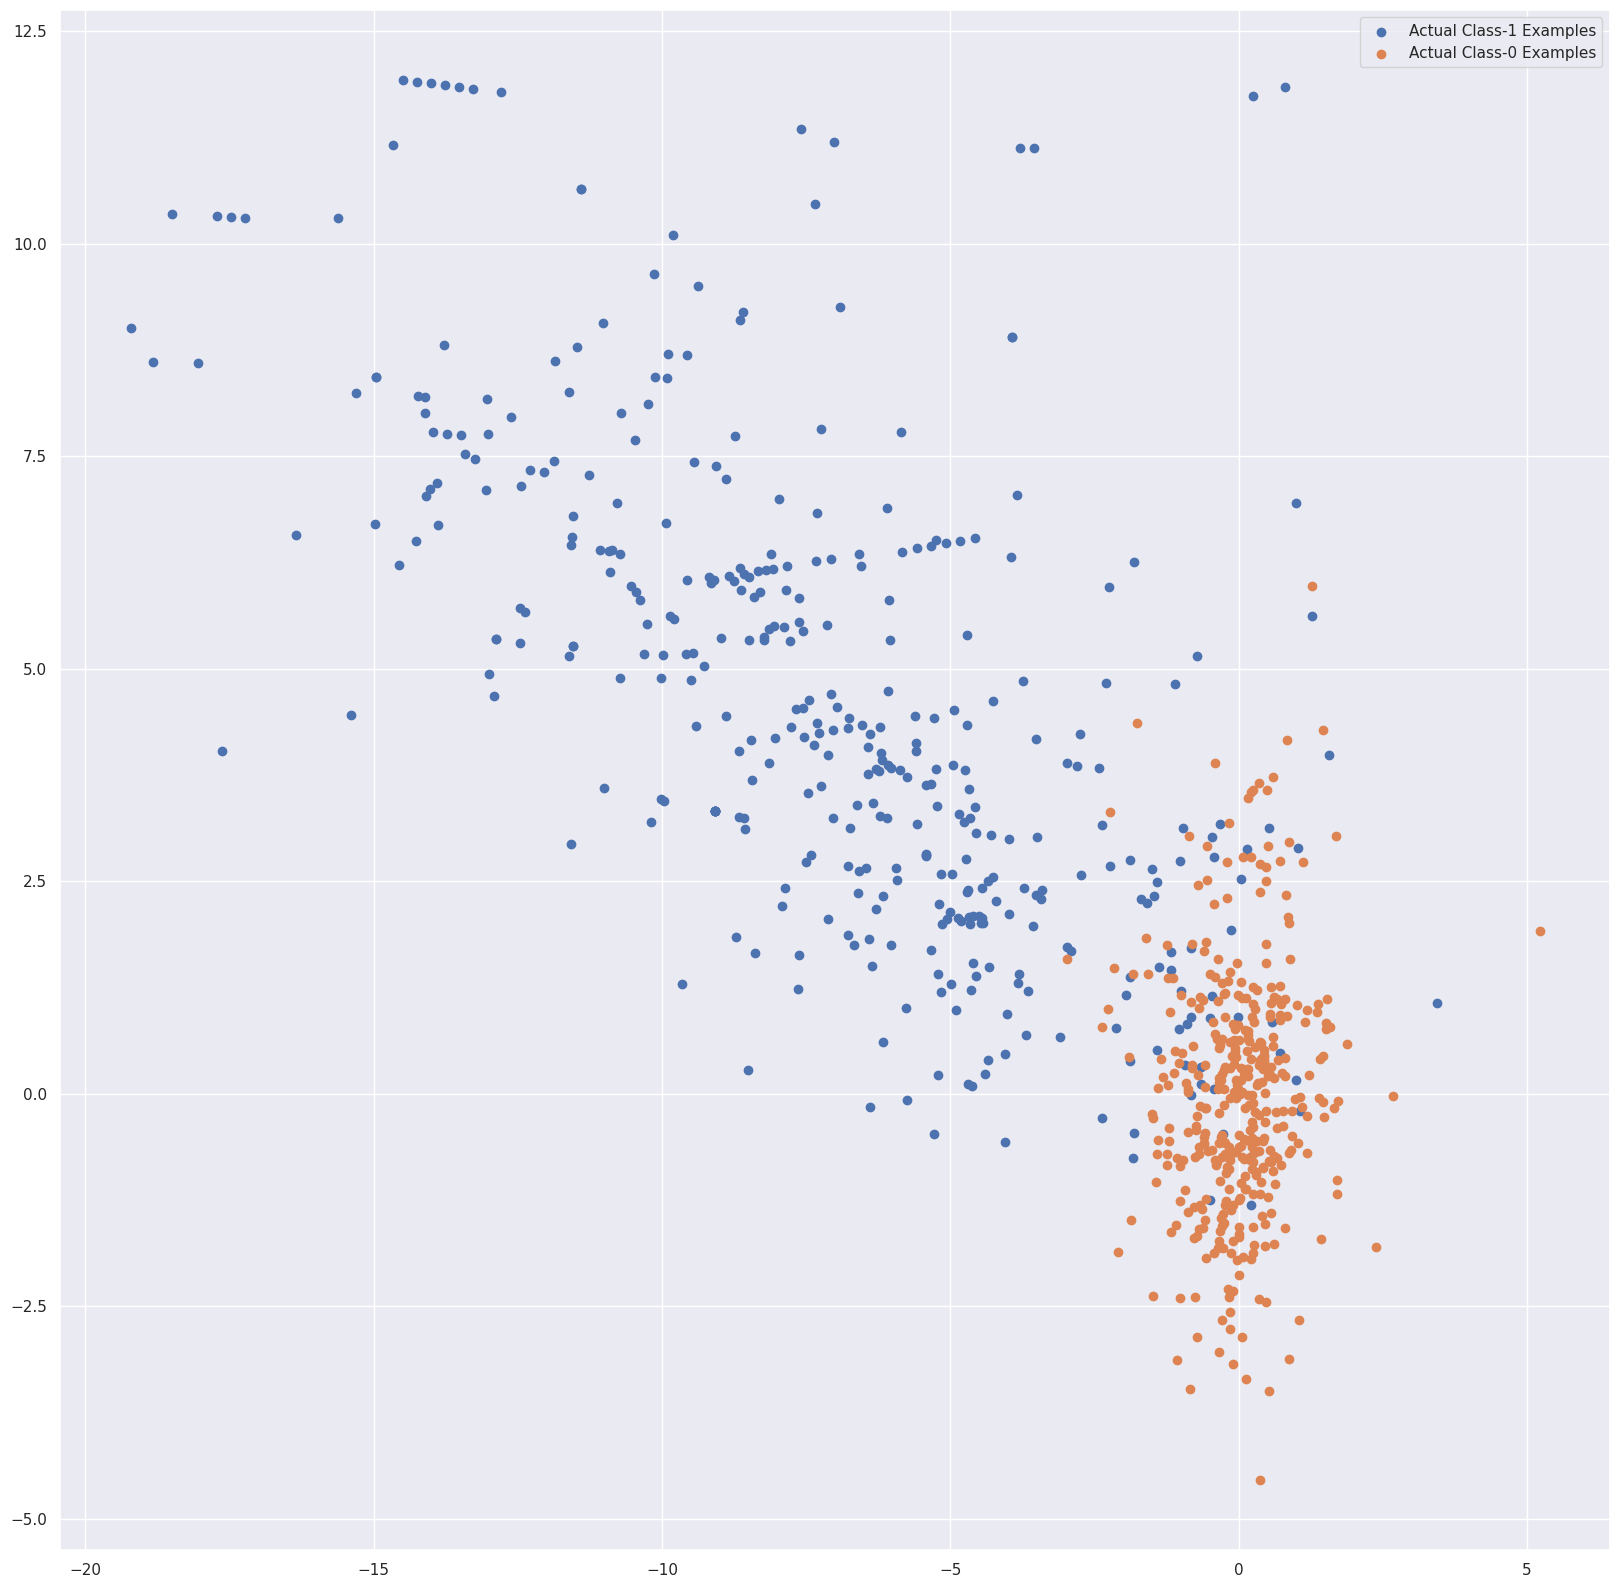

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9787920268084372
XGBoost threshold: 0.002977034542709589


## Model Selection:
## Overall conclusion after running models on Oversampled data:

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results

We have selected XGBOOST model with Random Oversampling and StratifiedKFold CV


**Model Accuracy: 0.9993855444953564**

**XGboost roc_value: 0.9852138347557161**

**XGBoost threshold: 0.005087878089398146**

### We also noticed by looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.



In [ ]:
import json

# Step 1: Define your code as a string
xgb_code = """
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

# Oversample training data
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X_train, y_train)

# Initialize best XGBoost model
clf = XGBClassifier(
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1,
    gamma=0.1,
    learning_rate=0.2,
    max_delta_step=0,
    max_depth=4,
    min_child_weight=4,
    n_estimators=130,
    n_jobs=1,
    objective='binary:logistic',
    random_state=42,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=1,
    verbosity=1
)
clf.fit(X_over, y_over)

# Evaluate
XGB_test_score = clf.score(X_test, y_test)
print(f'Model Accuracy: {XGB_test_score:.4f}')
XGB_probs = clf.predict_proba(X_test)[:, 1]
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print(f'XGBoost ROC AUC: {XGB_roc_value:.4f}')
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]
print(f'XGBoost optimal threshold: {threshold:.4f}')
"""

# Step 2: Save as JSON
json_obj = {"xgboost_best_model_code": xgb_code}
with open('best_model_code.json', 'w') as f:
    json.dump(json_obj, f, indent=2)

# Step 3 (optional): Read and use the code later
with open('best_model_code.json', 'r') as f:
    loaded_code = json.load(f)
print(loaded_code["xgboost_best_model_code"])

# (Optional/advanced) To execute loaded code (if context is safe):
# exec(loaded_code["xgboost_best_model_code"])



from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

# Oversample training data
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X_train, y_train)

# Initialize best XGBoost model
clf = XGBClassifier(
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1,
    gamma=0.1,
    learning_rate=0.2,
    max_delta_step=0,
    max_depth=4,
    min_child_weight=4,
    n_estimators=130,
    n_jobs=1,
    objective='binary:logistic',
    random_state=42,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=1,
    verbosity=1
)
clf.fit(X_over, y_over)

# Evaluate
XGB_test_score = clf.score(X_test, y_test)
print(f'Model Accuracy: {XGB_test_score:.4f}')
XGB_probs = clf.predict_proba(X_test)[:, 1]
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print(f'XGBoost ROC AUC: {XGB_roc_value:.4f}')
fpr, tpr, threshold

In [ ]:
# Save model in XGBoost native format (json or binary)
clf.save_model("Credit_CArd_Fraud_Detaction.json")  # or .bin

# To load later:
# clf.load_model("Credit_CArd_Fraud_Detaction.json")
